In [52]:
from coactivation.process import preprocess_emgs, get_coactivation_map, get_coactivation_difference, get_all_healthy_map, get_coactivation_bool_map, get_alignment_map, array_to_cm,generate_coactivation_csv, emgs
from coactivation.visualize import visualize_emgs, plot_coactivation_corr, plot_coactivation_map, plot_bool_map, plot_alignment_map

import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

In [53]:
generate_coactivation_csv()

# Preprocessing

In [54]:
df_raw = pd.read_csv('coactivations.csv', index_col=0)

In [55]:
df_raw

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0   0.018537  0.020488  0.020488  0.020488  0.021463  0.019512  0.018537   
0   0.017479  0.019319  0.019319  0.018399  0.019319  0.017479  0.016559   
0   0.015773  0.018139  0.021293  0.030757  0.033912  0.026025  0.017350   
0   0.019231  0.023601  0.027972  0.044580  0.059441  0.043706  0.024476   
0   0.041379  0.115271  0.056158  0.025616  0.026601  0.026601  0.028571   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.031191  0.056711  0.061437  0.026465  0.032136  0.029301  0.023629   
0   0.020871  0.023593  0.019964  0.019056  0.018149  0.016334  0.016334   
0   0.022989  0.022031  0.022989  0.057471  0.021073  0.018199  0.017241   
0   0.018700  0.020481  0.028495  0.142476  0.042743  0.031167  0.026714   
0   0.017762  0.019538  0.025755  0.148313  0.039964  0.023979  0.022202   

     gt0emg7   gt1emg0   gt1emg1  ...   gt2emg2   gt2emg3   gt2emg4   gt2emg5  \
0   0.018537  0.026341  0.031220  ...  0.074146  0.212683  0.175610  0.204878   
0   0.017479  0.023919  0.027599  ...  0.060718  0.148114  0.121435  0.101196   
0   0.015773  0.018927  0.022871  ...  0.067823  0.170347  0.143533  0.124606   
0   0.019231  0.023601  0.027972  ...  0.081294  0.198427  0.156031  0.128497   
0   0.026601  0.073892  0.253202  ...  0.141872  0.138916  0.051232  0.032512   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.022684  0.055766  0.059546  ...  0.149338  0.224953  0.067108  0.040643   
0   0.016334  0.093466  0.237750  ...  0.099819  0.294011  0.058984  0.031760   
0   0.018199  0.091954  0.235632  ...  0.074713  0.269157  0.052682  0.031609   
0   0.017809  0.033838  0.139804  ...  0.089047  0.238646  0.076581  0.041852   
0   0.016874  0.039964  0.104796  ...  0.047069  0.245115  0.069272  0.037300   

     gt2emg6   gt2emg7   hand  is_patient  subject_id   n  
0   0.191220  0.067317   left       False          fa  11  
0   0.178473  0.087397   left       False          fa  11  
0   0.143533  0.064274   left       False          fa  13  
0   0.165210  0.086538   left       False          fa  13  
0   0.040394  0.107389  right       False          xw  11  
..       ...       ...    ...         ...         ...  ..  
0   0.034972  0.058601  right       False          yc  13  
0   0.203267  0.087114  right       False          is  11  
0   0.290230  0.178161  right       False          is  11  
0   0.118433  0.289403  right       False          is  13  
0   0.214920  0.484014  right       False          is  13  

[143 rows x 28 columns]

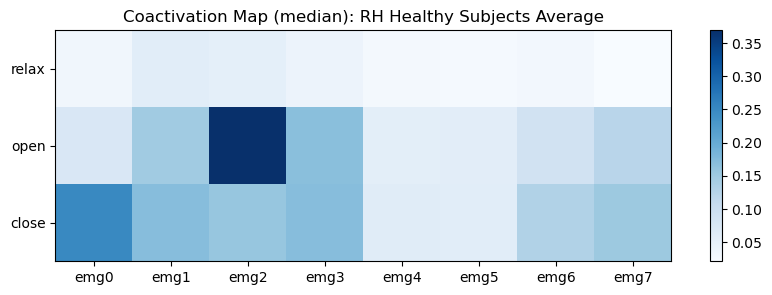

In [38]:
df_lh = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='right')]
plot_coactivation_map(array_to_cm(np.mean(df_lh.iloc[:,:24], axis=0).values), title='RH Healthy Subjects Average')

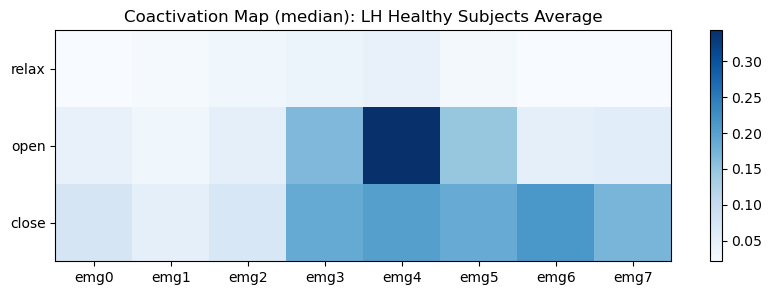

In [39]:
df_lh = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==False) & (df_raw.hand=='left')]
plot_coactivation_map(array_to_cm(np.mean(df_lh.iloc[:,:24], axis=0).values), title='LH Healthy Subjects Average')

In [29]:
df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='left')]

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0  0.045936  0.058304  0.088339  0.125442  0.116608  0.102473  0.047703   
0  0.033333  0.034667  0.036000  0.036000  0.068000  0.073333  0.056000   
0  0.025435  0.026774  0.026774  0.026774  0.074967  0.054886  0.042838   
0  0.056106  0.033003  0.033003  0.033003  0.122112  0.089109  0.051155   
0  0.029909  0.040312  0.085826  0.149545  0.223667  0.230169  0.063719   
0  0.026992  0.038560  0.082262  0.137532  0.190231  0.154242  0.034704   
0  0.067834  0.043764  0.043764  0.041575  0.067834  0.050328  0.052516   
0  0.029155  0.030612  0.036443  0.042274  0.107872  0.075802  0.083090   

    gt0emg7   gt1emg0   gt1emg1  ...   gt2emg2   gt2emg3   gt2emg4   gt2emg5  \
0  0.054770  0.067138  0.074205  ...  0.148410  0.256184  0.305654  0.487633   
0  0.048000  0.034667  0.037333  ...  0.069333  0.081333  0.152000  0.362667   
0  0.032129  0.036145  0.032129  ...  0.084337  0.108434  0.456493  0.406961   
0  0.127063  0.072607  0.039604  ...  0.046205  0.057756  0.260726  0.400165   
0  0.032510  0.037711  0.044213  ...  0.139142  0.262679  0.628088  0.618986   
0  0.026992  0.043702  0.044987  ...  0.151671  0.246787  0.598972  0.561697   
0  0.234136  0.067834  0.043764  ...  0.074398  0.096280  0.328228  0.415755   
0  0.032070  0.037901  0.032070  ...  0.100583  0.150875  0.244169  0.319242   

    gt2emg6   gt2emg7  hand  is_patient  subject_id   n  
0  0.166078  0.199647  left        True          p3  13  
0  0.166667  0.134667  left        True          p3  11  
0  0.334672  0.365462  left        True          p3  12  
0  0.169967  0.219472  left        True          p3  12  
0  0.275683  0.202861  left        True          p3  13  
0  0.201799  0.219794  left        True          p3  13  
0  0.225383  0.396061  left        True          p3  11  
0  0.278426  0.139942  left        True          p3  11  

[8 rows x 28 columns]

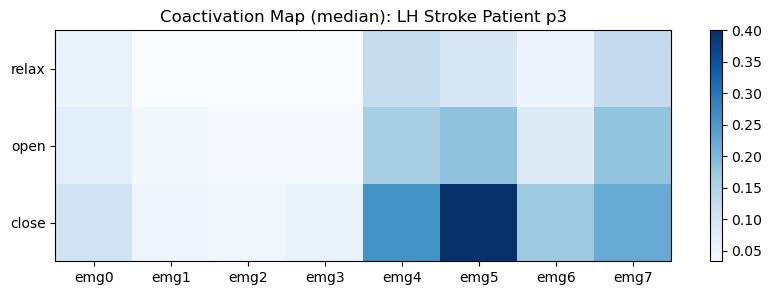

In [40]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='left')].iloc[3,:24].values).astype(float), title='LH Stroke Patient p3')


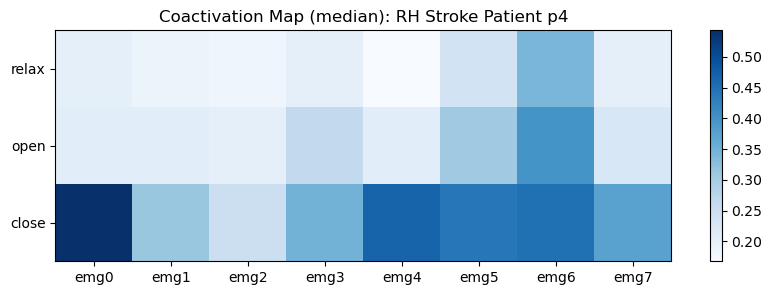

In [50]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='right')].iloc[3,:24].values).astype(float), title='RH Stroke Patient p4')


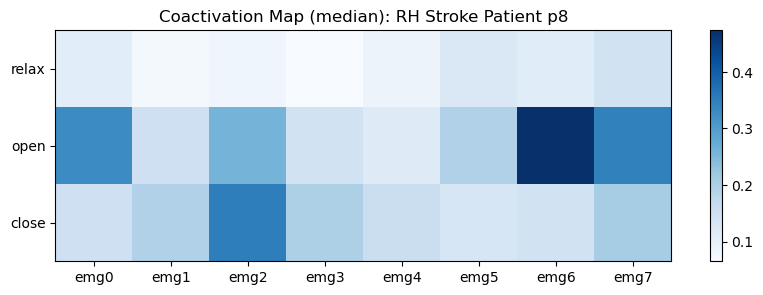

In [51]:
plot_coactivation_map(array_to_cm(df_raw[(df_raw.subject_id!='Augmen') & (df_raw.is_patient==True) & (df_raw.hand=='right')].iloc[19,:24].values).astype(float), title='RH Stroke Patient p8')


# main

In [66]:
df = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.hand=='right') & (df_raw.is_patient==False)]

In [67]:
df

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0  0.041379  0.115271  0.056158  0.025616  0.026601  0.026601  0.028571   
0  0.034598  0.092634  0.042411  0.027902  0.029018  0.027902  0.029018   
0  0.022923  0.027698  0.047755  0.032474  0.031519  0.024833  0.023878   
0  0.027174  0.031522  0.032609  0.039130  0.045652  0.033696  0.033696   
0  0.012903  0.014194  0.015484  0.018710  0.017419  0.039355  0.016129   
0  0.012739  0.014013  0.014650  0.017834  0.020382  0.064331  0.022293   
0  0.017241  0.018966  0.018966  0.024138  0.029310  0.064655  0.093966   
0  0.014154  0.014862  0.014862  0.017693  0.021231  0.036801  0.062987   
0  0.048438  0.050000  0.051562  0.057813  0.032813  0.029687  0.028125   
0  0.053846  0.043590  0.044872  0.035897  0.025641  0.023077  0.023077   
0  0.097257  0.088529  0.058603  0.054863  0.034913  0.027431  0.024938   
0  0.068924  0.078597  0.071342  0.065296  0.033857  0.026602  0.022975   
0  0.020256  0.023454  0.024520  0.022388  0.021322  0.021322  0.021322   
0  0.019027  0.021142  0.021142  0.021142  0.021142  0.020085  0.020085   
0  0.021088  0.023307  0.023307  0.026637  0.029967  0.026637  0.023307   
0  0.021053  0.024561  0.024561  0.029240  0.032749  0.028070  0.024561   
0  0.022152  0.022152  0.022943  0.021361  0.019778  0.018196  0.119462   
0  0.023451  0.030151  0.022613  0.021776  0.020938  0.018425  0.065327   
0  0.020035  0.031359  0.033101  0.044425  0.033972  0.023519  0.022648   
0  0.020122  0.035871  0.046369  0.036745  0.031496  0.024497  0.096238   
0  0.018822  0.088380  0.097381  0.092471  0.046645  0.023732  0.018822   
0  0.017121  0.031128  0.052918  0.083268  0.048249  0.022568  0.016342   
0  0.019160  0.103906  0.096536  0.040531  0.019160  0.016949  0.017686   
0  0.020566  0.069409  0.088260  0.053985  0.027421  0.023136  0.027421   
0  0.030197  0.038328  0.029036  0.029036  0.029036  0.029036  0.025552   
0  0.023529  0.031016  0.026738  0.026738  0.025668  0.024599  0.023529   
0  0.015711  0.020424  0.018068  0.018853  0.019639  0.018853  0.016496   
0  0.017197  0.022356  0.020636  0.021496  0.022356  0.019776  0.018057   
0  0.031979  0.092605  0.077282  0.036642  0.017322  0.014657  0.013991   
0  0.015028  0.049468  0.108328  0.038197  0.019411  0.015654  0.013776   
0  0.019048  0.038828  0.021978  0.021245  0.016117  0.015385  0.014652   
0  0.020632  0.033527  0.015474  0.015474  0.014829  0.015474  0.013540   
0  0.038525  0.139344  0.143443  0.047541  0.031148  0.044262  0.048361   
0  0.039575  0.157336  0.140927  0.072394  0.043436  0.042471  0.037645   
0  0.054378  0.266359  0.164977  0.060829  0.026728  0.021198  0.019355   
0  0.052680  0.246765  0.213494  0.068854  0.029575  0.023105  0.020333   
0  0.116651  0.059266  0.062088  0.025400  0.026341  0.025400  0.022578   
0  0.069264  0.048485  0.039827  0.023377  0.022511  0.022511  0.021645   
0  0.110631  0.097666  0.067416  0.025065  0.026793  0.024201  0.021608   
0  0.026062  0.039575  0.056950  0.025097  0.028958  0.029923  0.023166   
0  0.031191  0.056711  0.061437  0.026465  0.032136  0.029301  0.023629   
0  0.020871  0.023593  0.019964  0.019056  0.018149  0.016334  0.016334   
0  0.022989  0.022031  0.022989  0.057471  0.021073  0.018199  0.017241   
0  0.018700  0.020481  0.028495  0.142476  0.042743  0.031167  0.026714   
0  0.017762  0.019538  0.025755  0.148313  0.039964  0.023979  0.022202   

    gt0emg7   gt1emg0   gt1emg1  ...   gt2emg2   gt2emg3   gt2emg4   gt2emg5  \
0  0.026601  0.073892  0.253202  ...  0.141872  0.138916  0.051232  0.032512   
0  0.027902  0.071429  0.262277  ...  0.159598  0.175223  0.060268  0.036830   
0  0.022923  0.053486  0.111748  ...  0.126074  0.117956  0.050621  0.029608   
0  0.028261  0.058696  0.100000  ...  0.236957  0.170652  0.069565  0.042391   
0  0.013548  0.029677  0.018065  ...  0.023871  0.071613  0.071613  0.163226   
0  0.014650  0.034395  0.018471  ...  0.022930  0.076433  0.083439  0.165

In [72]:
X = df_raw[(df_raw.subject_id!='Augmen') & (df_raw.hand=='right') & (df_raw.is_patient==False)].iloc[:,:24].values

# optimal k

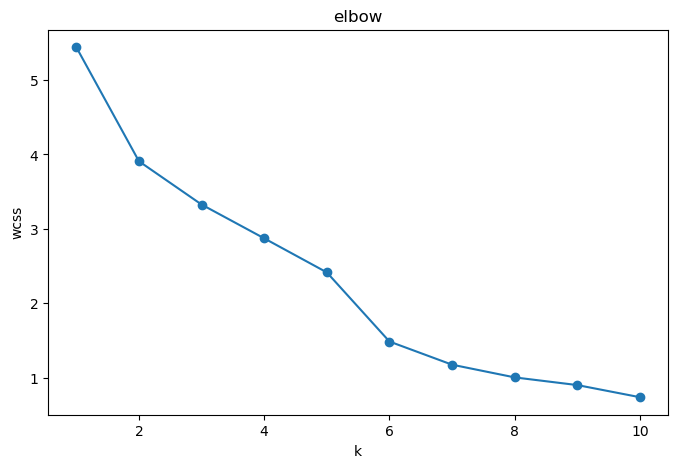

In [69]:
# elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('elbow')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

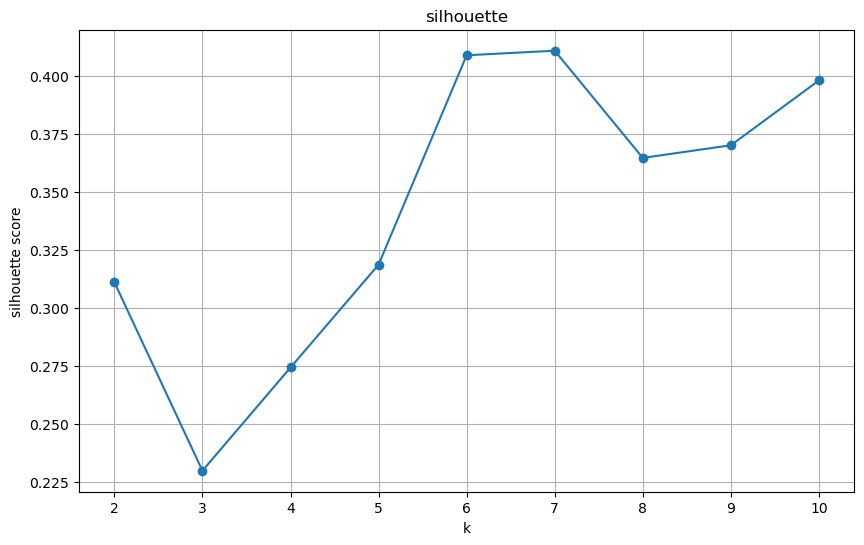

In [71]:
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('silhouette')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

# k-means

In [93]:
kmeans = KMeans(n_clusters=8,         # Number of clusters
                 init='k-means++',    # Centroid initialization
                 max_iter=300,        # Maximum iterations
                 n_init=10,           # Number of initializations
                 tol=1e-4,    
                 random_state=42,    
                 algorithm='lloyd')
df['cluster'] = kmeans.fit_predict(X)
kmeans.fit(X)

labels = kmeans.predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[0.04161694 0.06797553 0.07093935 0.05785067 0.04969079 0.03044818
  0.02846537 0.03530184 0.06161006 0.1389142  0.32202854 0.16240786
  0.07435797 0.03996609 0.03639619 0.09130747 0.17505448 0.166612
  0.20934431 0.17166233 0.09926008 0.06342045 0.08520078 0.11223042]
 [0.02561869 0.02689077 0.03454353 0.04072217 0.0548853  0.03691367
  0.03224578 0.02605745 0.04085025 0.03386816 0.04999788 0.14144367
  0.26580378 0.14181063 0.05696252 0.04289513 0.06554626 0.0431709
  0.07185848 0.16142132 0.16171409 0.16721239 0.18417    0.11540385]
 [0.16259985 0.28867532 0.17196026 0.25280054 0.21670516 0.25618176
  0.22283697 0.16081503 0.20292466 0.32435058 0.1944017  0.33984577
  0.28537809 0.28806062 0.28093573 0.20592559 0.40935946 0.40558375
  0.23309218 0.44848082 0.48489512 0.42713661 0.30989949 0.31005884]
 [0.02794838 0.0805951  0.07197567 0.04735489 0.02559581 0.02235708
  0.03607358 0.01881975 0.09276167 0.19969876 0.49571771 0.19033454
  0.04834122 0.04491971 0.1776

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_88576/34328778.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



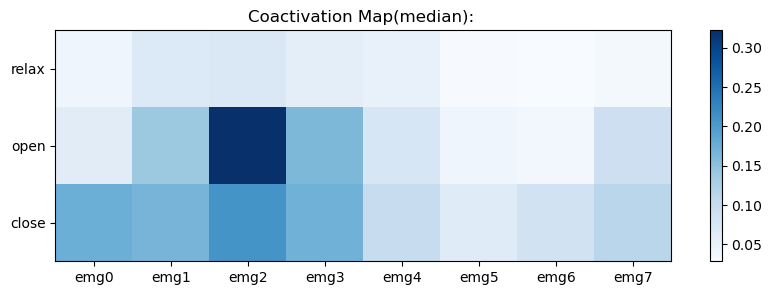

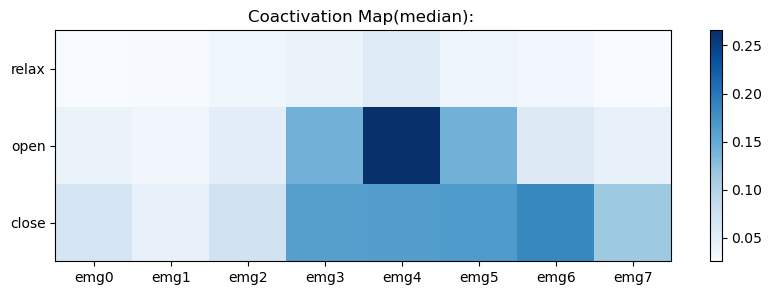

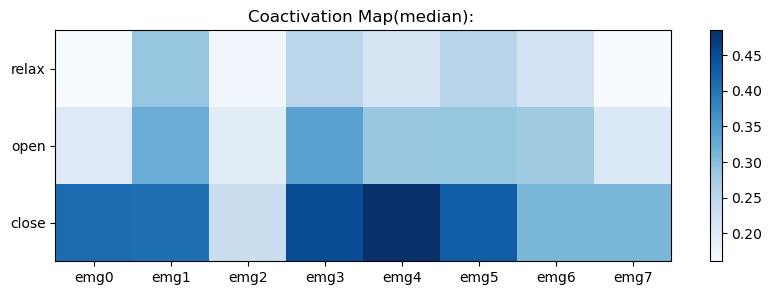

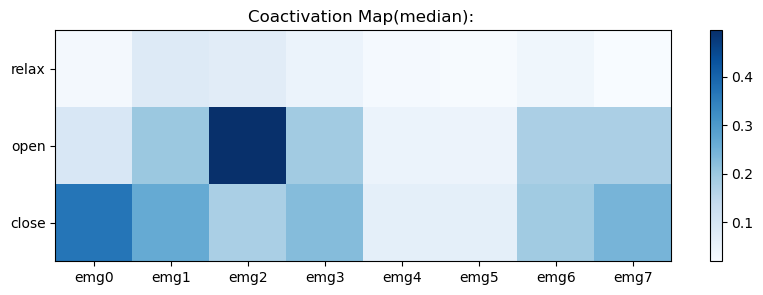

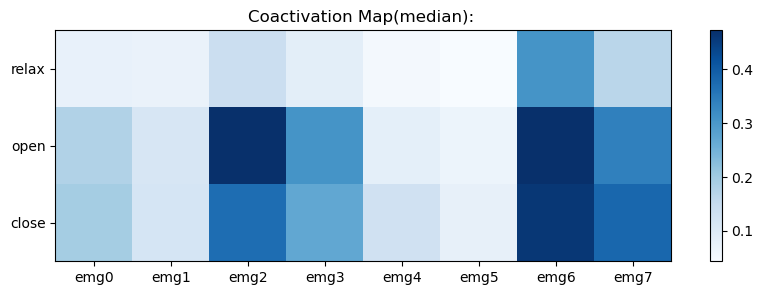

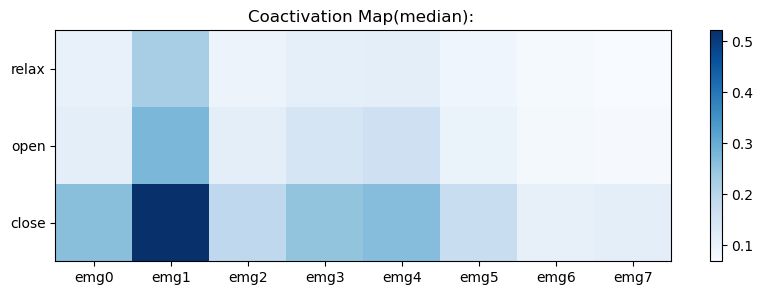

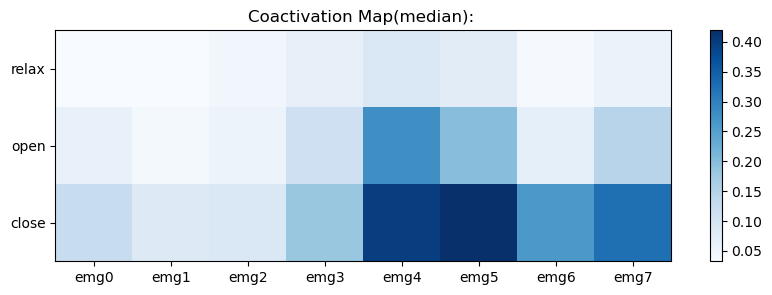

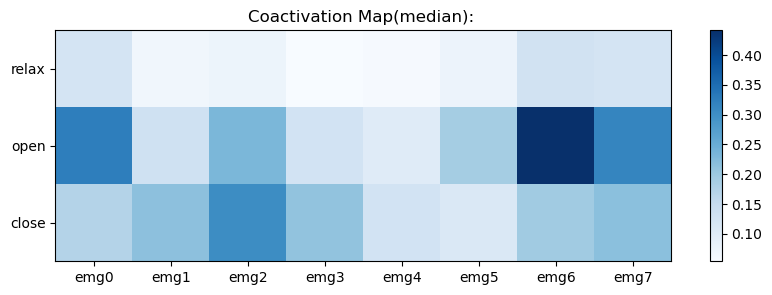

In [94]:
for cluster_center in kmeans.cluster_centers_:
    plot_coactivation_map(array_to_cm(cluster_center))

In [95]:
df

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0   0.018537  0.020488  0.020488  0.020488  0.021463  0.019512  0.018537   
0   0.017479  0.019319  0.019319  0.018399  0.019319  0.017479  0.016559   
0   0.015773  0.018139  0.021293  0.030757  0.033912  0.026025  0.017350   
0   0.019231  0.023601  0.027972  0.044580  0.059441  0.043706  0.024476   
0   0.041379  0.115271  0.056158  0.025616  0.026601  0.026601  0.028571   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.031191  0.056711  0.061437  0.026465  0.032136  0.029301  0.023629   
0   0.020871  0.023593  0.019964  0.019056  0.018149  0.016334  0.016334   
0   0.022989  0.022031  0.022989  0.057471  0.021073  0.018199  0.017241   
0   0.018700  0.020481  0.028495  0.142476  0.042743  0.031167  0.026714   
0   0.017762  0.019538  0.025755  0.148313  0.039964  0.023979  0.022202   

     gt0emg7   gt1emg0   gt1emg1  ...   gt2emg3   gt2emg4   gt2emg5   gt2emg6  \
0   0.018537  0.026341  0.031220  ...  0.212683  0.175610  0.204878  0.191220   
0   0.017479  0.023919  0.027599  ...  0.148114  0.121435  0.101196  0.178473   
0   0.015773  0.018927  0.022871  ...  0.170347  0.143533  0.124606  0.143533   
0   0.019231  0.023601  0.027972  ...  0.198427  0.156031  0.128497  0.165210   
0   0.026601  0.073892  0.253202  ...  0.138916  0.051232  0.032512  0.040394   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.022684  0.055766  0.059546  ...  0.224953  0.067108  0.040643  0.034972   
0   0.016334  0.093466  0.237750  ...  0.294011  0.058984  0.031760  0.203267   
0   0.018199  0.091954  0.235632  ...  0.269157  0.052682  0.031609  0.290230   
0   0.017809  0.033838  0.139804  ...  0.238646  0.076581  0.041852  0.118433   
0   0.016874  0.039964  0.104796  ...  0.245115  0.069272  0.037300  0.214920   

     gt2emg7   hand  is_patient  subject_id   n  cluster  
0   0.067317   left       False          fa  11        1  
0   0.087397   left       False          fa  11        1  
0   0.064274   left       False          fa  13        1  
0   0.086538   left       False          fa  13        1  
0   0.107389  right       False          xw  11        0  
..       ...    ...         ...         ...  ..      ...  
0   0.058601  right       False          yc  13        0  
0   0.087114  right       False          is  11        3  
0   0.178161  right       False          is  11        3  
0   0.289403  right       False          is  13        0  
0   0.484014  right       False          is  13        3  

[121 rows x 29 columns]

In [96]:
df.sort_values(by=['cluster'])

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0   0.020256  0.023454  0.024520  0.022388  0.021322  0.021322  0.021322   
0   0.075758  0.151515  0.189394  0.055556  0.053030  0.050505  0.050505   
0   0.035326  0.082428  0.109601  0.041667  0.068841  0.031703  0.030797   
0   0.019027  0.021142  0.021142  0.021142  0.021142  0.020085  0.020085   
0   0.021088  0.023307  0.023307  0.026637  0.029967  0.026637  0.023307   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.169205  0.105753  0.094755  0.069374  0.050761  0.045685  0.079526   
0   0.066752  0.048780  0.030809  0.032092  0.041078  0.060334  0.073813   
0   0.059776  0.025529  0.063512  0.038605  0.036115  0.039851  0.204857   
0   0.214784  0.057183  0.085774  0.068340  0.069735  0.090656  0.211994   
0   0.106568  0.089219  0.130731  0.075589  0.118959  0.157373  0.127014   

     gt0emg7   gt1emg0   gt1emg1  ...   gt2emg3   gt2emg4   gt2emg5   gt2emg6  \
0   0.021322  0.061834  0.137527  ...  0.144989  0.049041  0.046908  0.125800   
0   0.138889  0.085859  0.166667  ...  0.065657  0.060606  0.055556  0.053030   
0   0.070652  0.039855  0.117754  ...  0.137681  0.231884  0.224638  0.096920   
0   0.020085  0.057082  0.104651  ...  0.136364  0.041226  0.040169  0.105708   
0   0.021088  0.049945  0.174251  ...  0.153163  0.058824  0.048835  0.136515   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.115059  0.514382  0.243655  ...  0.311337  0.143824  0.128596  0.175973   
0   0.075738  0.419769  0.172015  ...  0.269576  0.166881  0.087291  0.152760   
0   0.075342  0.115816  0.028020  ...  0.212017  0.068493  0.066002  0.315068   
0   0.150628  0.317992  0.101813  ...  0.111576  0.087866  0.082985  0.099024   
0   0.220570  0.335812  0.141264  ...  0.204461  0.166047  0.166047  0.136307   

     gt2emg7   hand  is_patient  subject_id   n  cluster  
0   0.157783  right       False          cl  11        0  
0   0.151515  right        True          p1  12        0  
0   0.128623  right        True          p1  12        0  
0   0.211416  right       False          cl  11        0  
0   0.183130  right       False          cl  13        0  
..       ...    ...         ...         ...  ..      ...  
0   0.240271  right        True          p8  12        7  
0   0.250321  right        True          p8  11        7  
0   0.132628  right        True          p7  12        7  
0   0.185495  right        True          p8  13        7  
0   0.236679  right        True          p8  13        7  

[121 rows x 29 columns]

In [97]:
cluster_ids = df['cluster'].to_numpy()
print(cluster_ids)
point_ids = df['subject_id'].to_numpy()

[1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 6 1 0 0 0 0 3 3 3 3 0 5 0 0 0 0 2
 2 2 1 2 2 1 1 1 1 1 1 1 1 7 7 0 0 0 5 5 5 5 5 7 7 7 7 7 7 0 0 0 0 6 1 1 6
 6 6 6 6 6 1 4 4 7 4 4 4 4 4 3 3 3 3 1 1 6 6 5 5 5 0 3 3 3 3 5 5 0 0 0 1 0
 0 0 0 0 0 0 3 3 0 3]


In [98]:
tsne_input = df.iloc[:,:24].to_numpy()

In [99]:
from sklearn.manifold import TSNE

data_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(tsne_input)

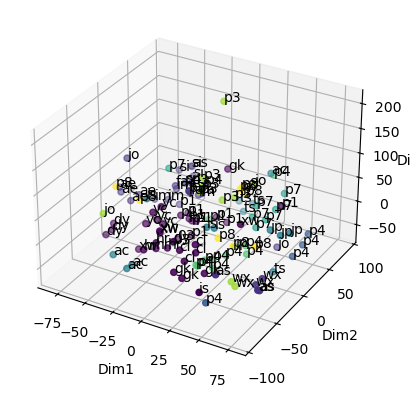

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne[:,0], data_tsne[:,1], data_tsne[:,2], c=cluster_ids, marker='o')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
ax.set_zlabel('Dim3')
for zdir, x, y, z in zip(point_ids, data_tsne[:,0], data_tsne[:,1], data_tsne[:,2]):
    ax.text(x, y, z, zdir)
plt.show()

In [101]:
data_tsne = pd.DataFrame(data_tsne, columns=['myx', 'myy', 'myz'])
data_tsne['cluster_ids'] = cluster_ids
data_tsne['subject_ids'] = point_ids
print(data_tsne.columns)

Index(['myx', 'myy', 'myz', 'cluster_ids', 'subject_ids'], dtype='object')


In [127]:

fig = px.scatter_3d(data_tsne, x='myx', y='myy', z='myz', color='cluster_ids', text='subject_ids')
fig.show()
fig.write_html('testtest.html')

In [130]:
frames = []
for i in range(0, 360, 1):
    camera = dict(
        eye=dict(x=2*np.cos(np.radians(i)), y=2*np.sin(np.radians(i)), z=1.25)
    )
    frames.append(go.Frame(layout=dict(scene_camera=camera)))

fig.frames = frames

fig.update_layout(
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(
            label="Play",
            method="animate",
            # args=[None, dict(frame=dict(duration=10, redraw=True), fromcurrent=True, transition=dict(duration=0))]
            args=[None, dict(
                frame=dict(duration=5, redraw=False),  # Minimal frame duration, disable redraw
                fromcurrent=True,
                transition=dict(duration=0),  # No transition delay
                easing="linear"  # Keep easing linear for smoothness
            )]
        )]
    )]
)
fig.write_html('testtest.html')

In [38]:
df['cluster'].value_counts()

cluster
0    28
1    13
2     4
Name: count, dtype: int64

In [39]:
np.unique(df.cluster)

array([0, 1, 2], dtype=int32)

In [40]:
array = df.iloc[0].values[:24].astype(float)

In [41]:
cm1 = array_to_cm(array)
cm1

emg0      emg1      emg2      emg3      emg4      emg5      emg6  \
gt                                                                         
0   0.041379  0.115271  0.056158  0.025616  0.026601  0.026601  0.028571   
1   0.073892  0.253202  0.314286  0.185222  0.059113  0.045320  0.041379   
2   0.211330  0.188177  0.141872  0.138916  0.051232  0.032512  0.040394   

        emg7  
gt            
0   0.026601  
1   0.041379  
2   0.107389

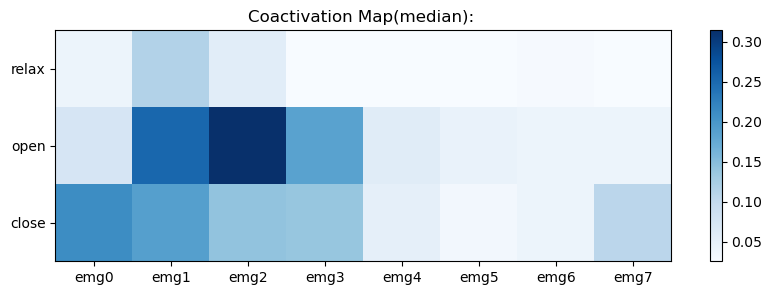

In [42]:
plot_coactivation_map(cm1)

/Users/elise/Desktop/myhand/coactivation/visualize.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


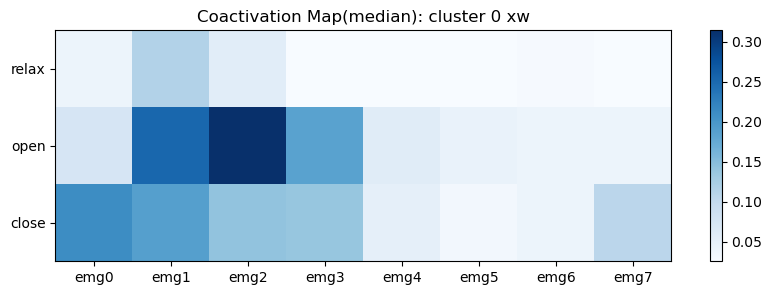

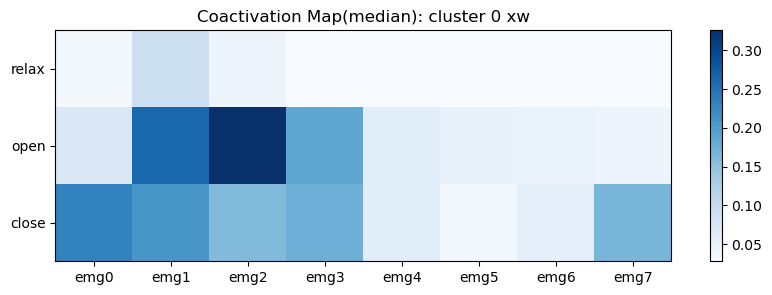

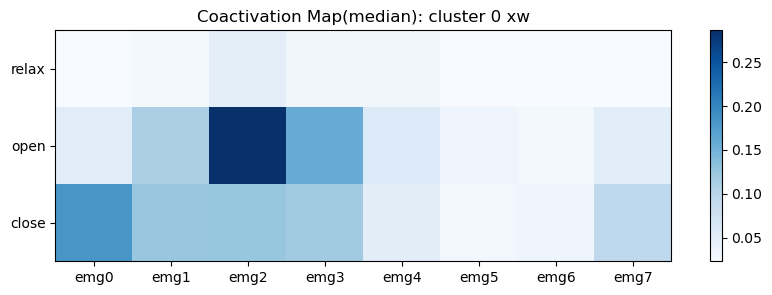

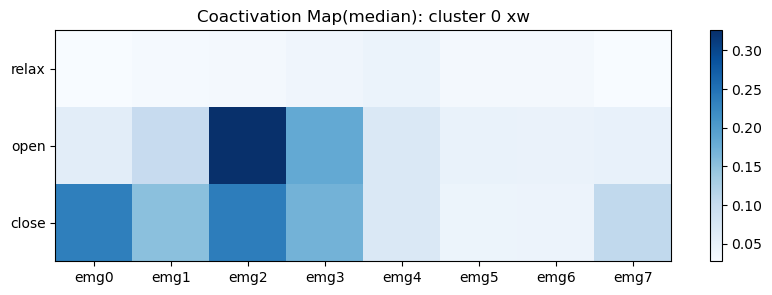

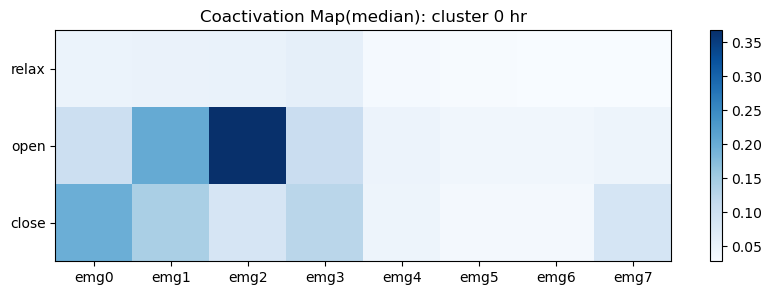

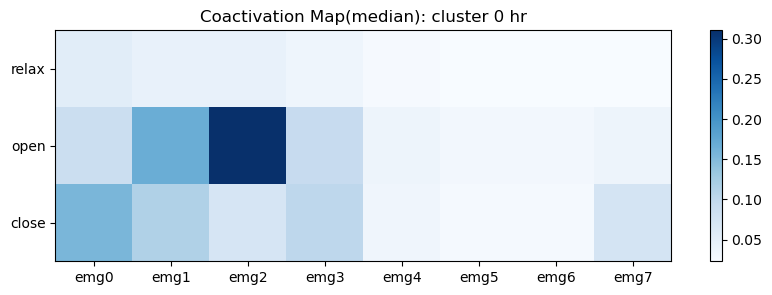

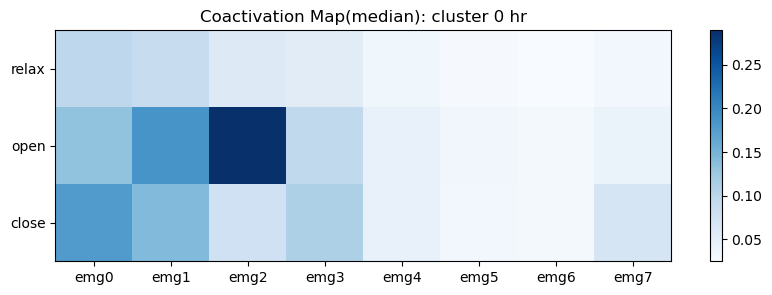

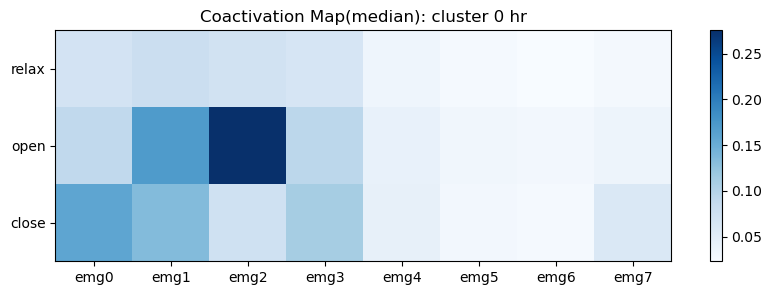

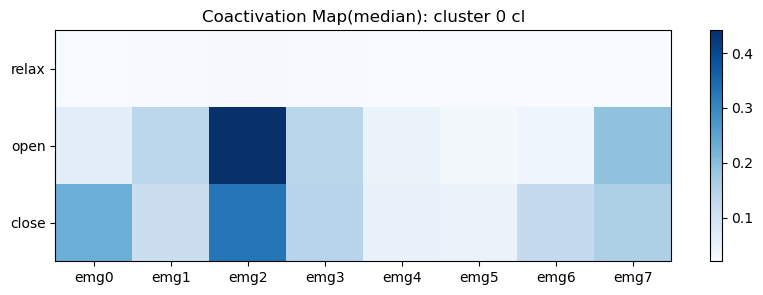

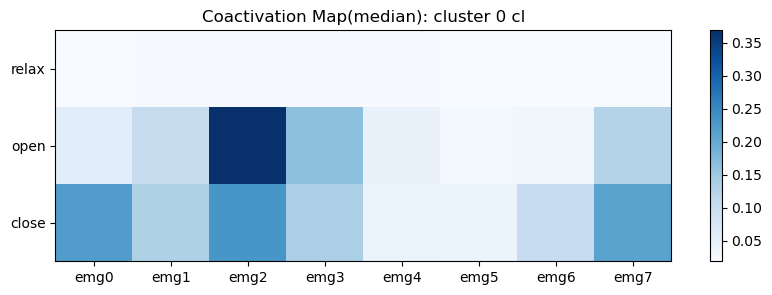

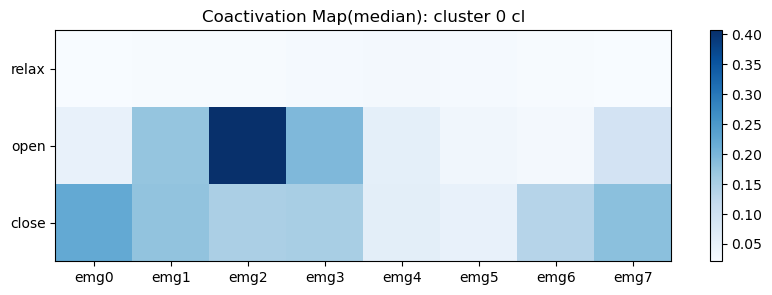

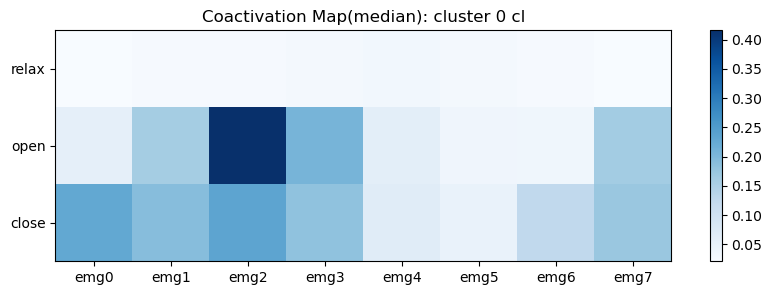

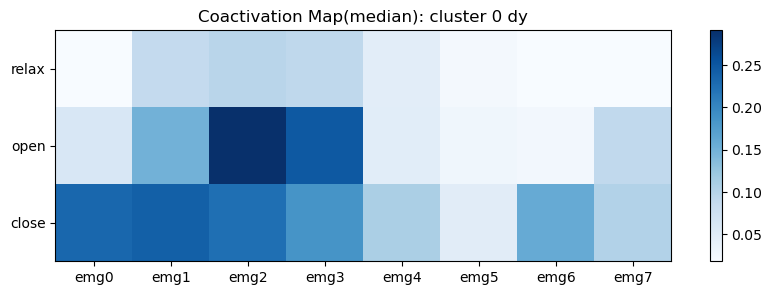

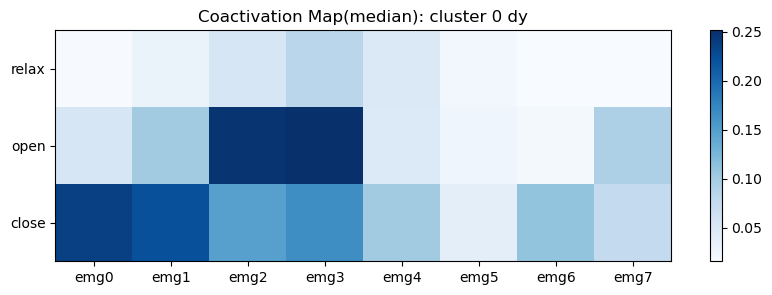

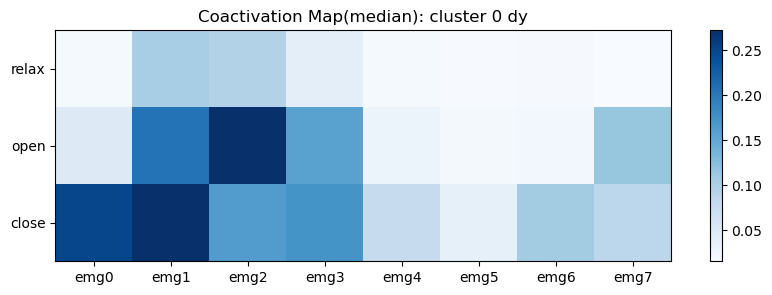

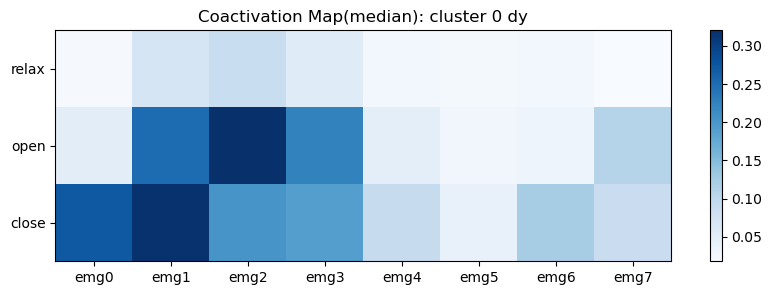

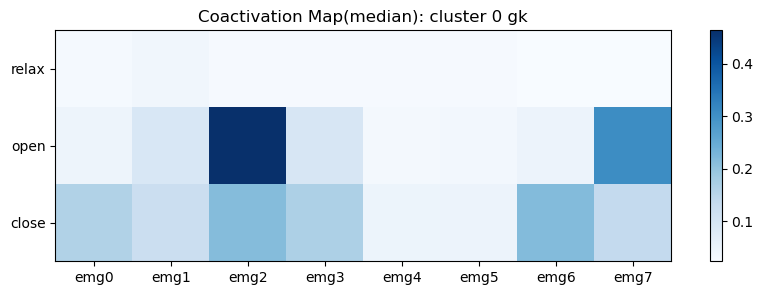

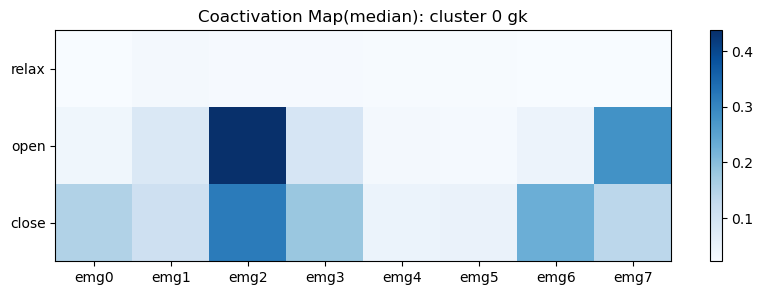

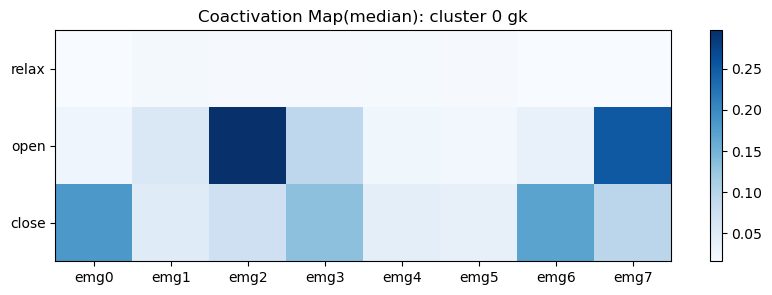

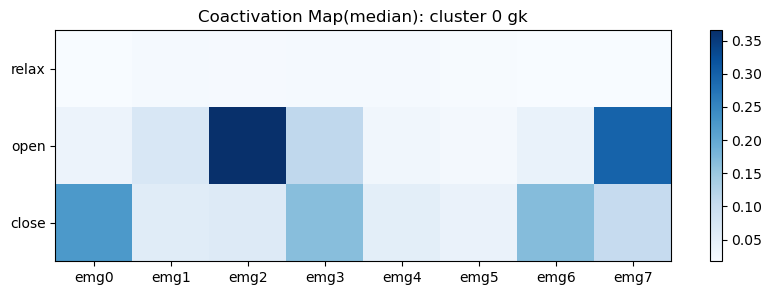

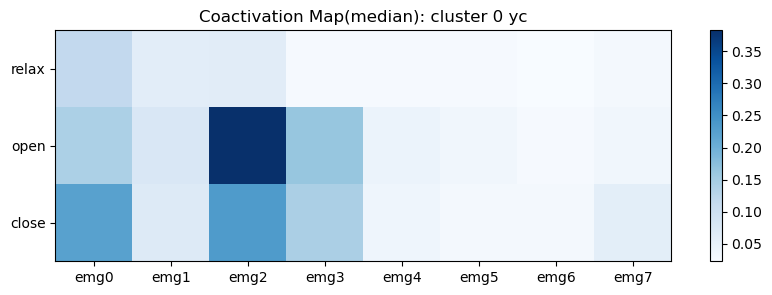

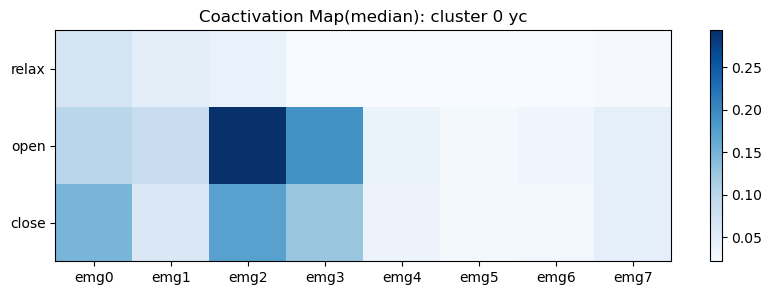

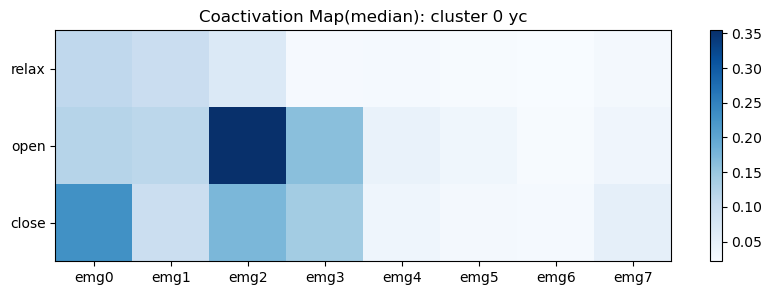

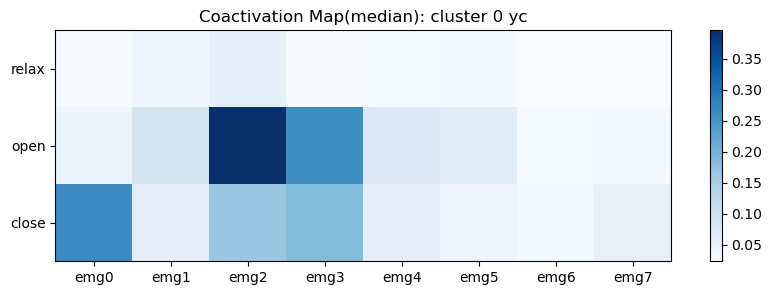

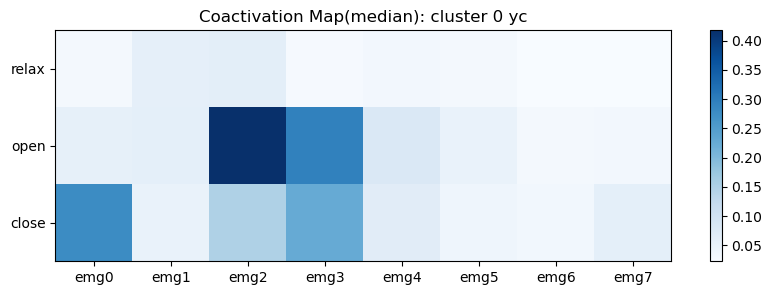

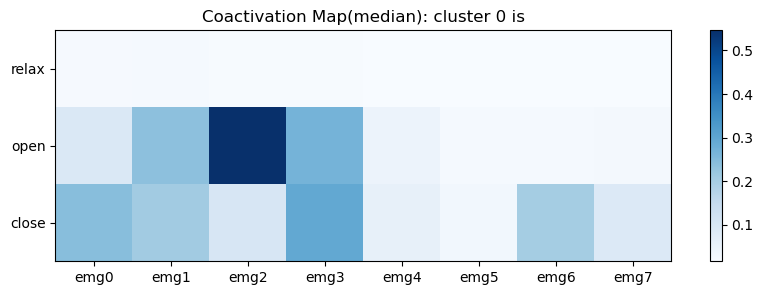

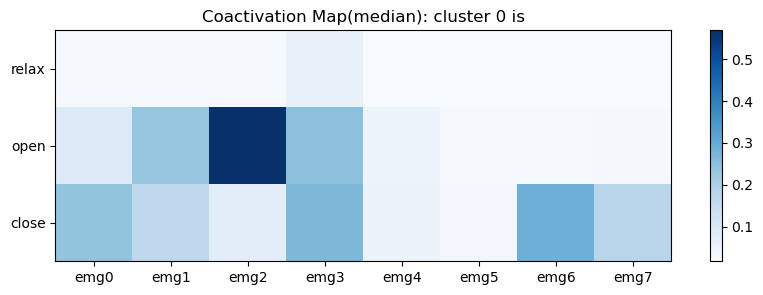

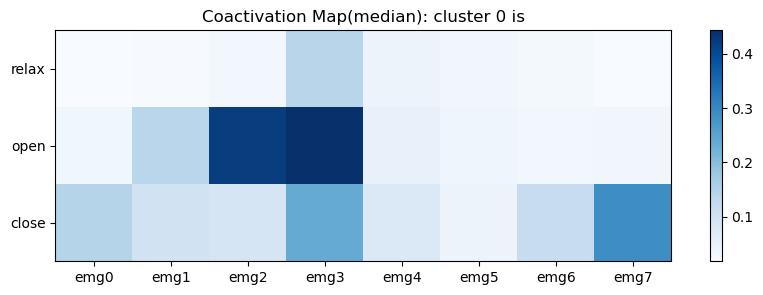

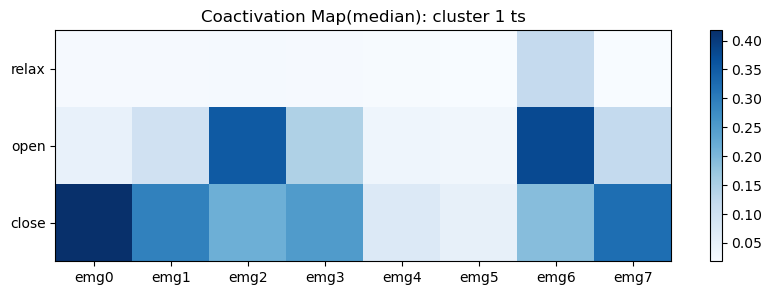

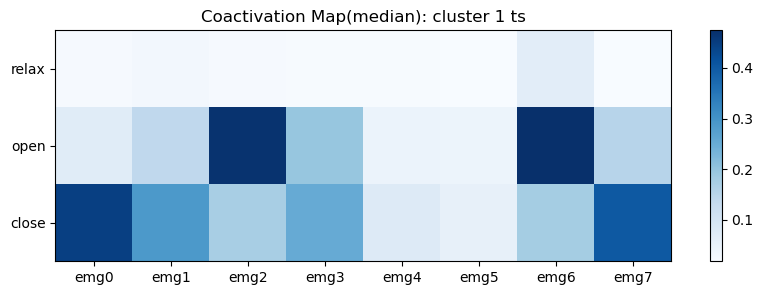

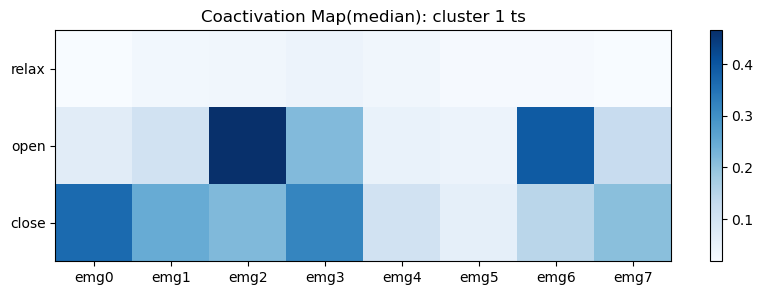

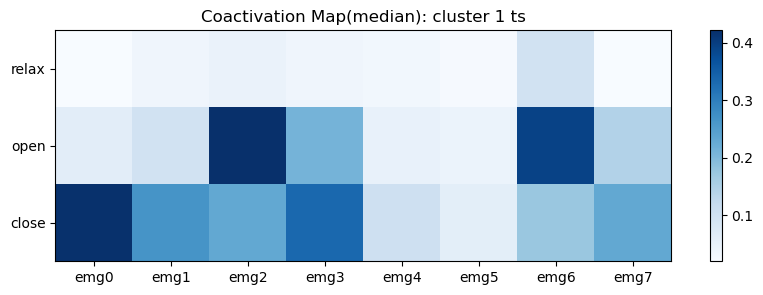

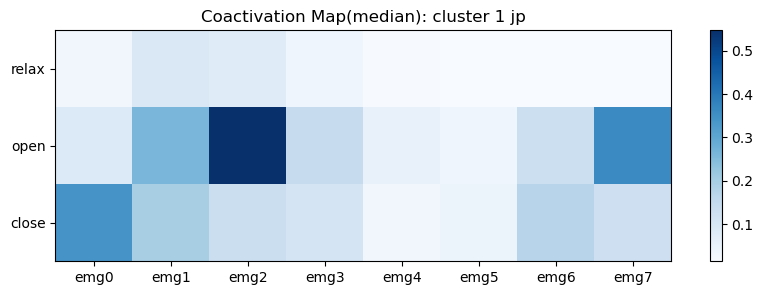

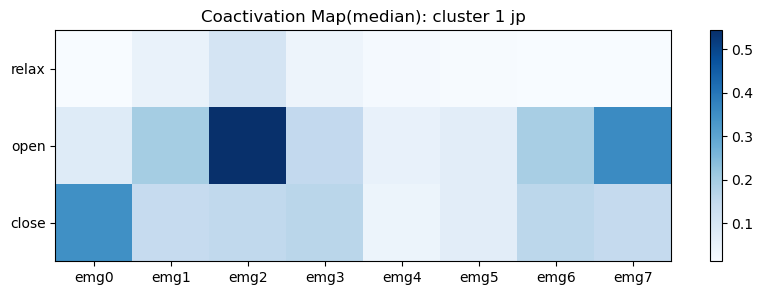

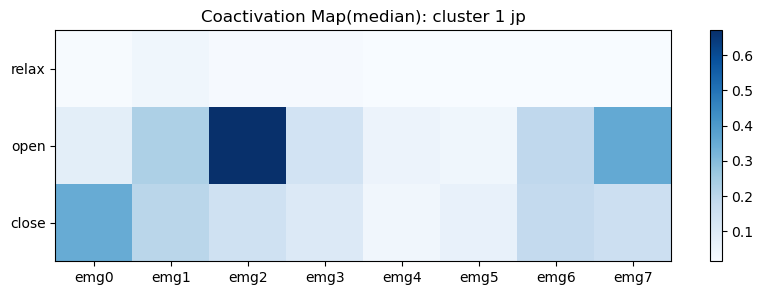

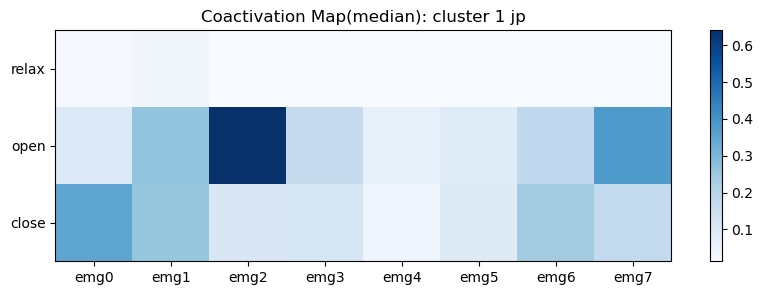

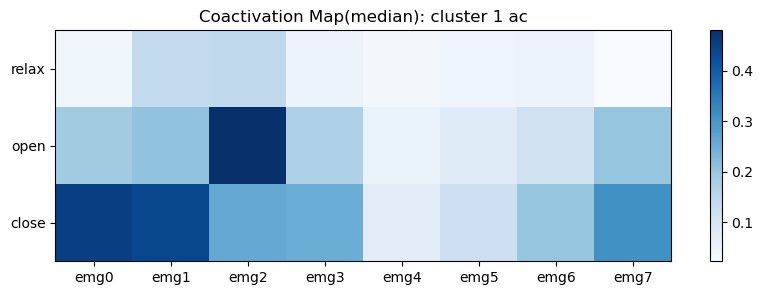

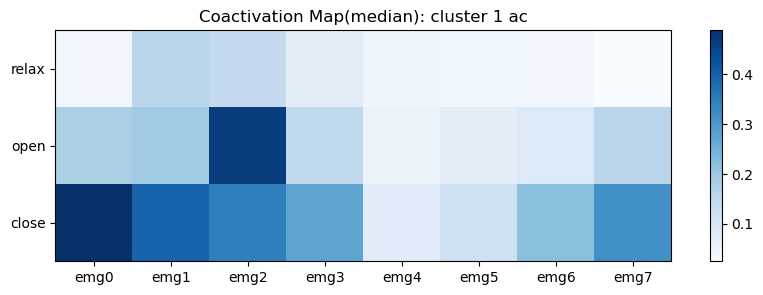

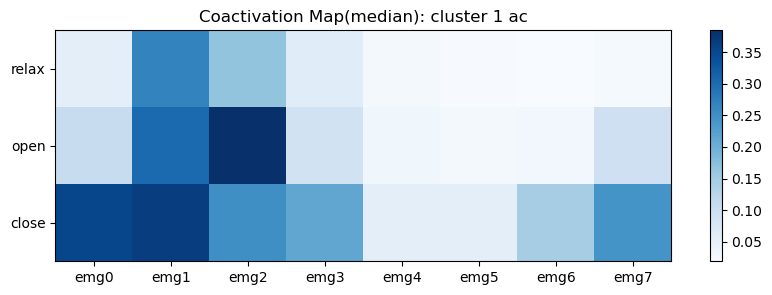

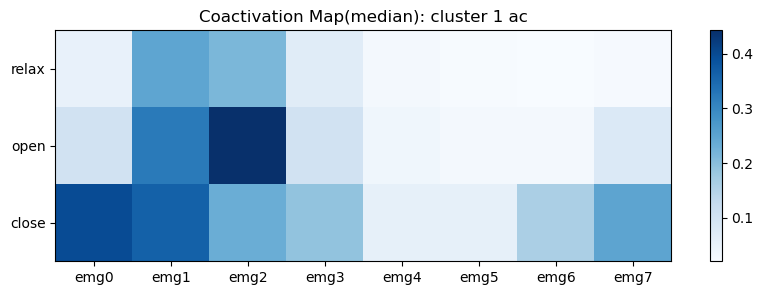

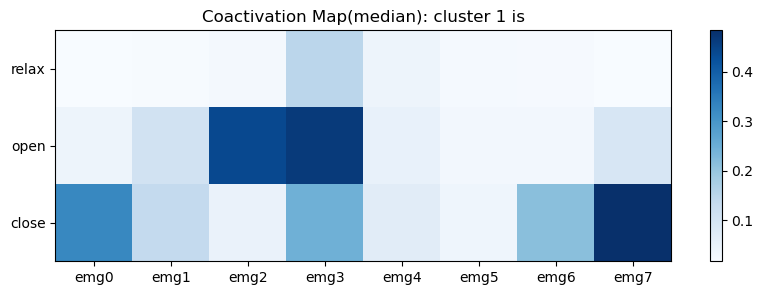

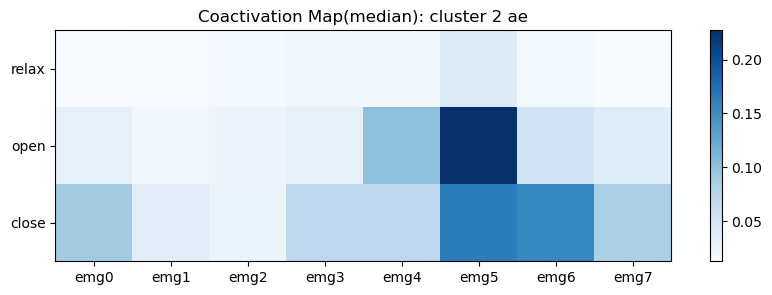

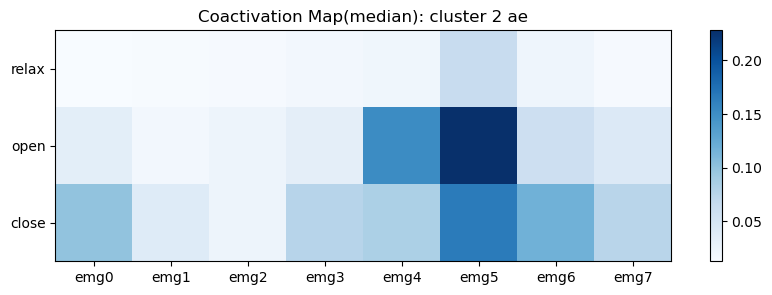

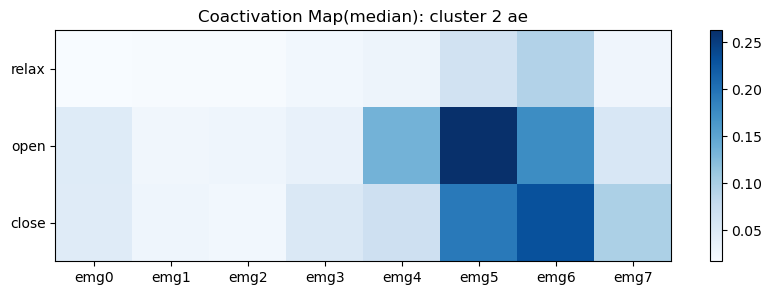

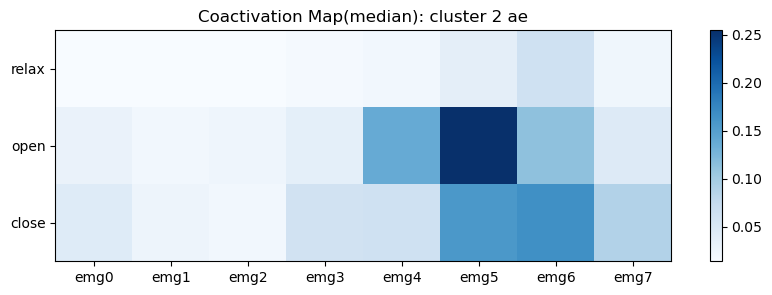

In [43]:
for cluster in np.unique(df.cluster):
    for index, row in df[df.cluster==cluster].iterrows():
        plot_coactivation_map(array_to_cm(np.array(row.values)[:24].astype(float)), title='cluster ' + str(cluster) + ' ' + row.subject_id)

## stroke patient testing

In [73]:
df_stroke = df_raw[df_raw.is_patient==True]

In [70]:
X_predict = df_raw[df_raw.is_patient==True].iloc[:,:24].values

In [74]:
df_stroke['cluster'] = kmeans.fit_predict(X_predict)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_69687/2352050923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['cluster'] = kmeans.fit_predict(X_predict)


In [75]:
df_stroke

gt0emg0   gt0emg1   gt0emg2   gt0emg3   gt0emg4   gt0emg5   gt0emg6  \
0   0.033333  0.034667  0.036000  0.036000  0.070667  0.078667  0.057333   
0   0.044643  0.057143  0.085714  0.116071  0.092857  0.080357  0.046429   
0   0.132290  0.120910  0.049787  0.038407  0.039829  0.041252  0.054054   
0   0.038462  0.041667  0.054487  0.091346  0.097756  0.153846  0.056090   
0   0.037360  0.043587  0.044832  0.064757  0.124533  0.134496  0.059776   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.044944  0.172753  0.307584  0.247191  0.265449  0.085674  0.036517   
0   0.063776  0.107143  0.090561  0.053571  0.052296  0.034439  0.036990   
0   0.049137  0.166003  0.173971  0.062417  0.066401  0.031873  0.046481   
0   0.043478  0.157609  0.272645  0.264493  0.266304  0.096014  0.041667   
0   0.053121  0.172643  0.232404  0.086321  0.094290  0.035857  0.047809   

     gt0emg7   gt1emg0   gt1emg1  ...   gt2emg2   gt2emg3   gt2emg4   gt2emg5  \
0   0.041333  0.033333  0.038667  ...  0.069333  0.100000  0.138667  0.349333   
0   0.046429  0.067857  0.071429  ...  0.175000  0.316071  0.421429  0.671429   
0   0.091038  0.159317  0.233286  ...  0.145092  0.206259  0.147937  0.083926   
0   0.041667  0.043269  0.046474  ...  0.076923  0.126603  0.158654  0.376603   
0   0.037360  0.049813  0.059776  ...  0.098381  0.194271  0.371108  0.460772   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0   0.039326  0.036517  0.186798  ...  0.526685  0.338483  0.330056  0.108146   
0   0.122449  0.054847  0.117347  ...  0.201531  0.218112  0.146684  0.061224   
0   0.078353  0.047809  0.175299  ...  0.357238  0.187251  0.209827  0.138778   
0   0.038043  0.043478  0.201087  ...  0.465580  0.534420  0.391304  0.132246   
0   0.100930  0.051793  0.191235  ...  0.371846  0.213811  0.224436  0.156707   

     gt2emg6   gt2emg7   hand  is_patient  subject_id  cluster  
0   0.141333  0.113333   left        True          p3        1  
0   0.208929  0.304464   left        True          p3        1  
0   0.116643  0.216216   left        True          p3        1  
0   0.198718  0.081731   left        True          p3        1  
0   0.267123  0.173101   left        True          p3        1  
..       ...       ...    ...         ...         ...      ...  
0   0.047753  0.074438  right        True          p1        1  
0   0.088010  0.139668  right        True          p1        1  
0   0.054449  0.127490  right        True          p1        1  
0   0.047101  0.041667  right        True          p1        1  
0   0.054449  0.126162  right        True          p1        1  

[230 rows x 28 columns]

/Users/elise/Desktop/myhand/coactivation/visualize.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10,3))


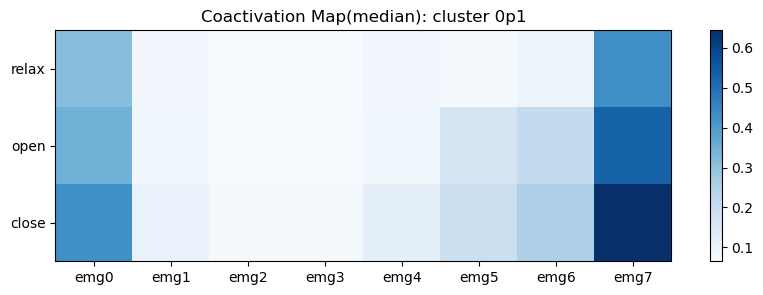

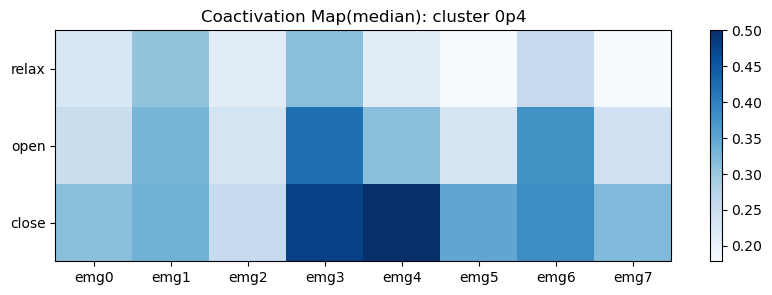

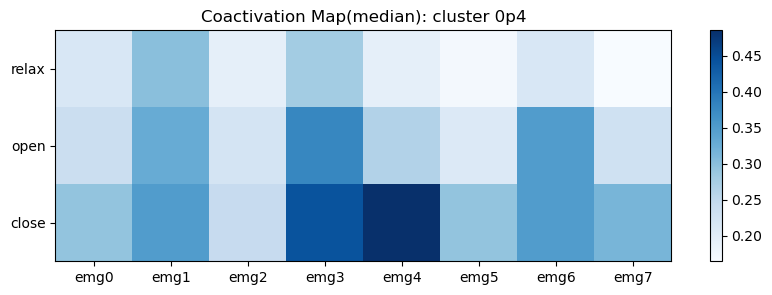

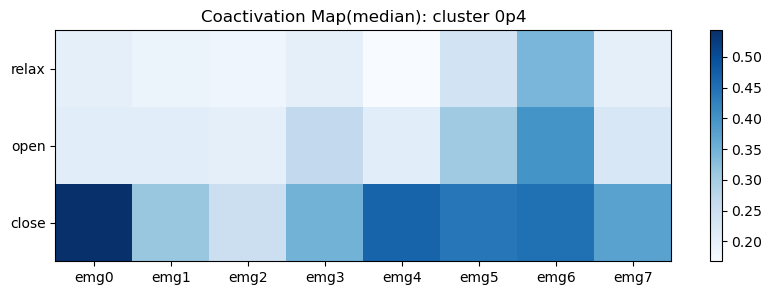

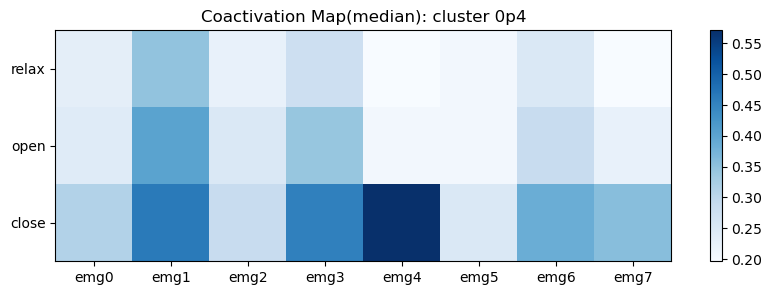

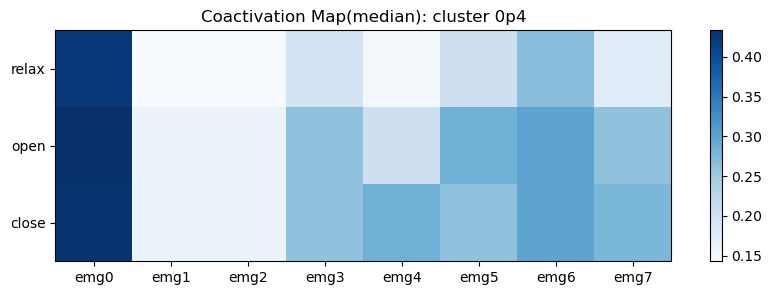

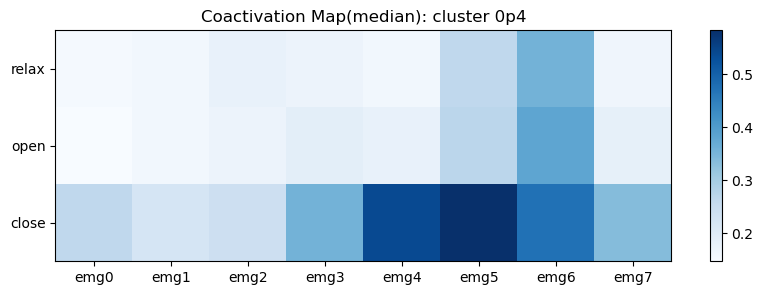

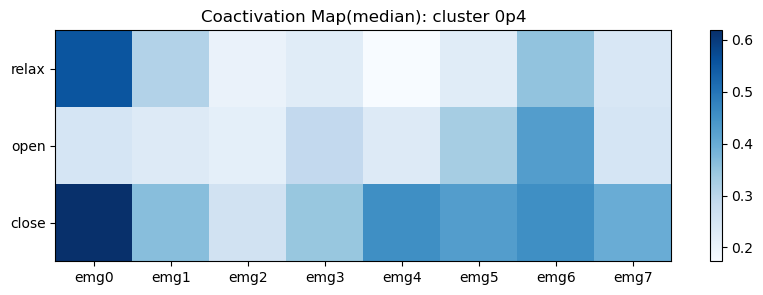

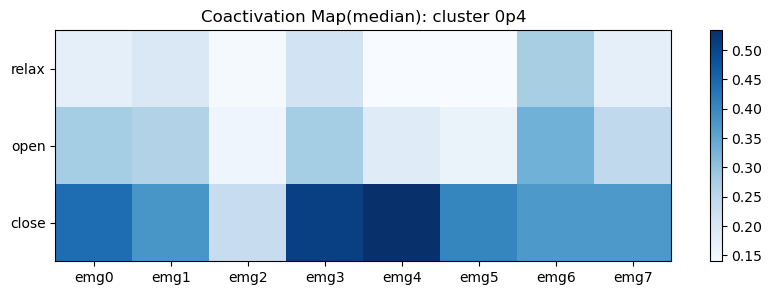

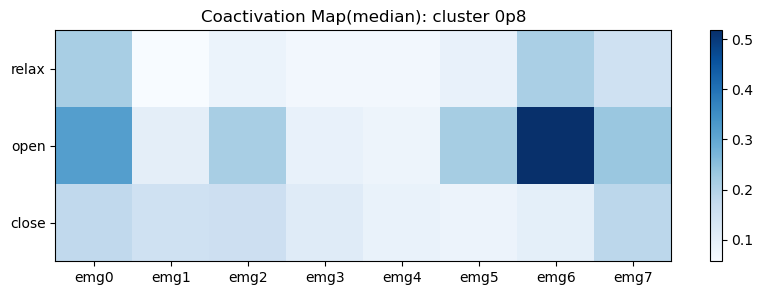

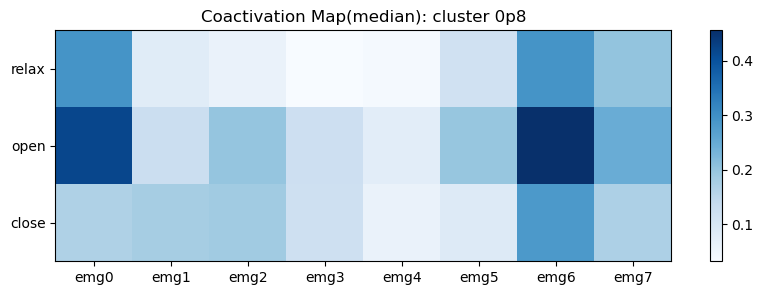

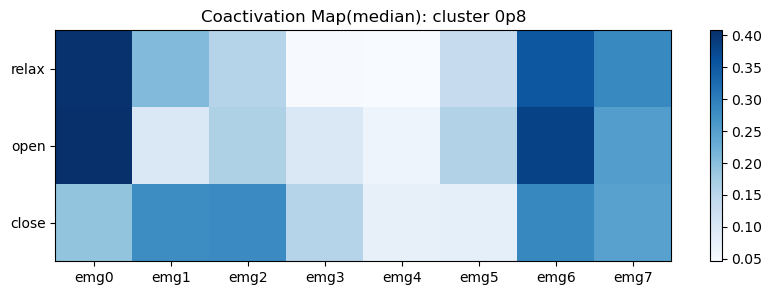

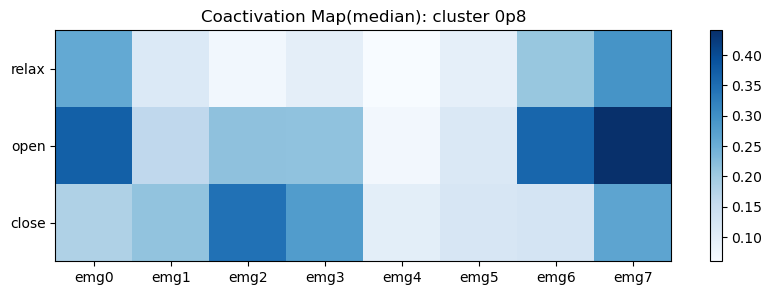

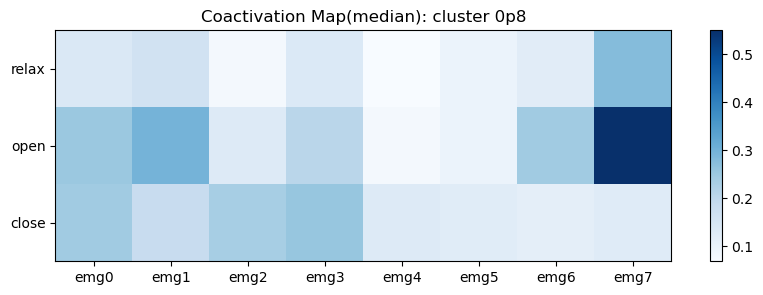

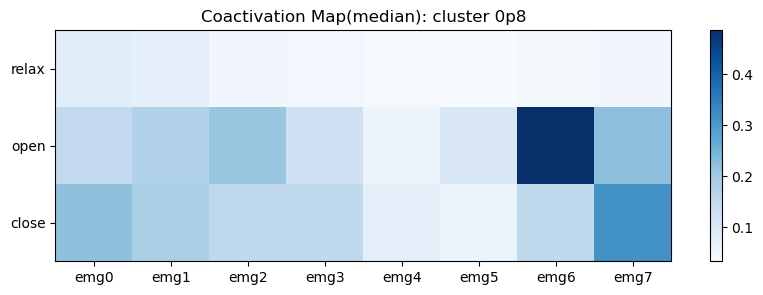

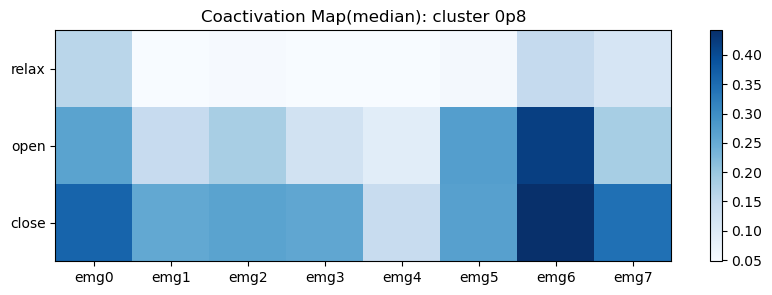

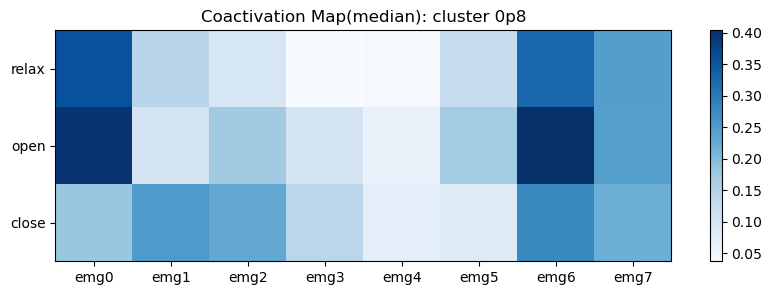

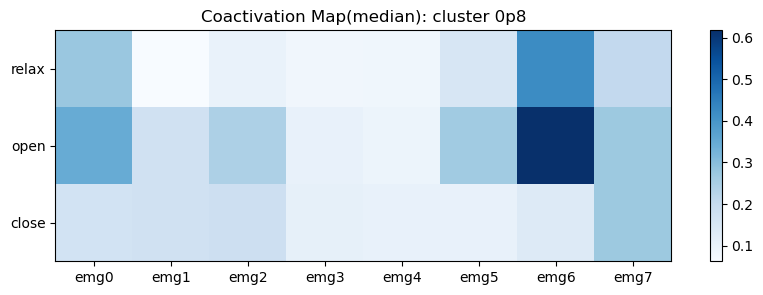

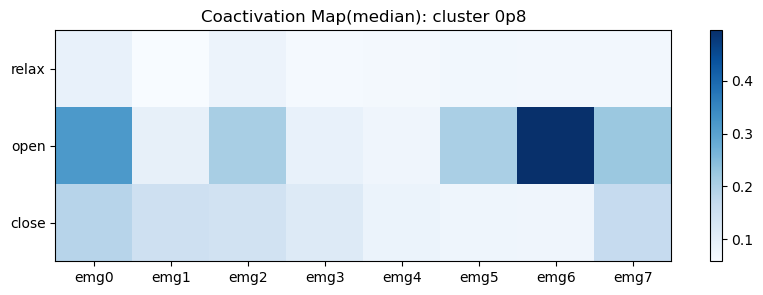

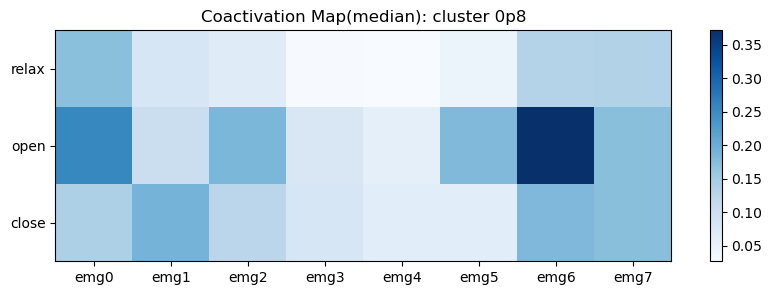

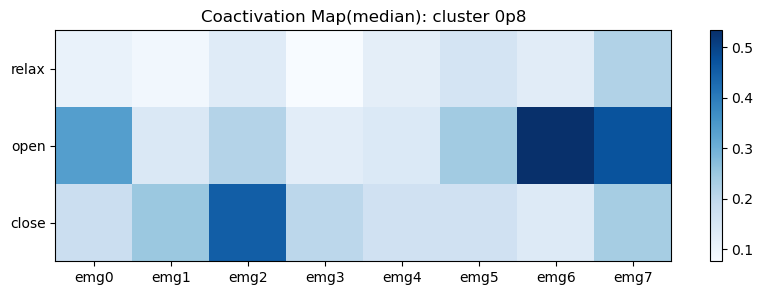

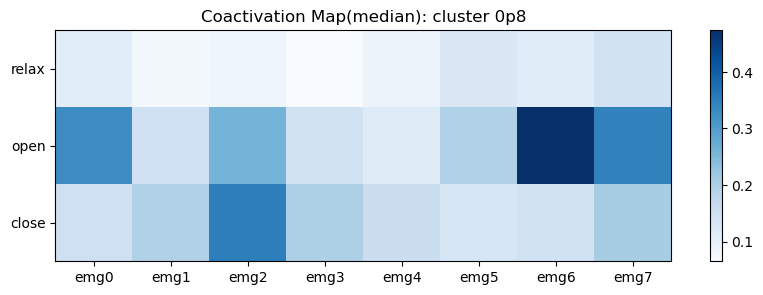

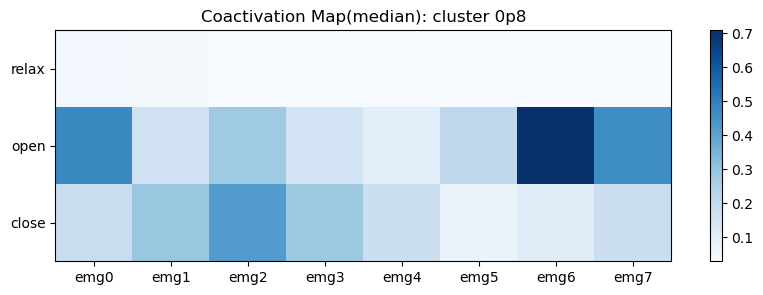

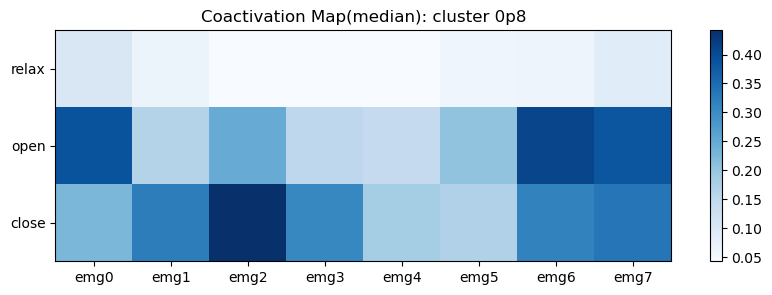

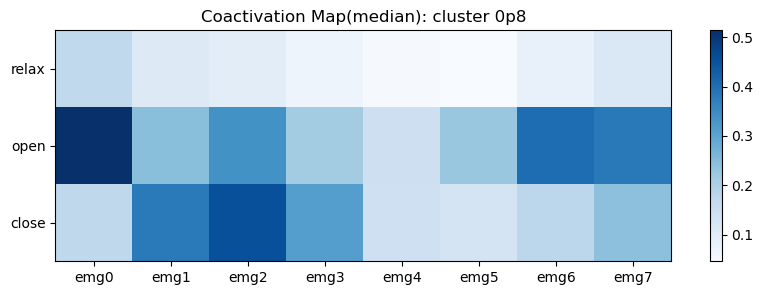

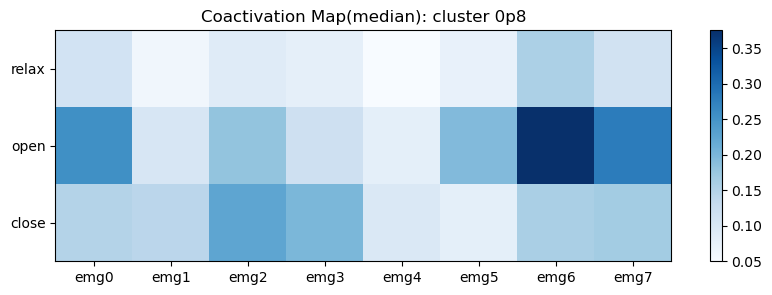

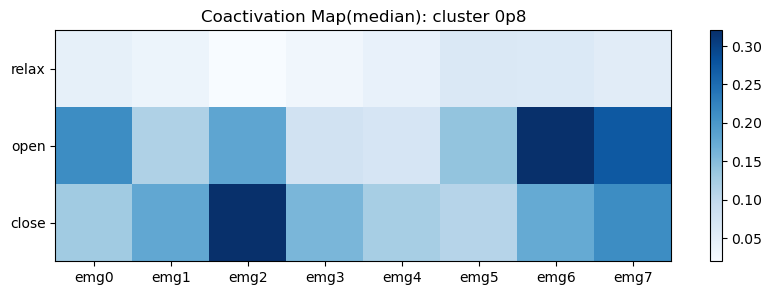

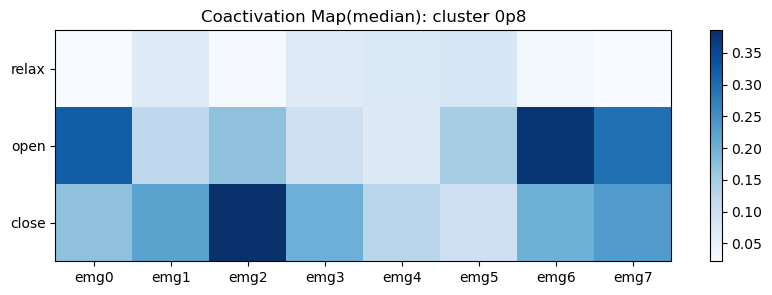

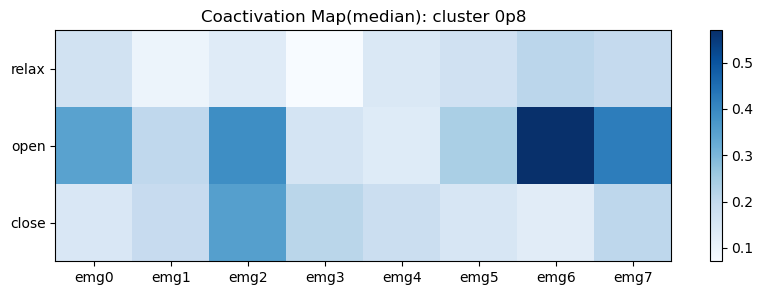

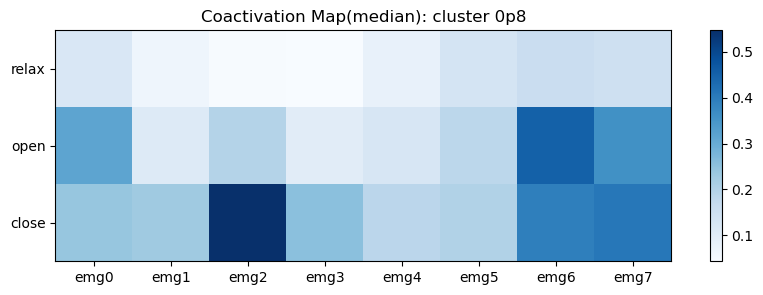

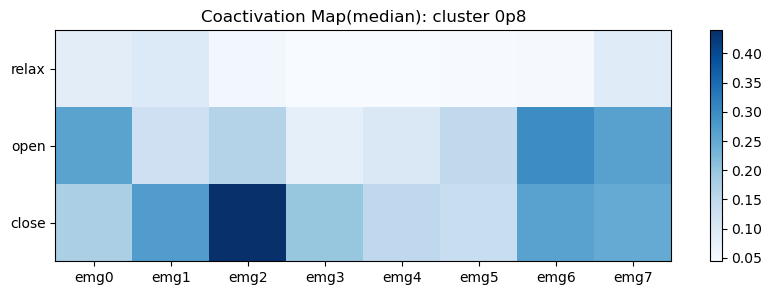

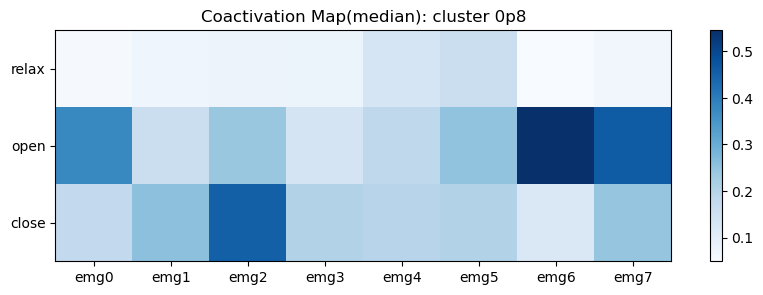

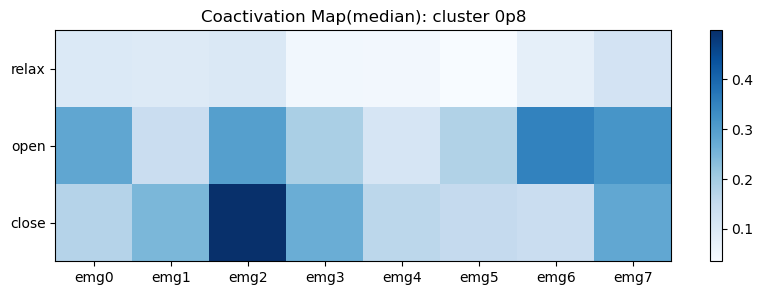

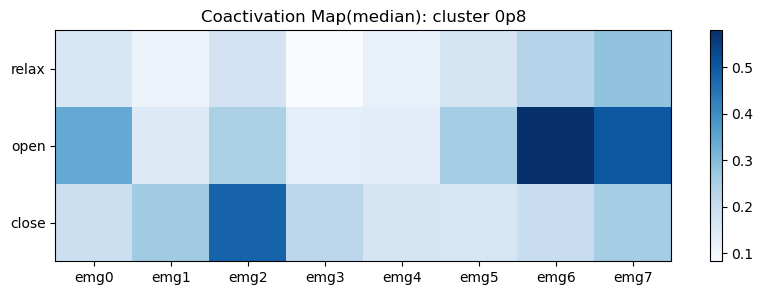

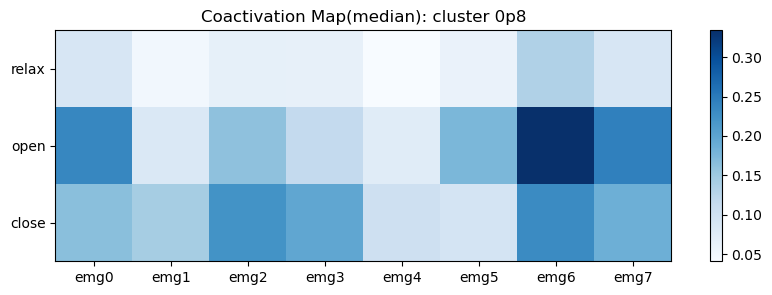

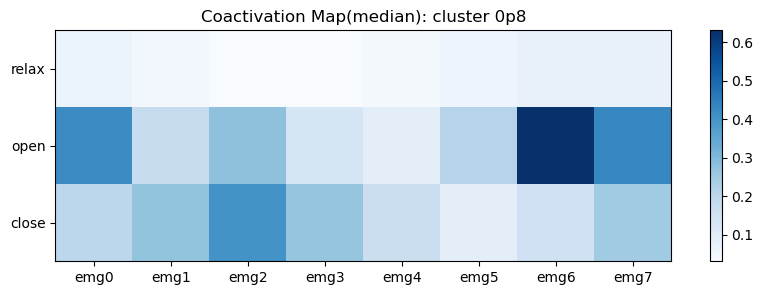

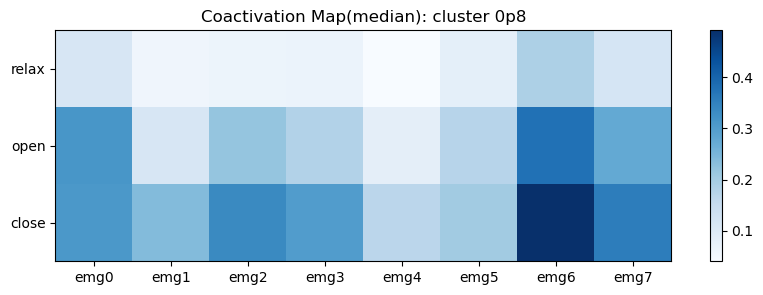

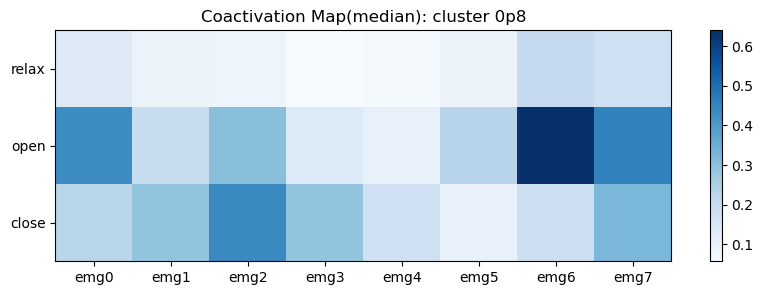

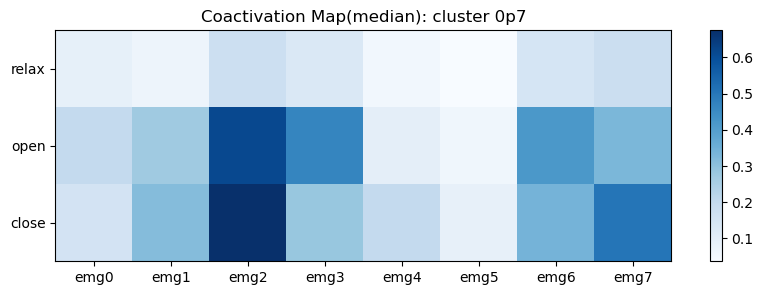

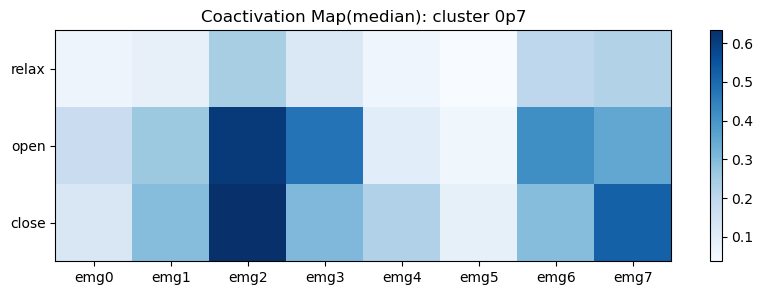

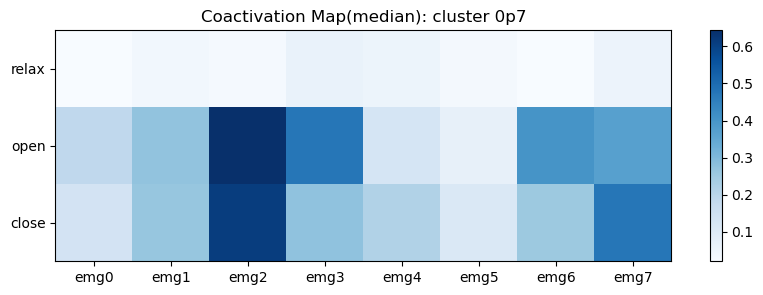

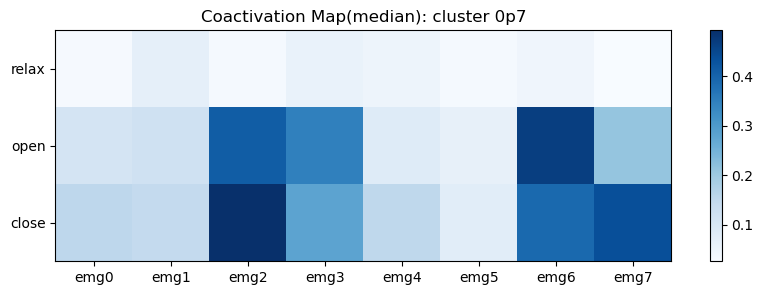

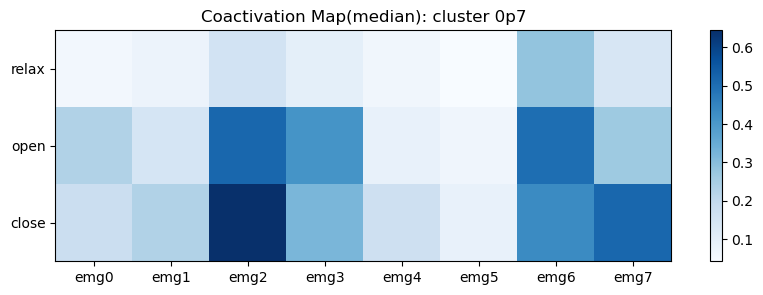

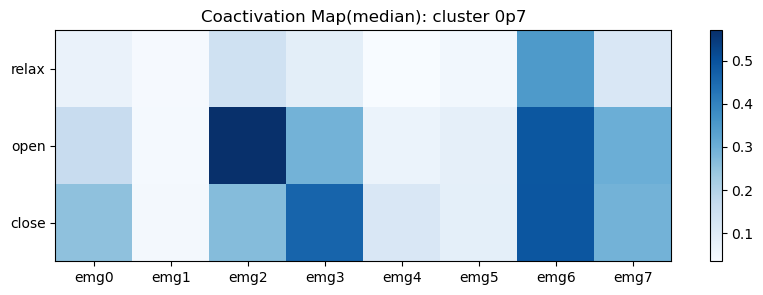

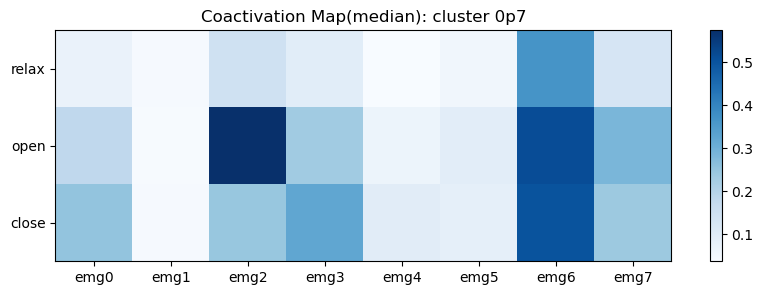

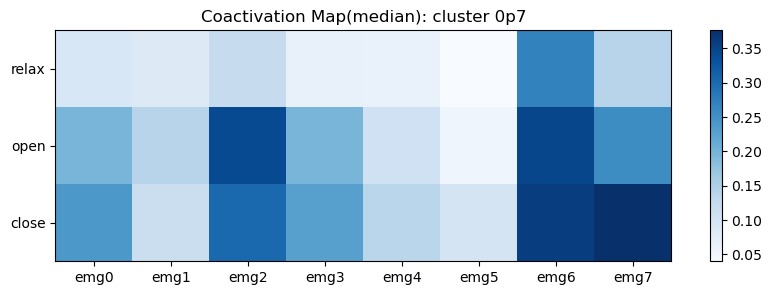

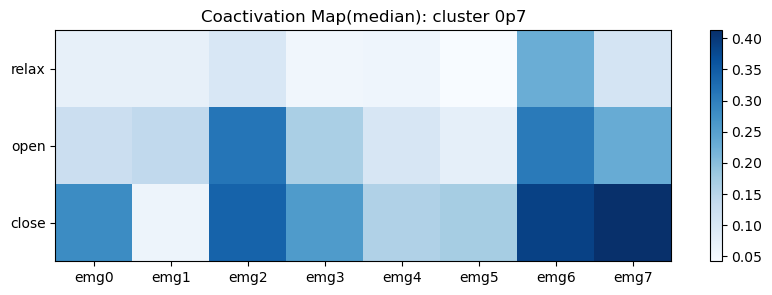

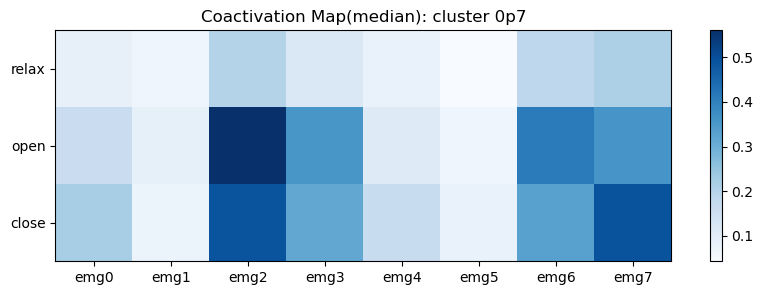

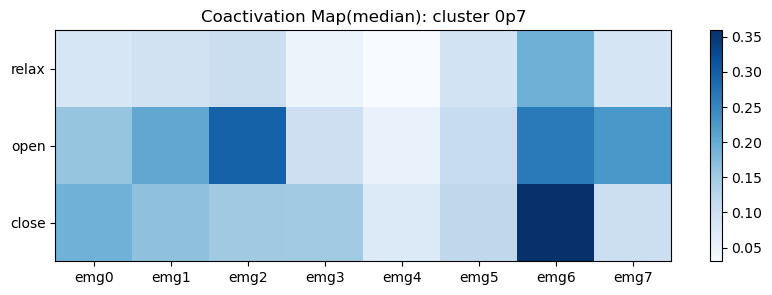

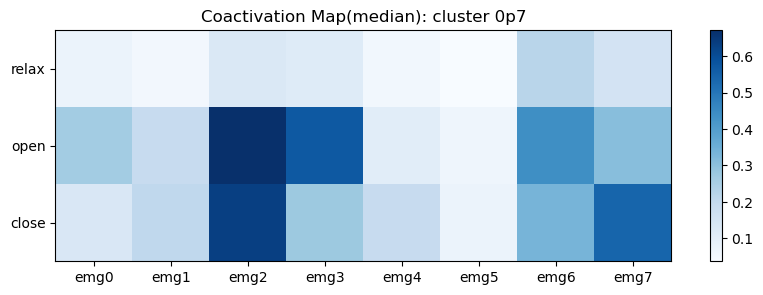

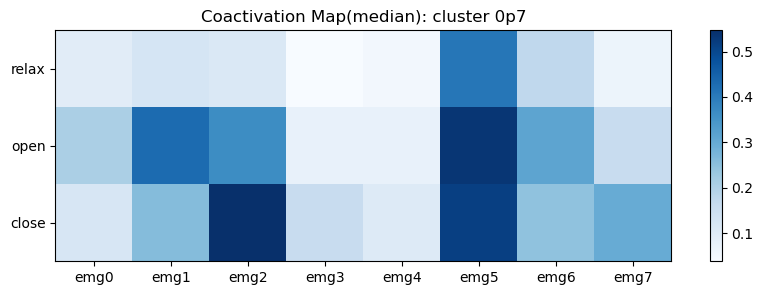

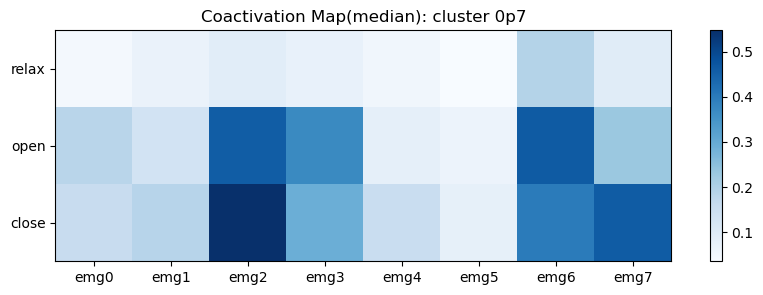

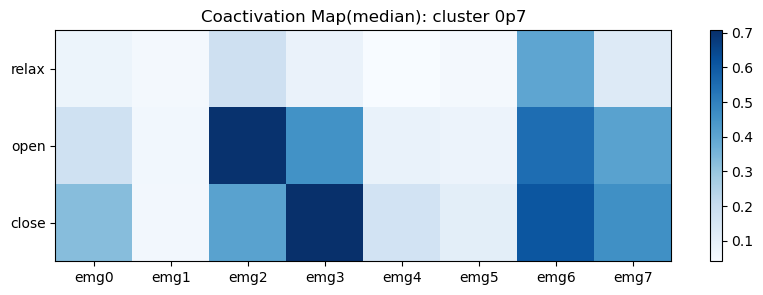

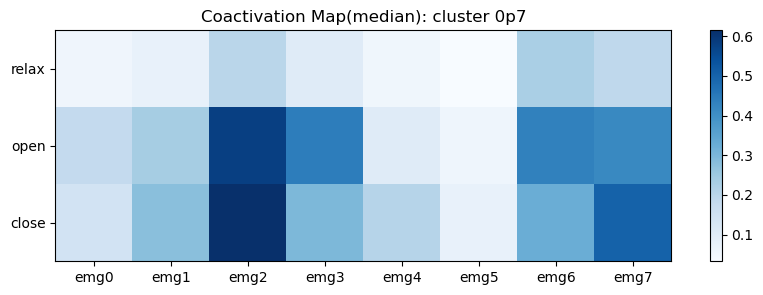

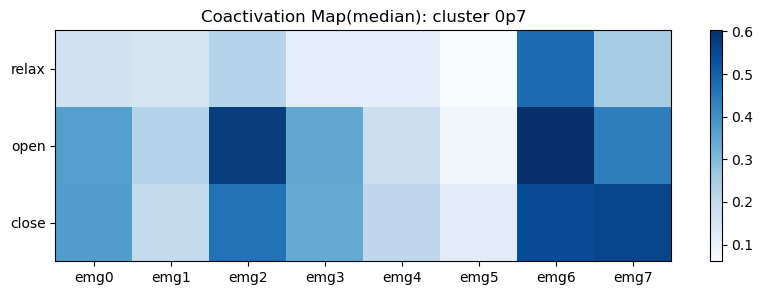

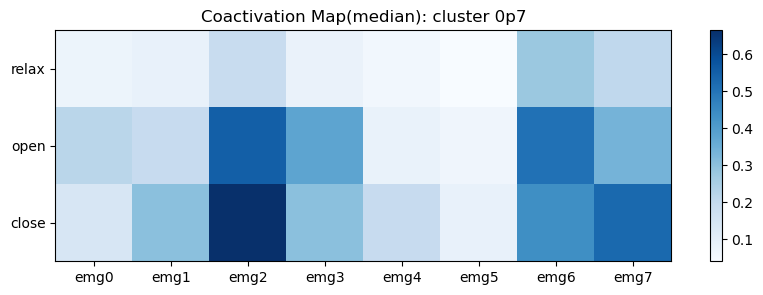

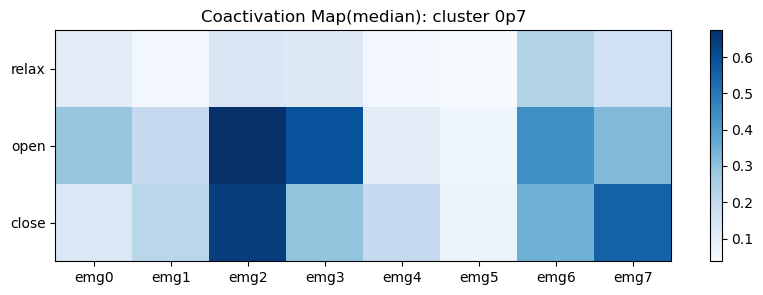

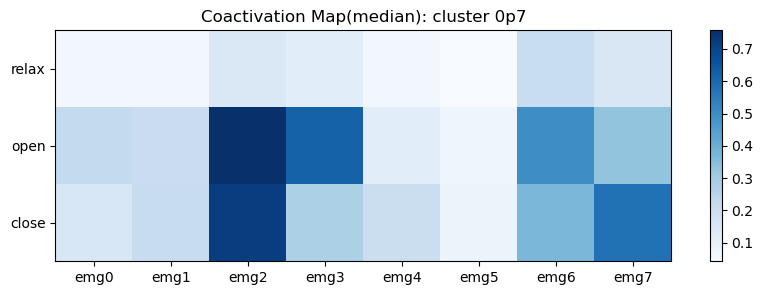

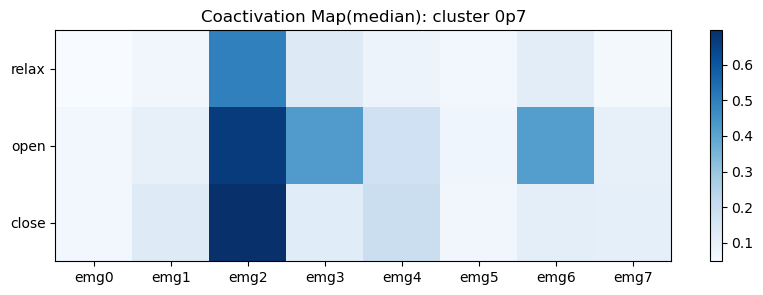

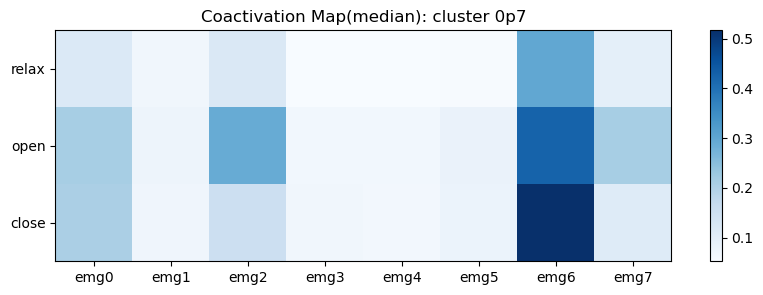

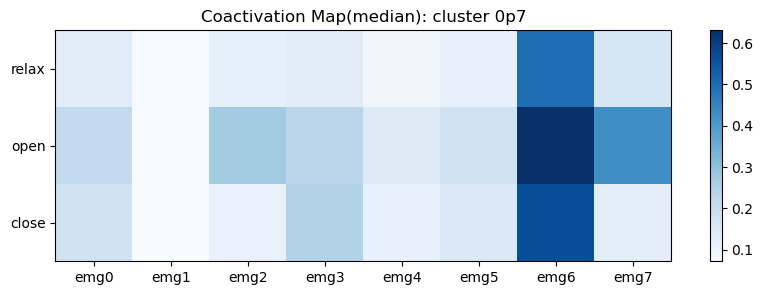

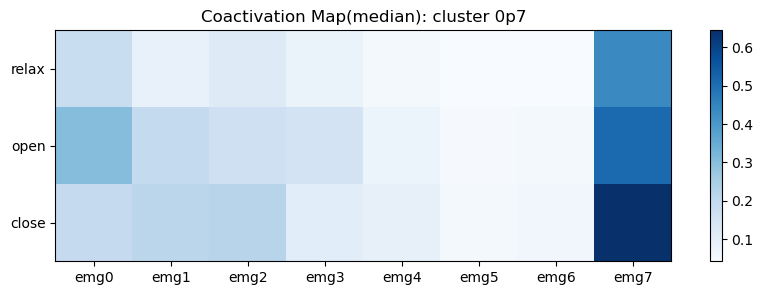

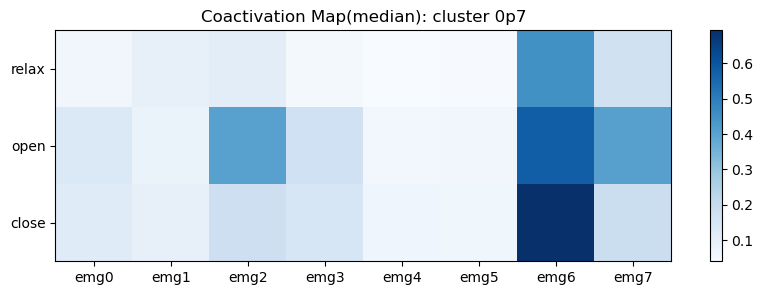

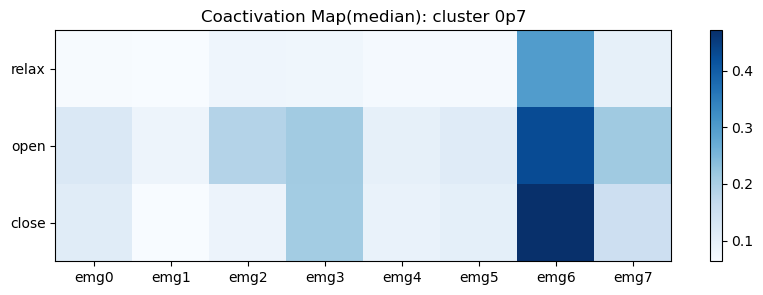

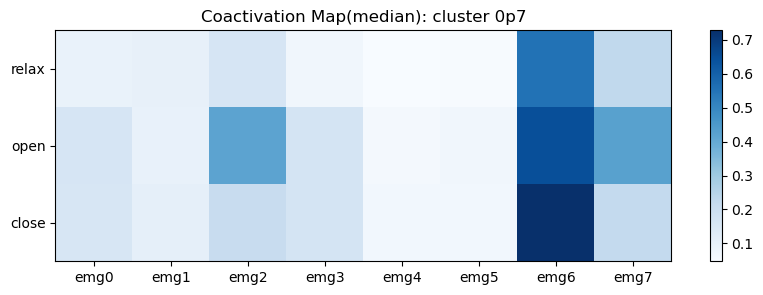

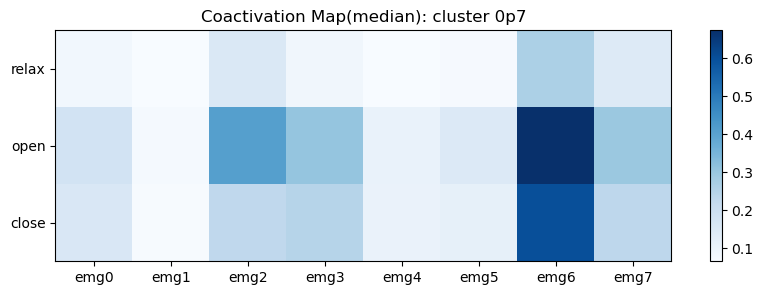

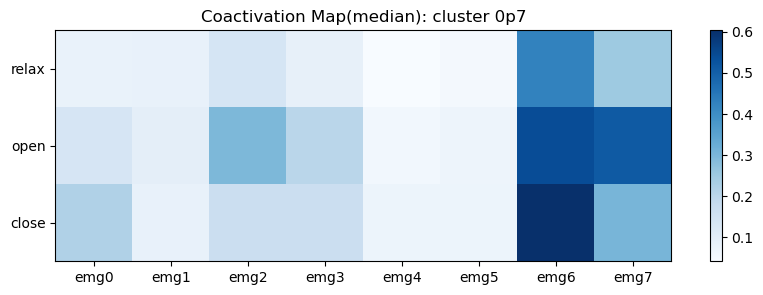

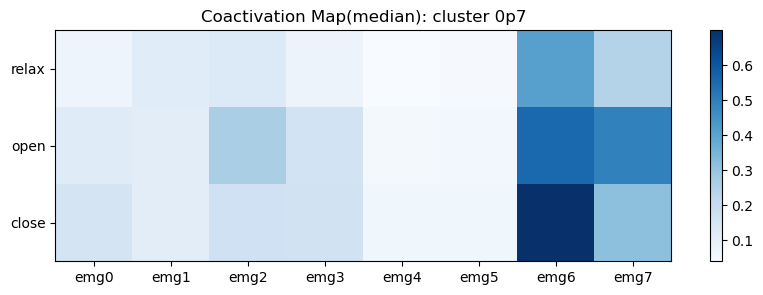

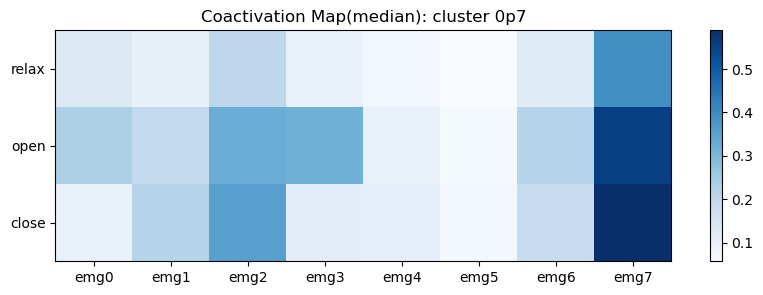

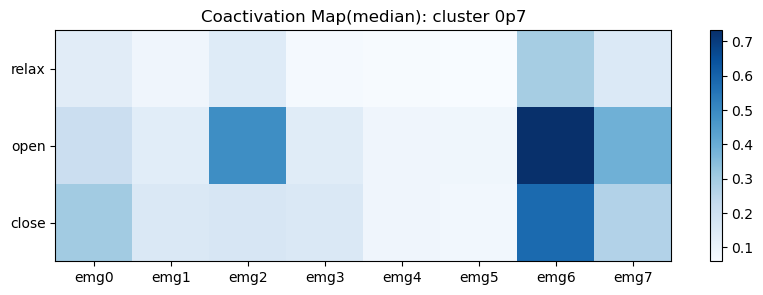

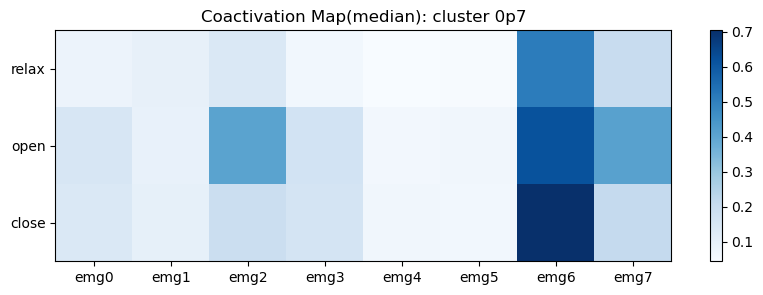

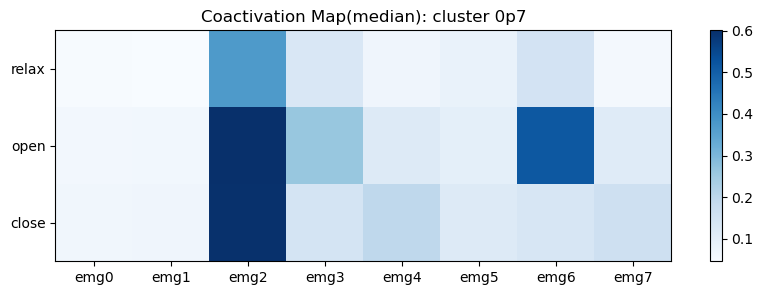

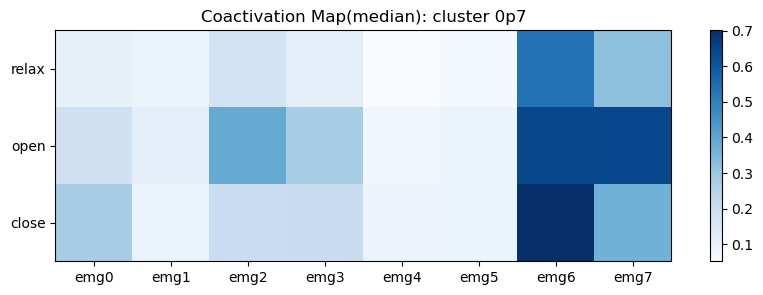

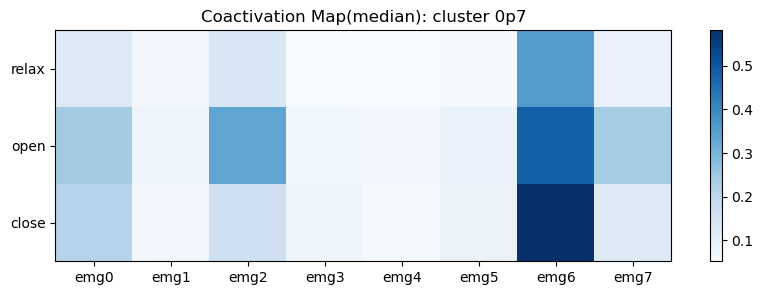

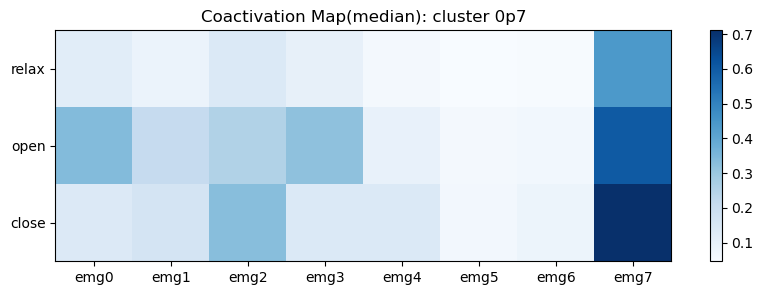

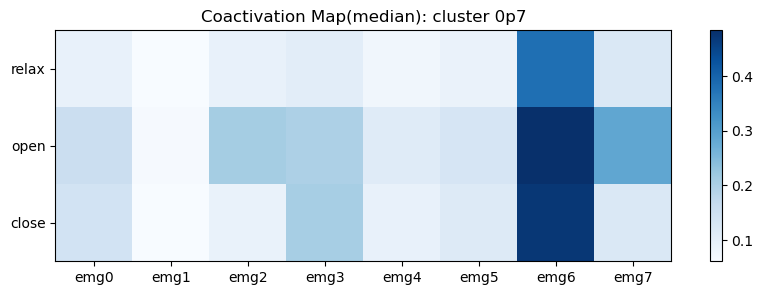

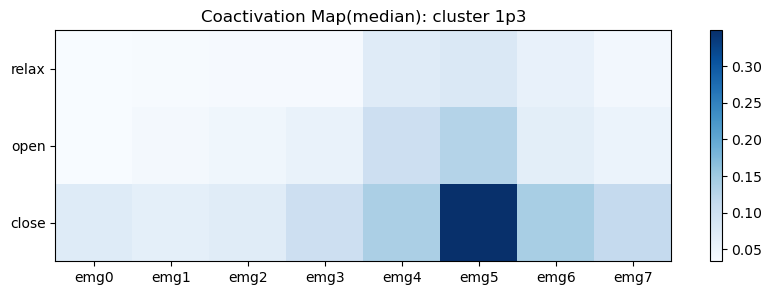

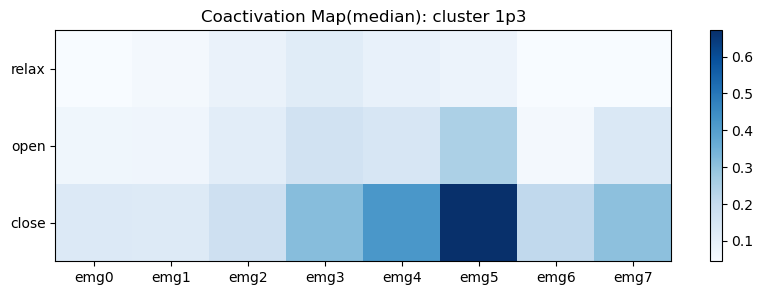

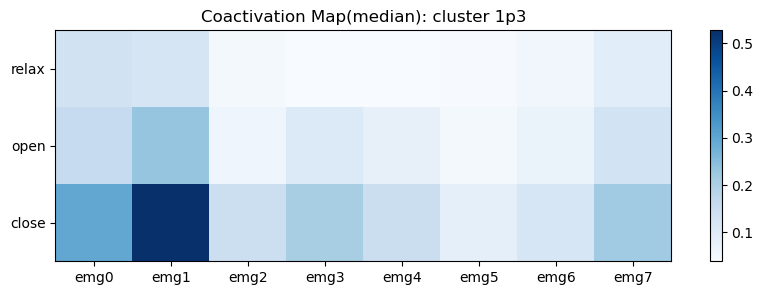

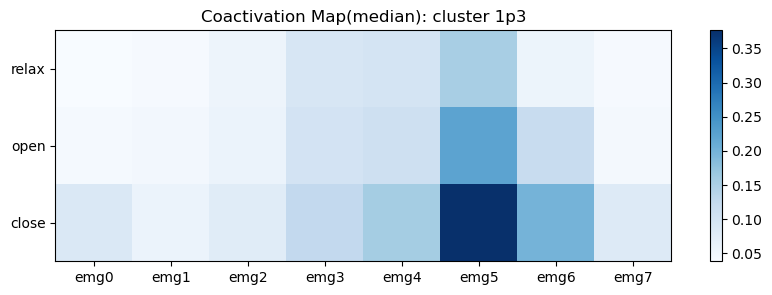

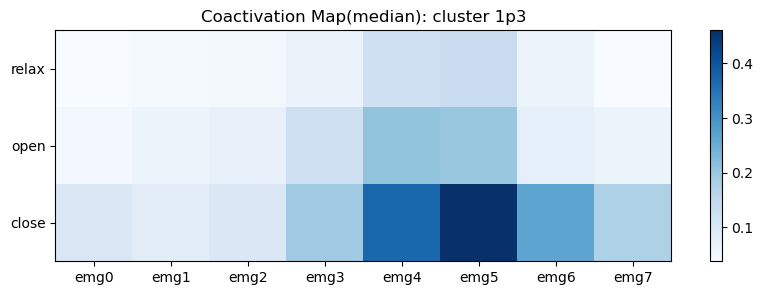

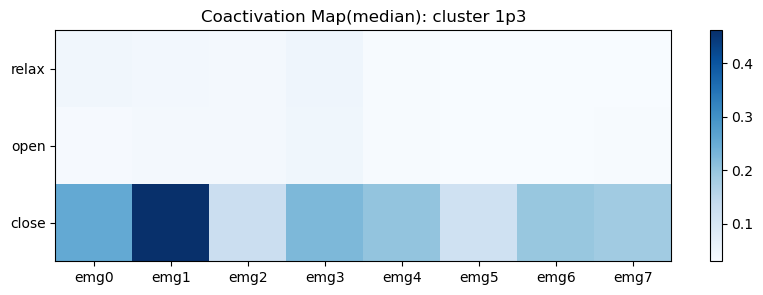

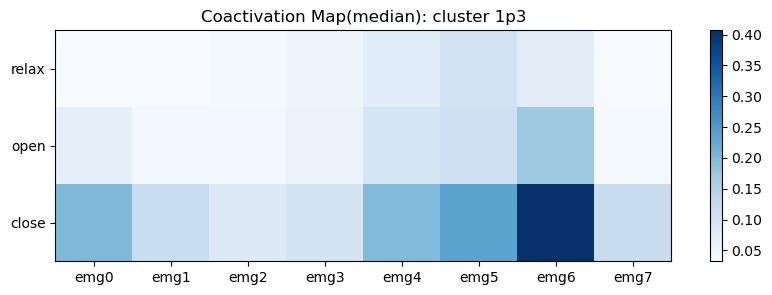

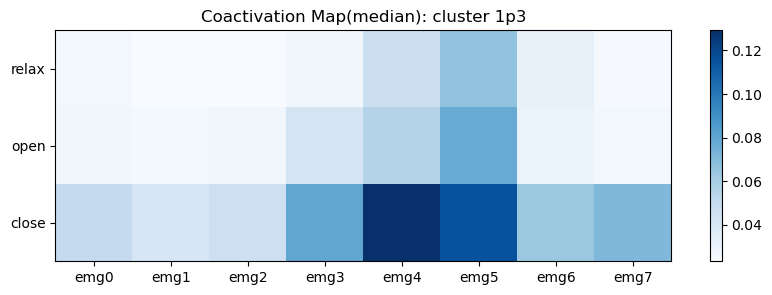

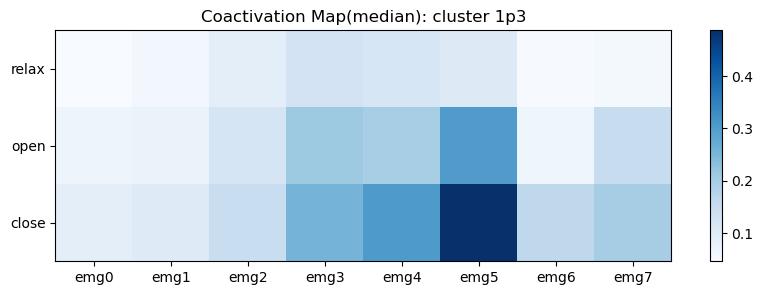

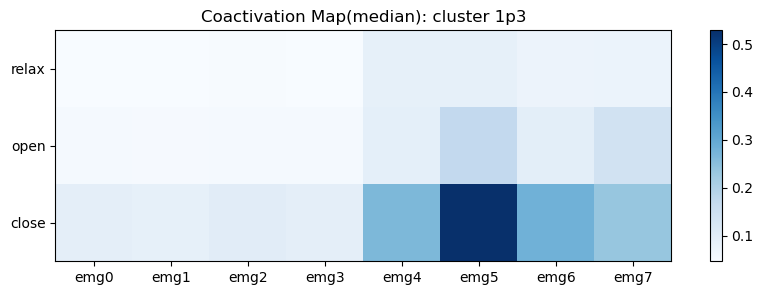

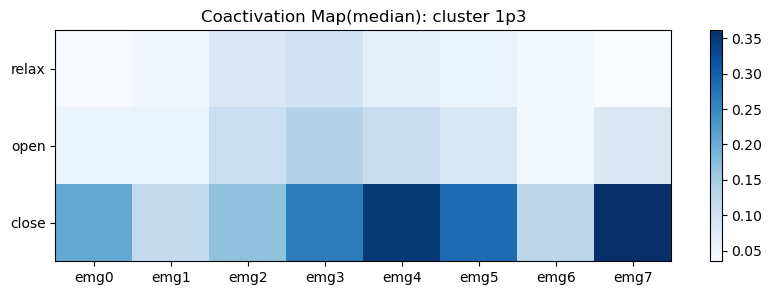

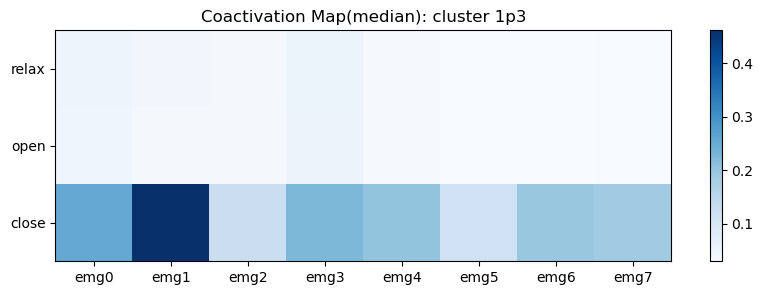

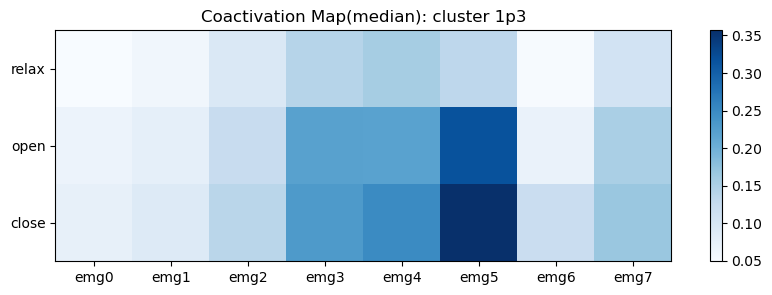

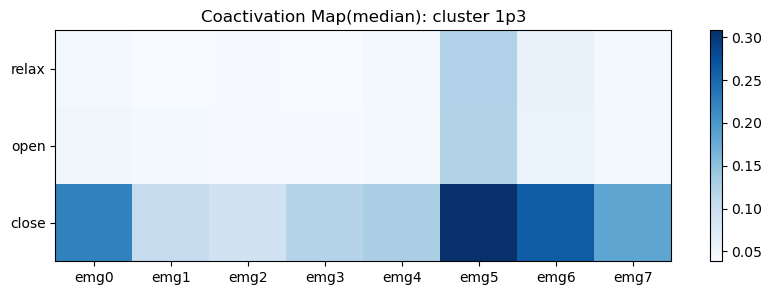

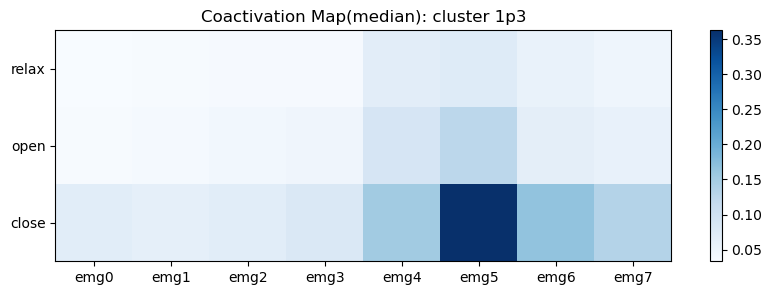

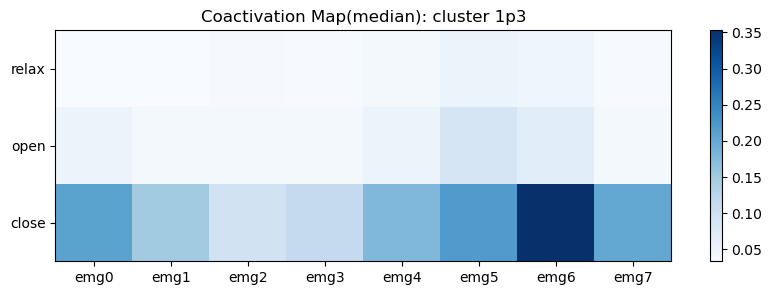

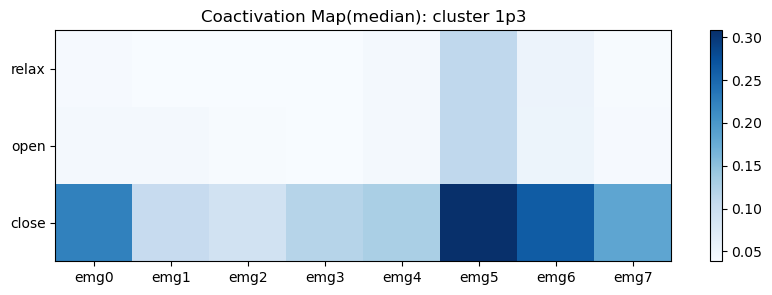

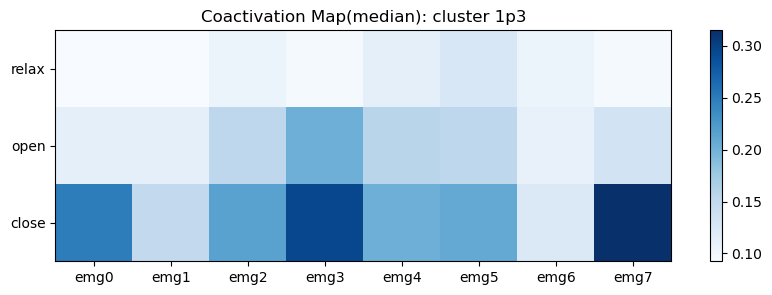

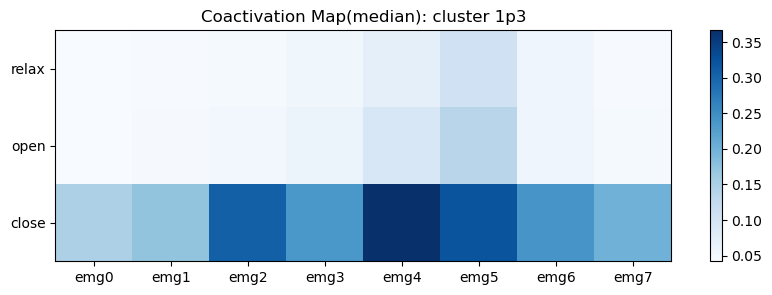

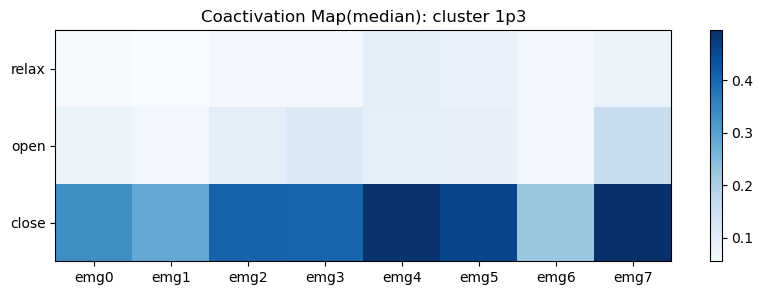

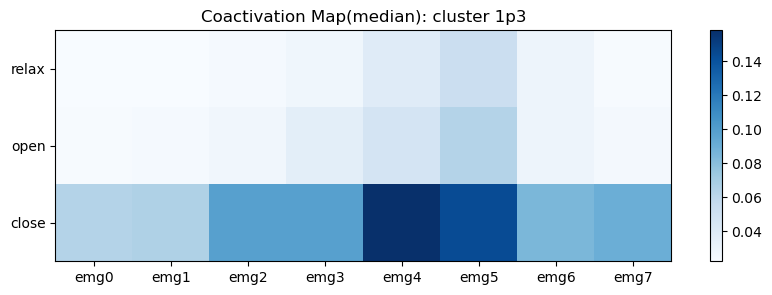

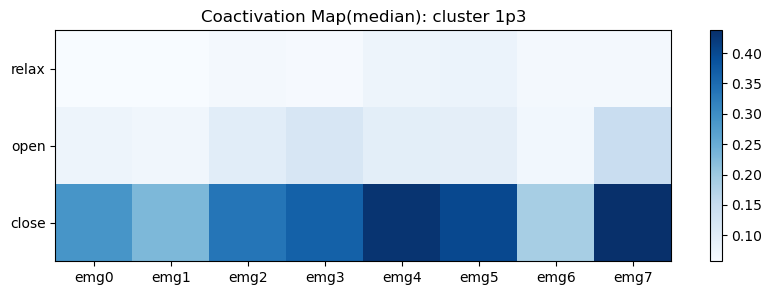

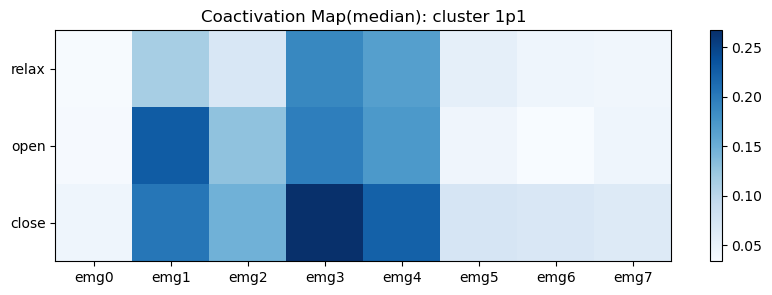

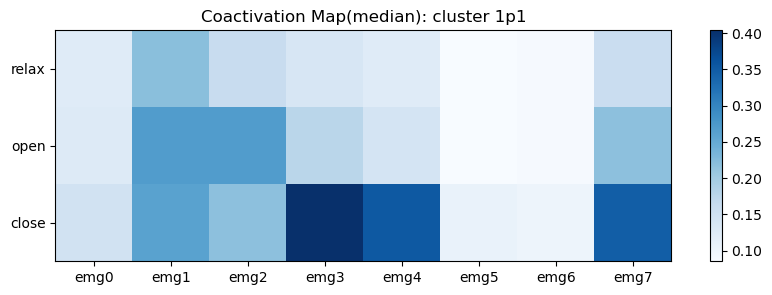

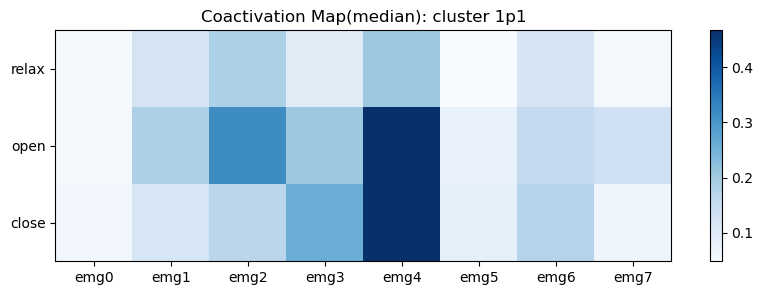

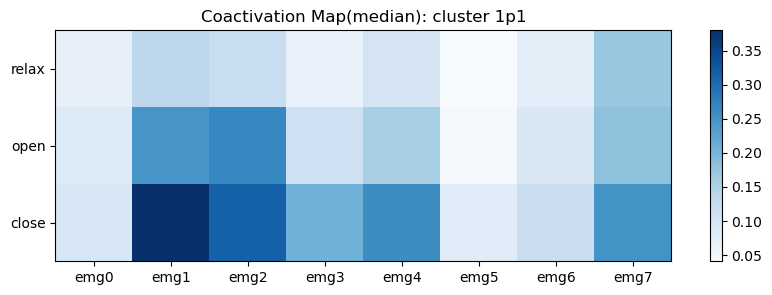

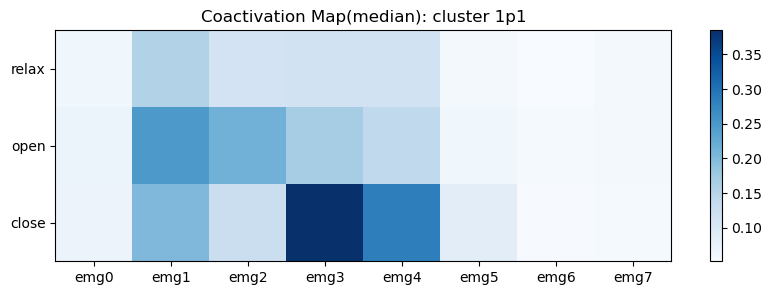

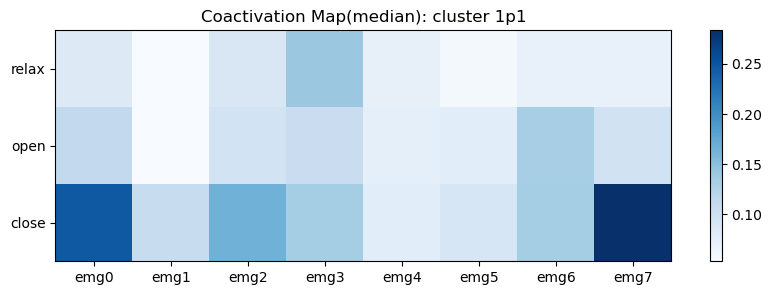

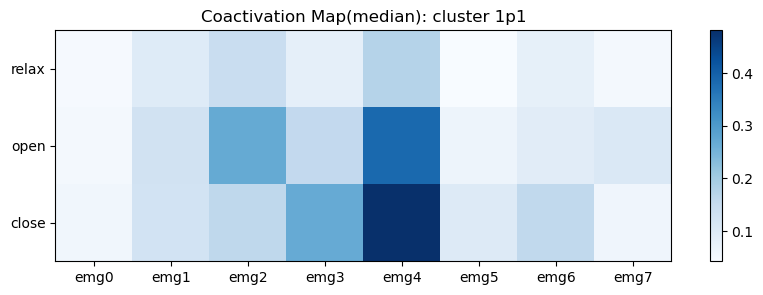

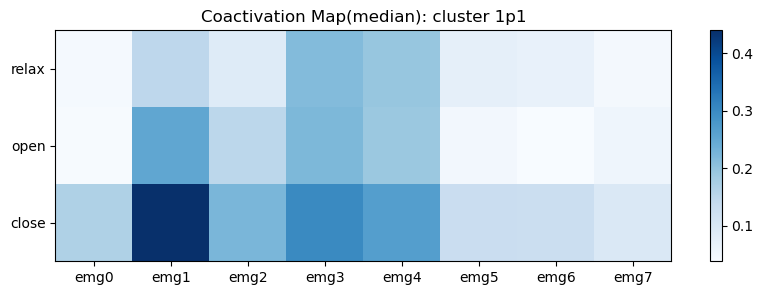

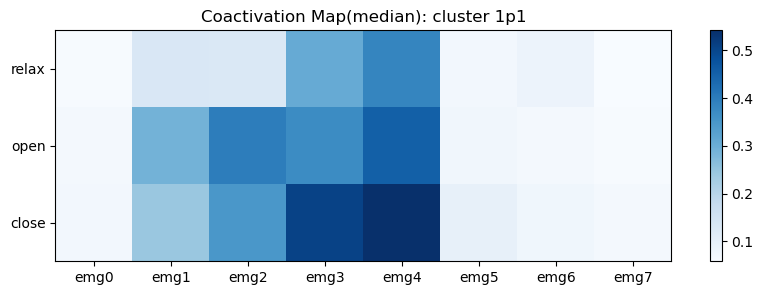

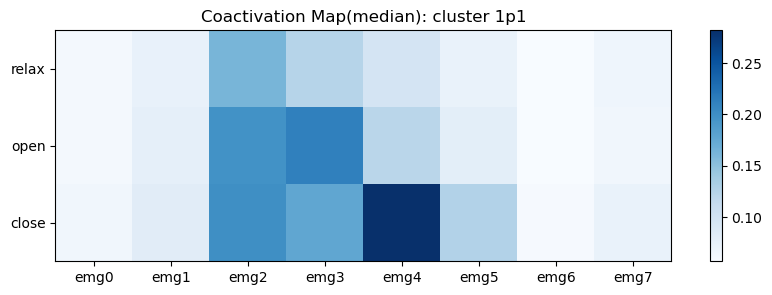

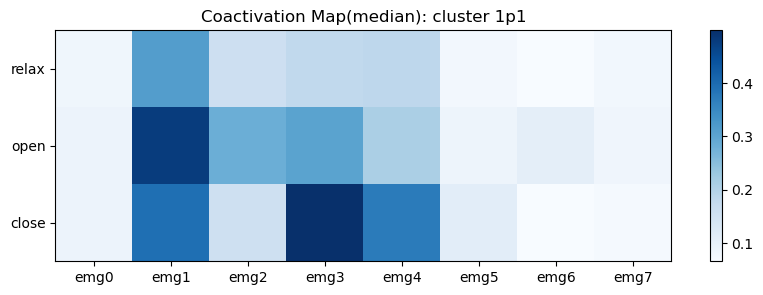

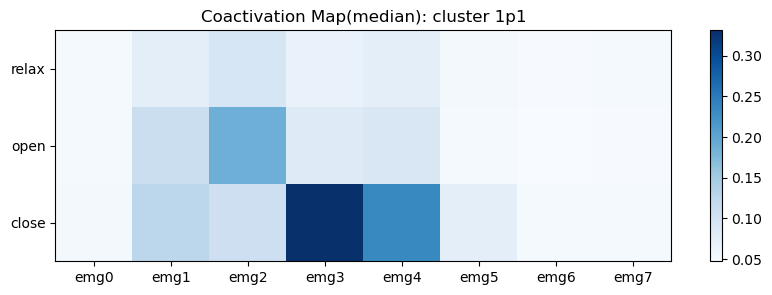

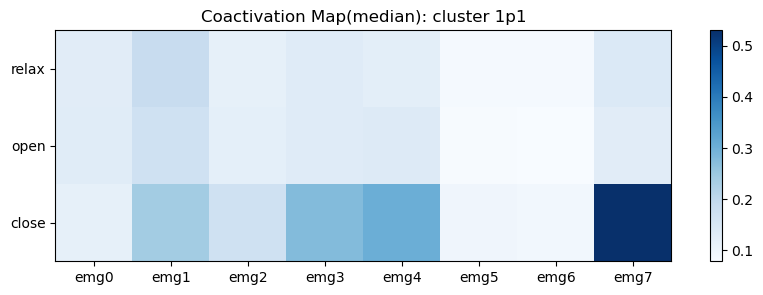

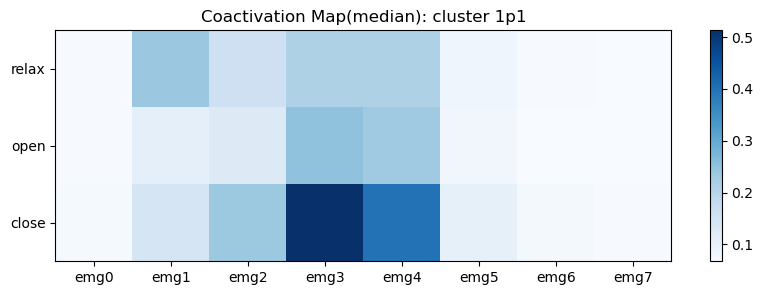

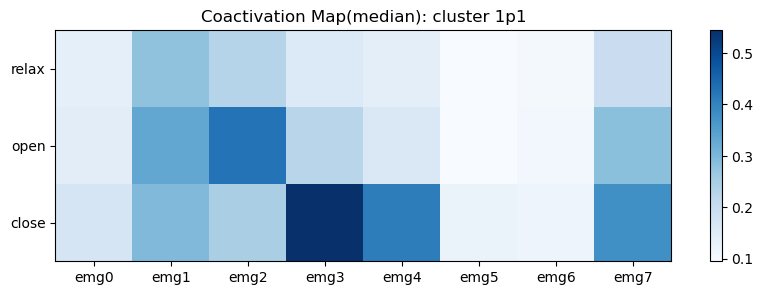

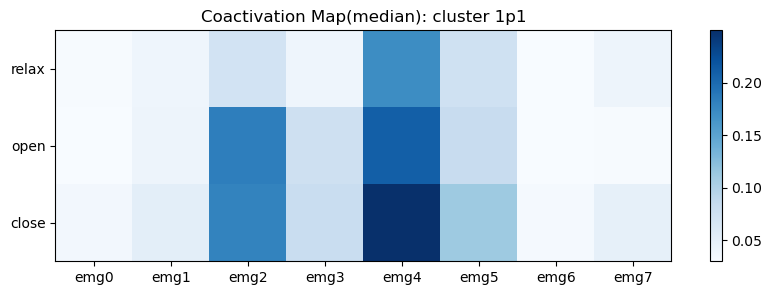

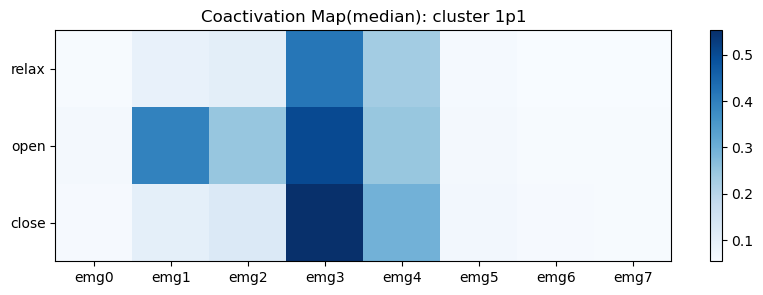

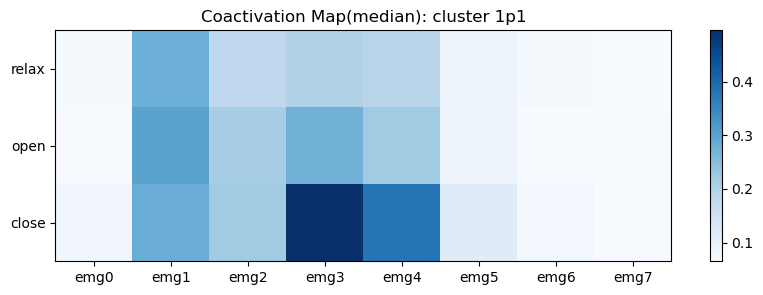

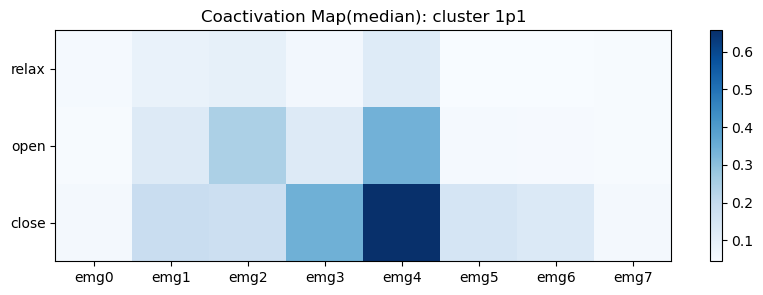

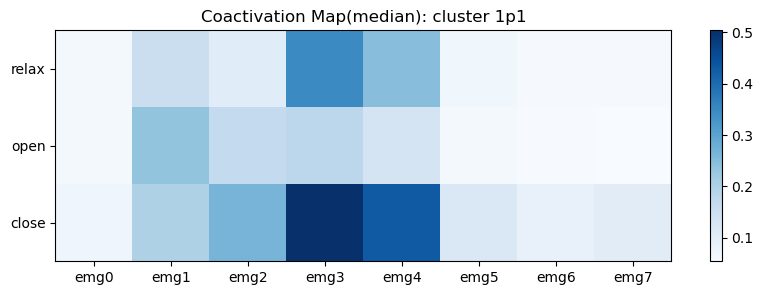

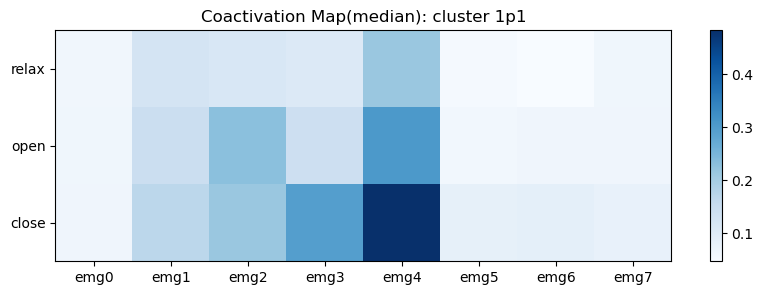

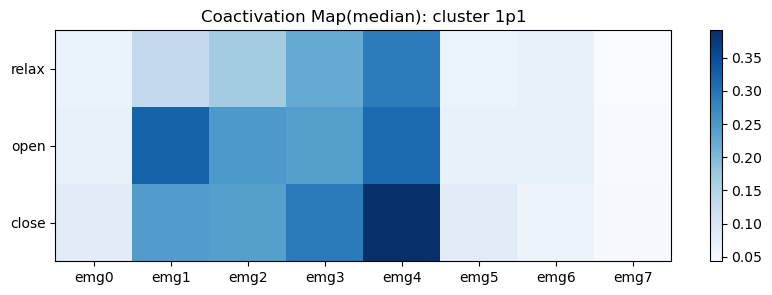

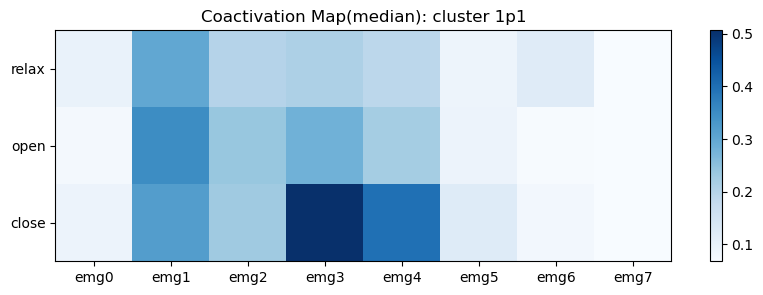

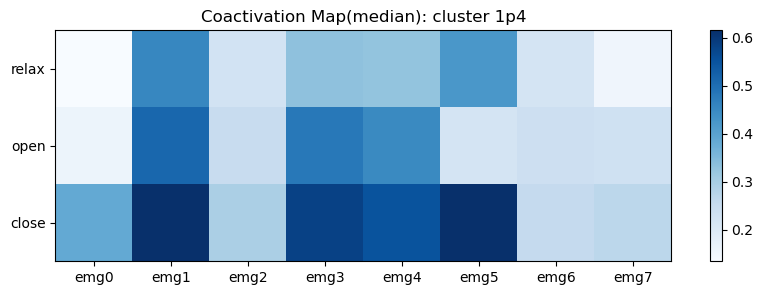

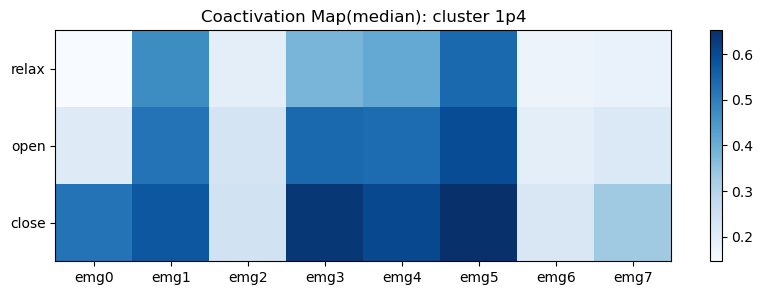

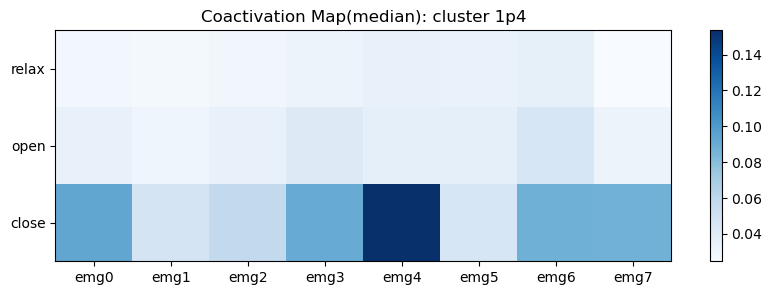

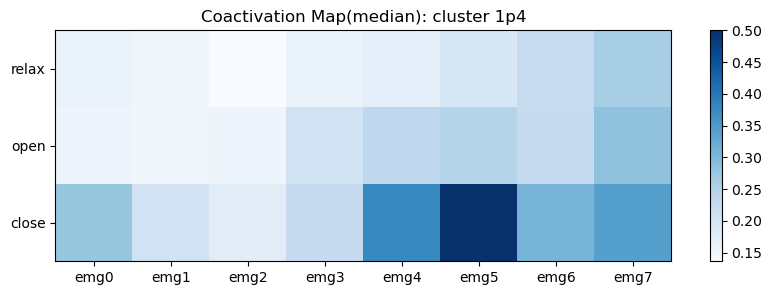

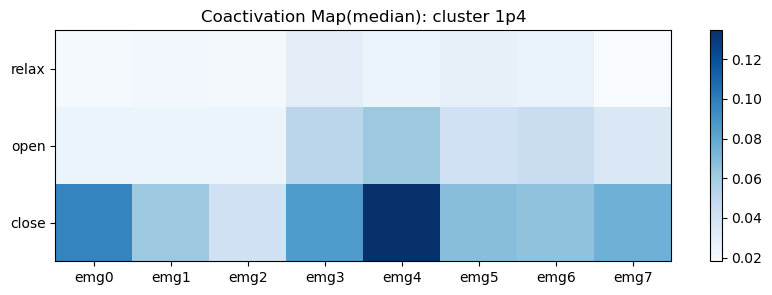

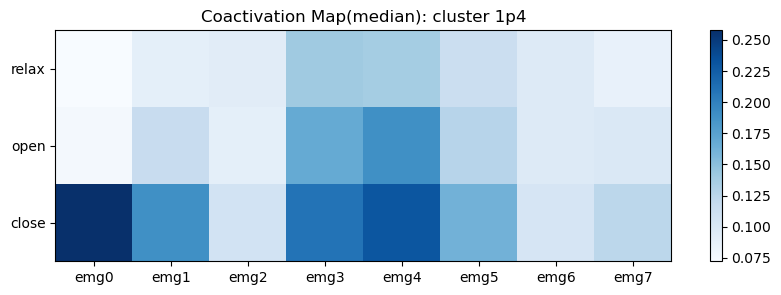

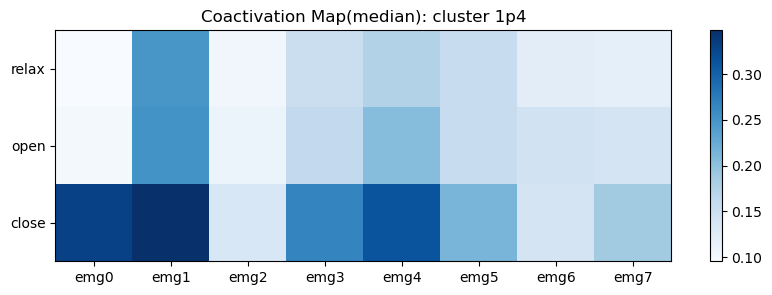

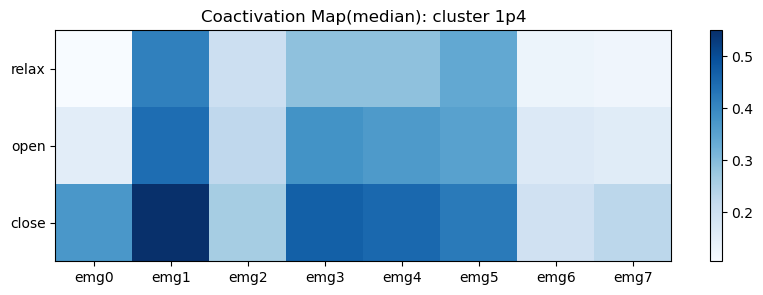

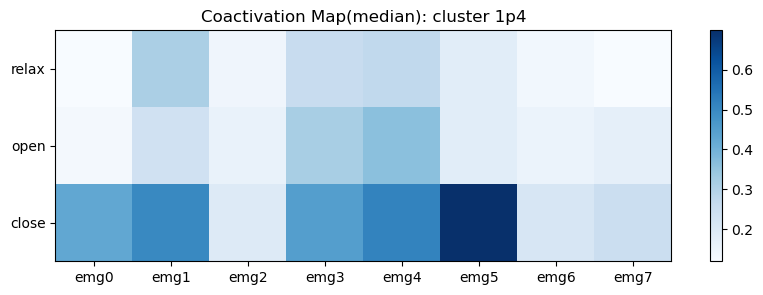

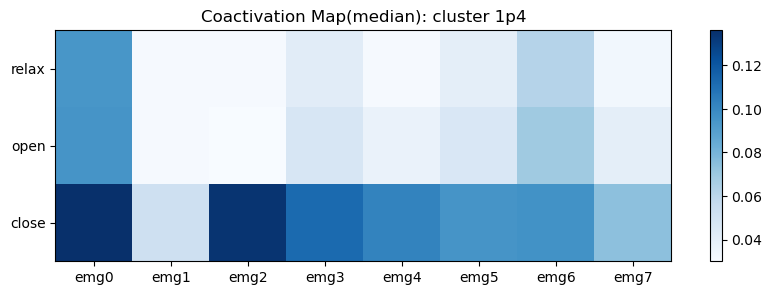

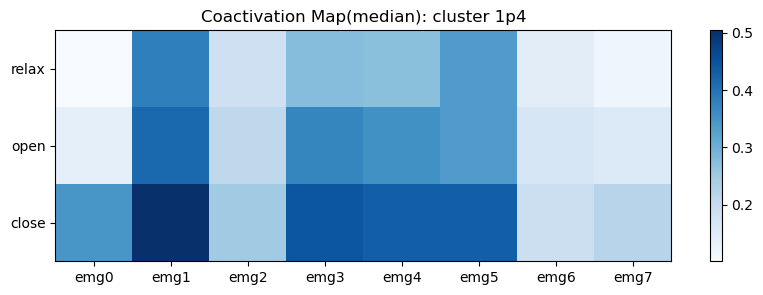

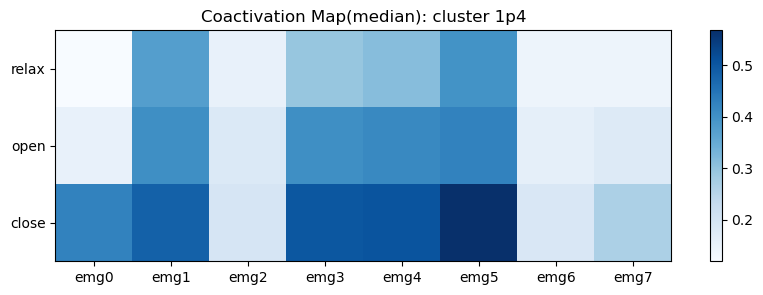

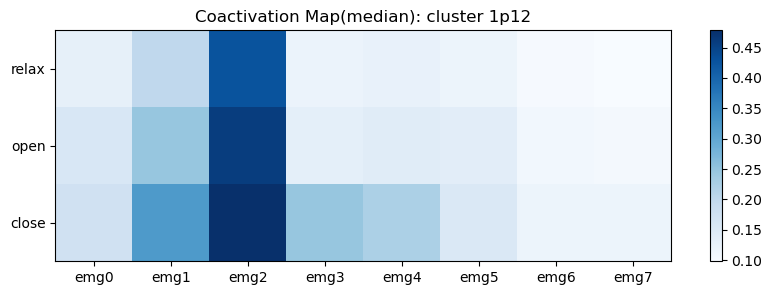

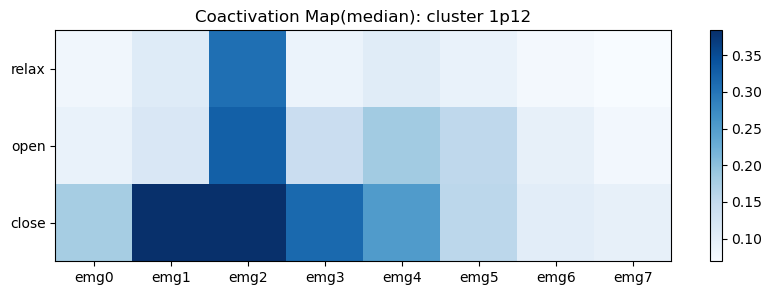

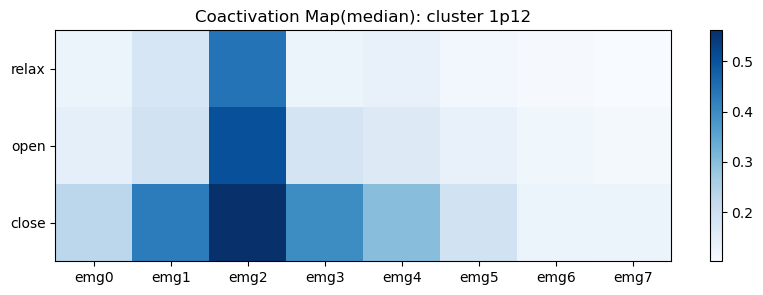

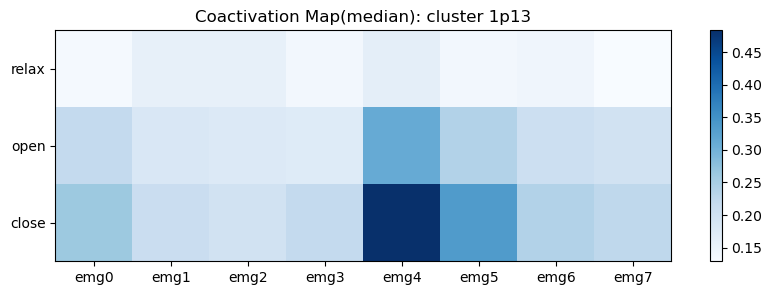

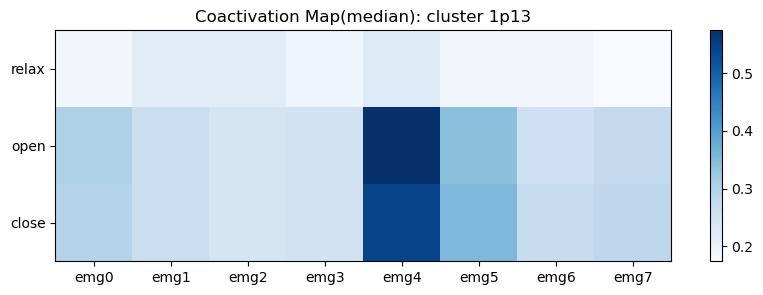

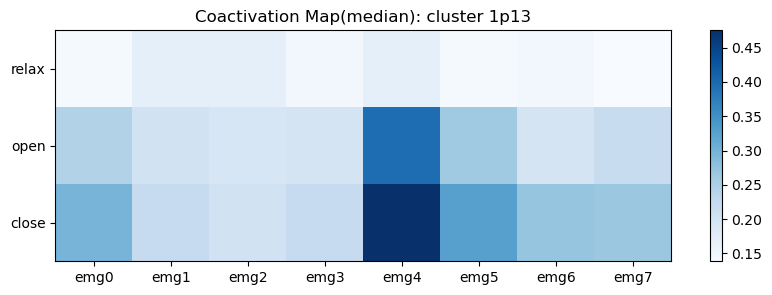

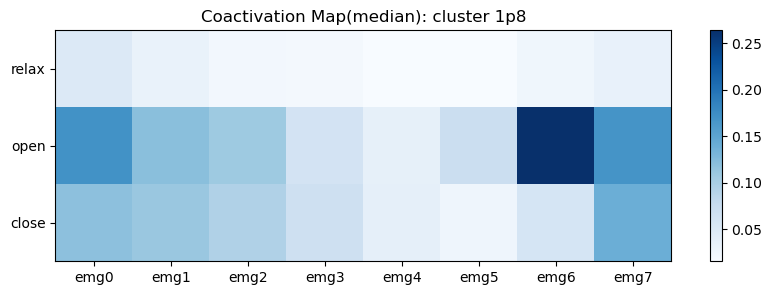

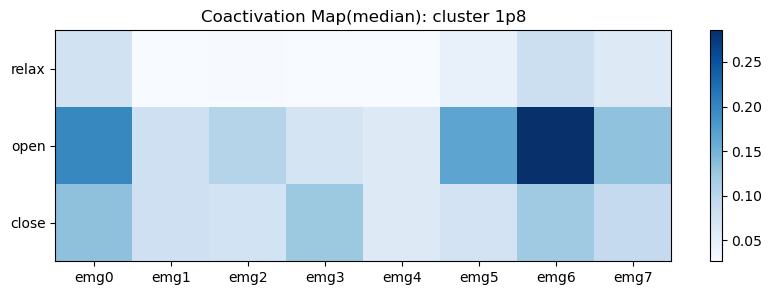

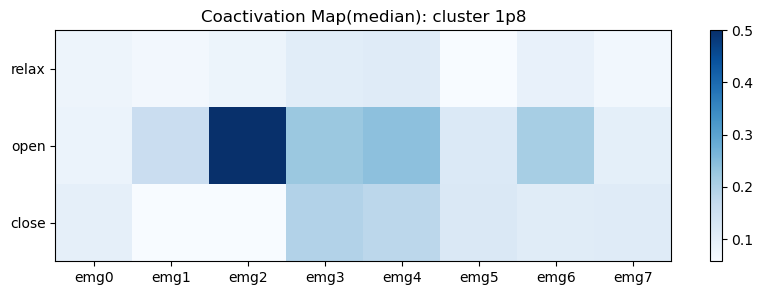

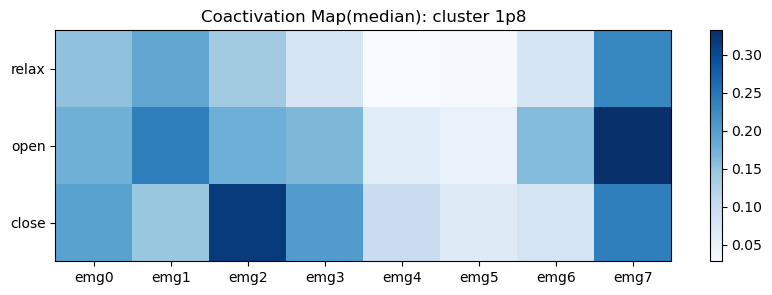

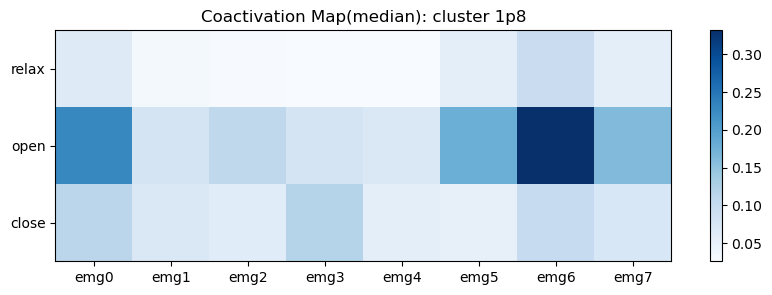

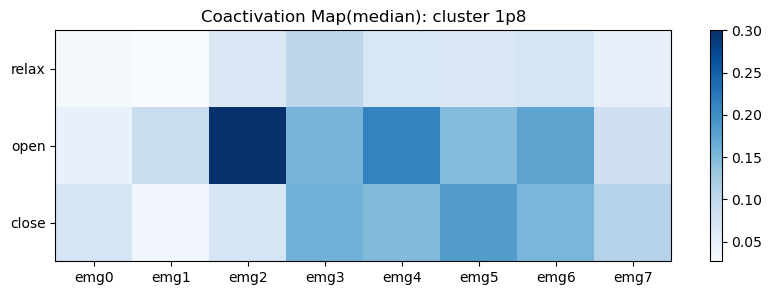

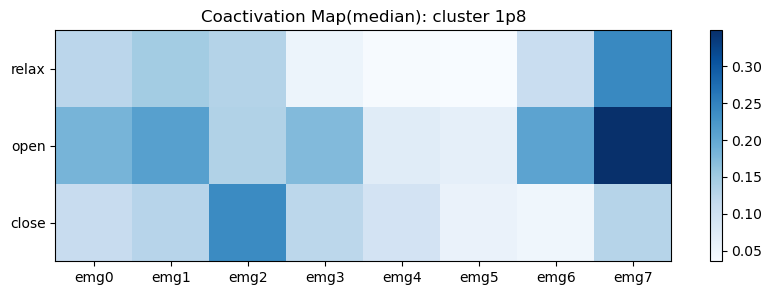

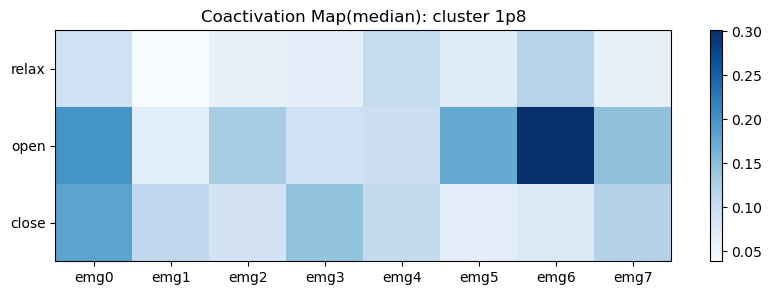

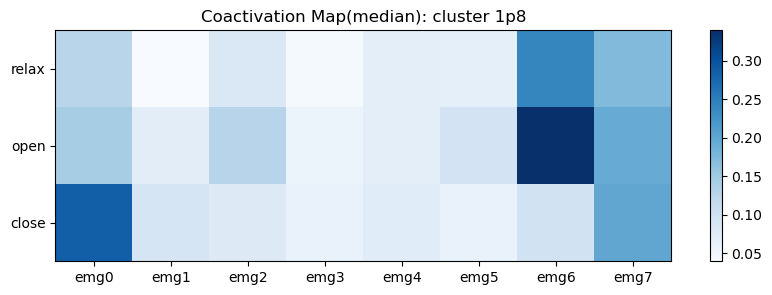

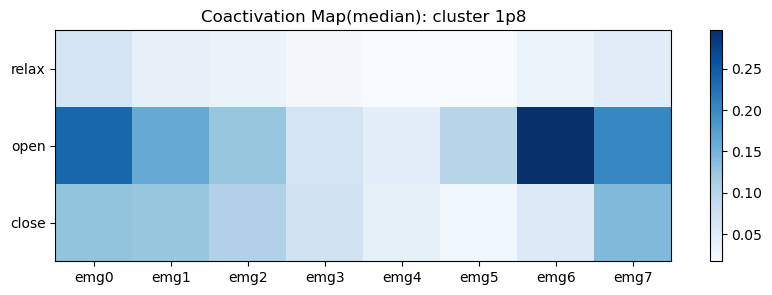

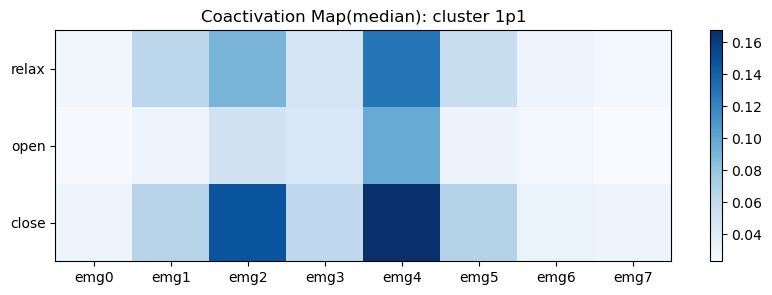

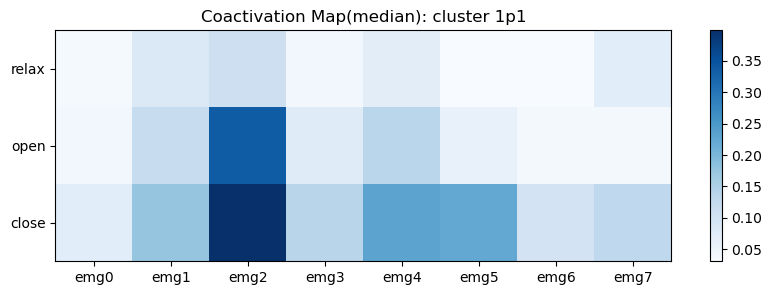

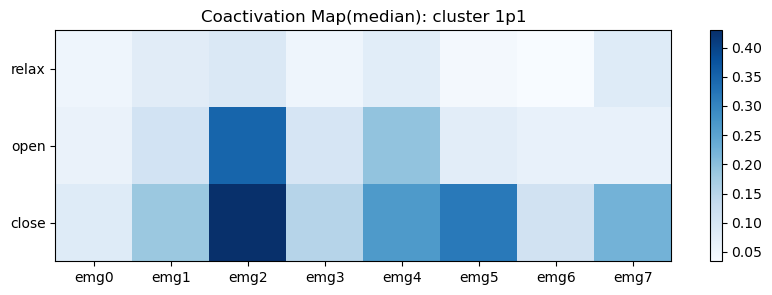

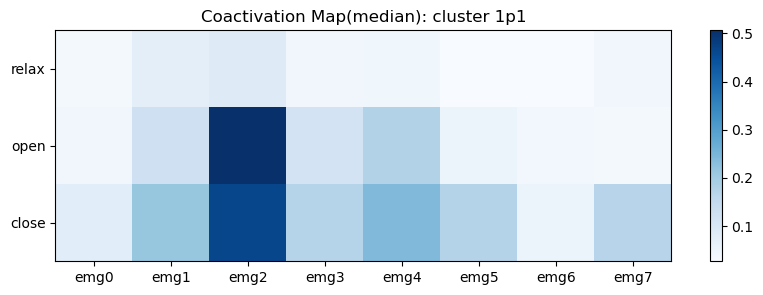

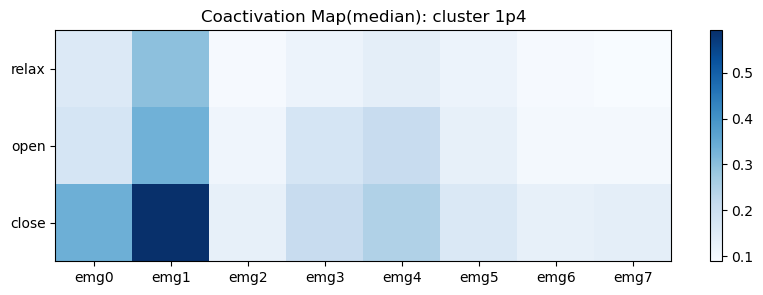

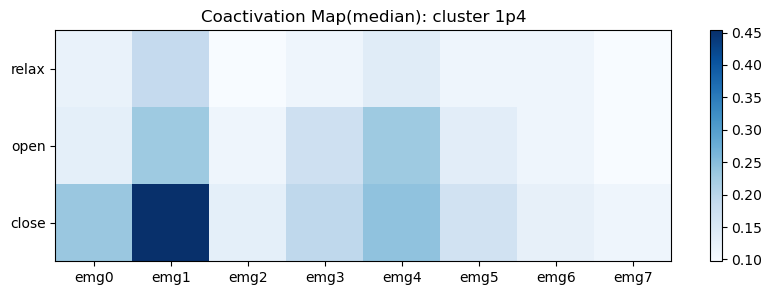

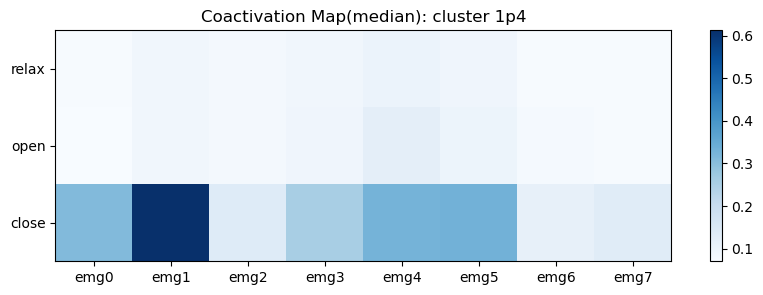

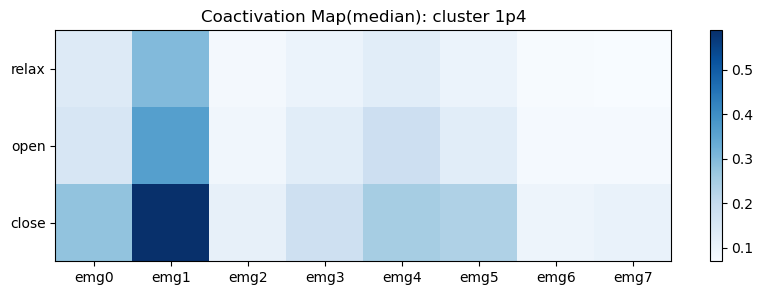

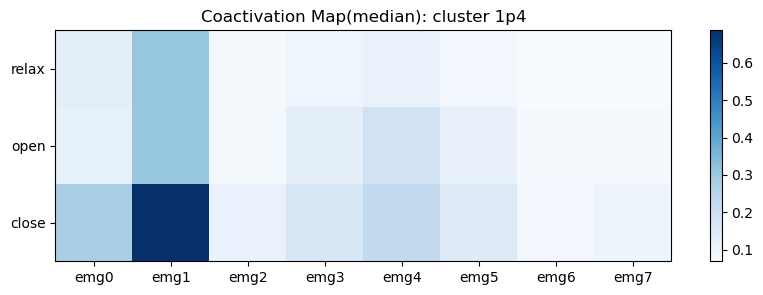

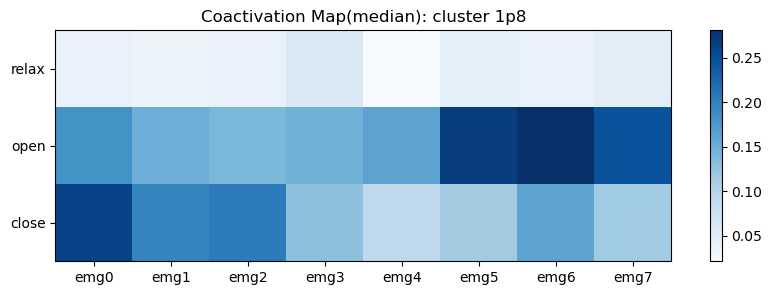

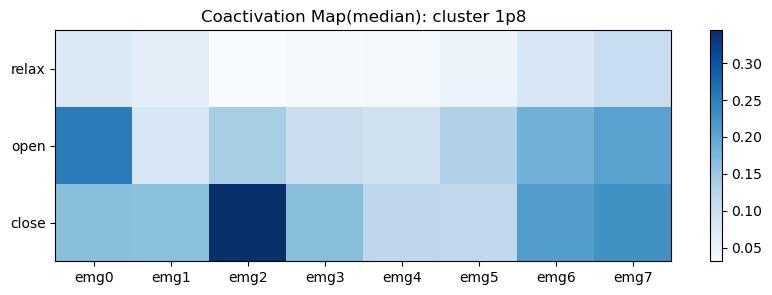

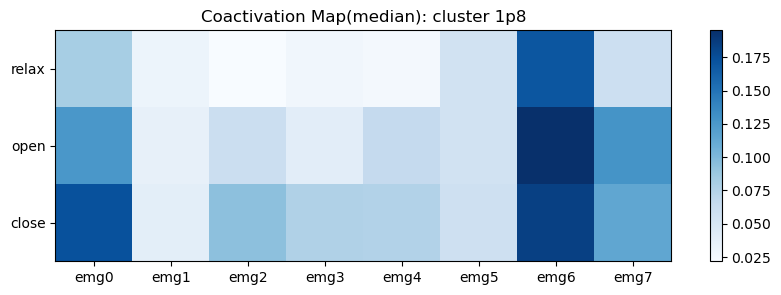

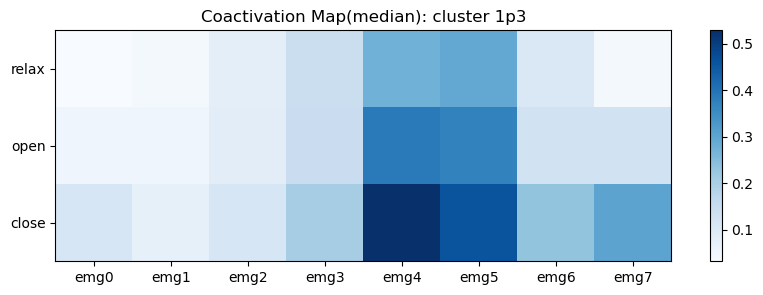

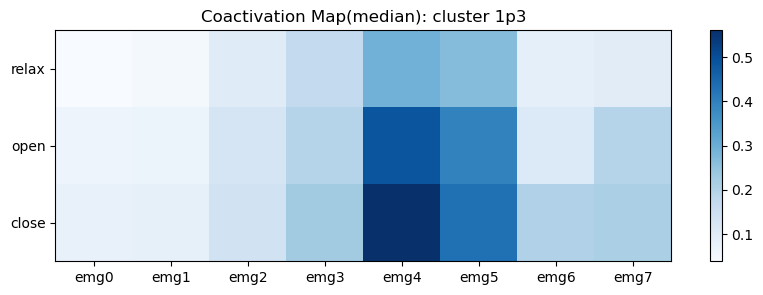

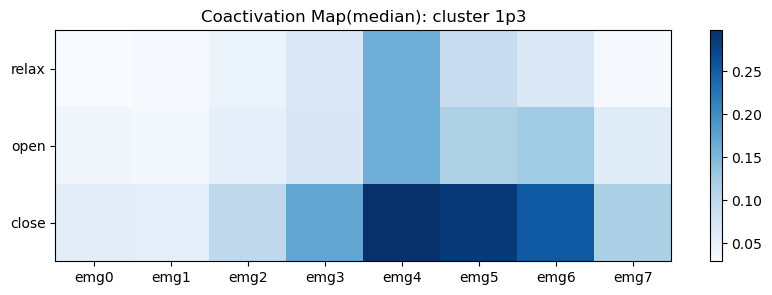

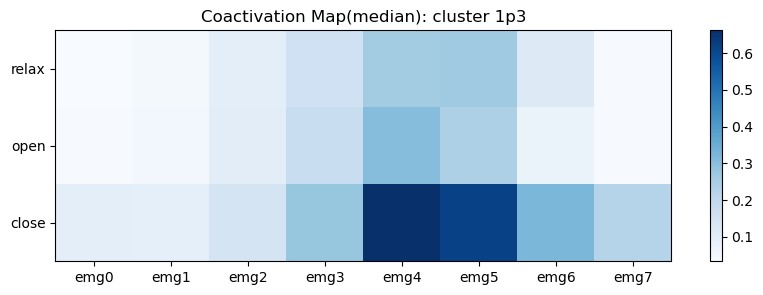

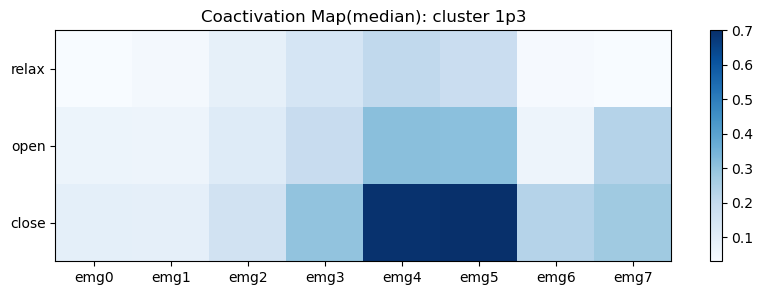

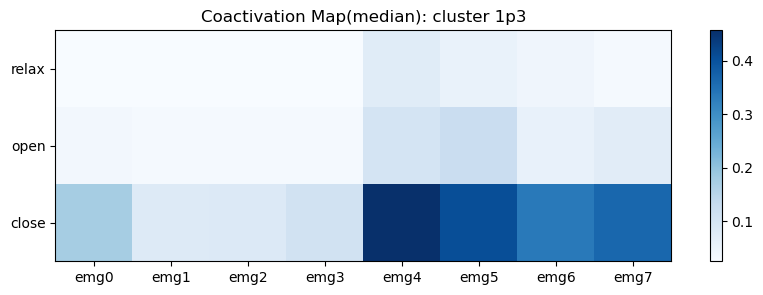

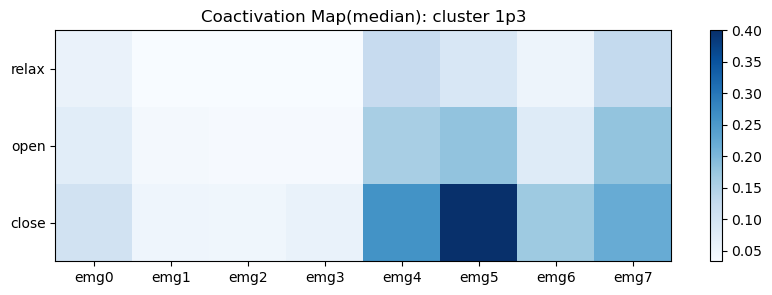

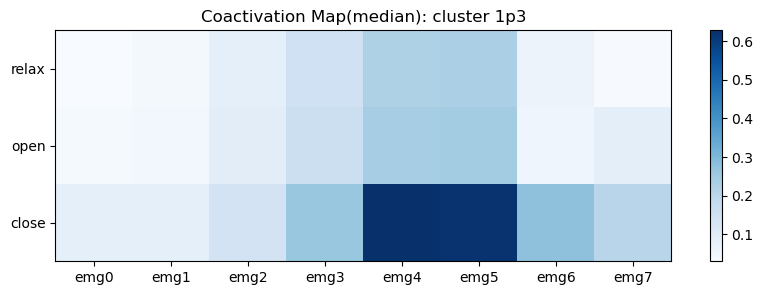

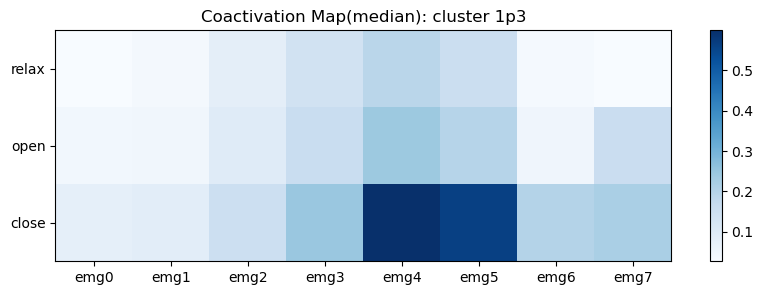

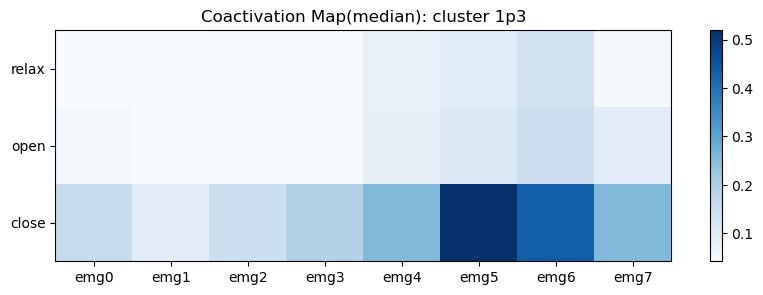

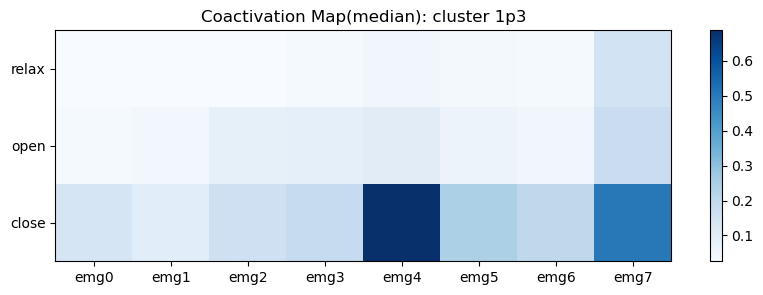

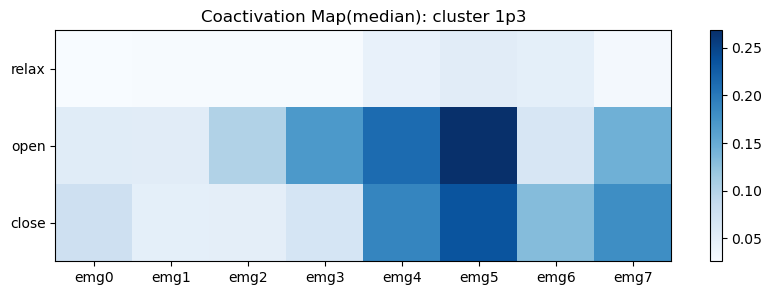

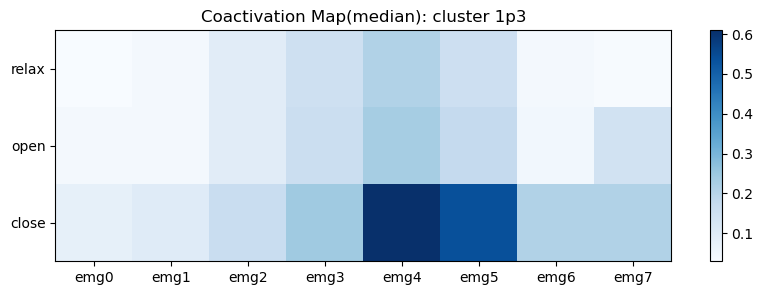

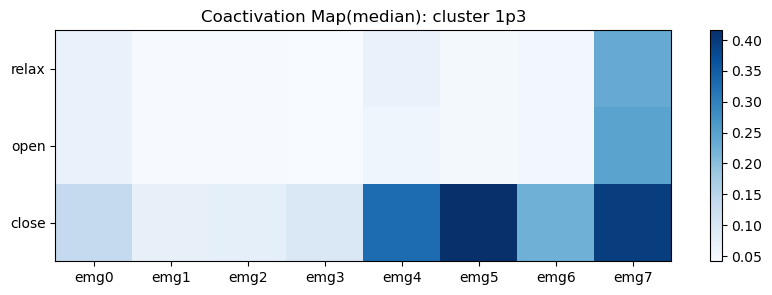

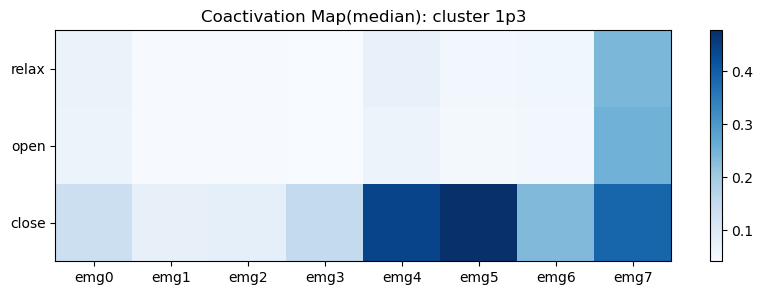

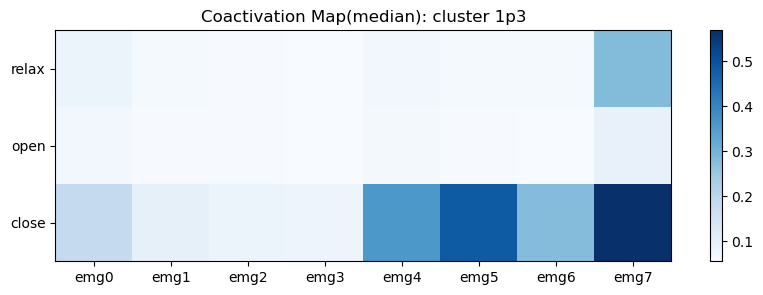

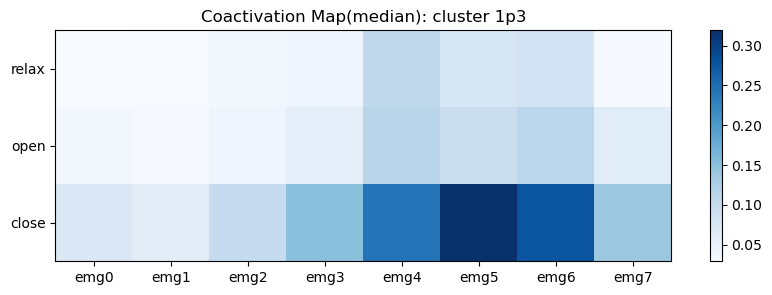

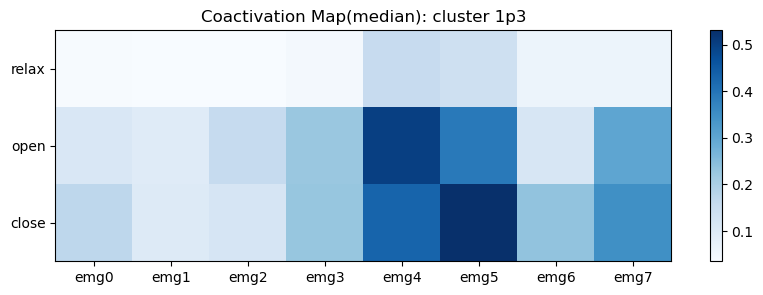

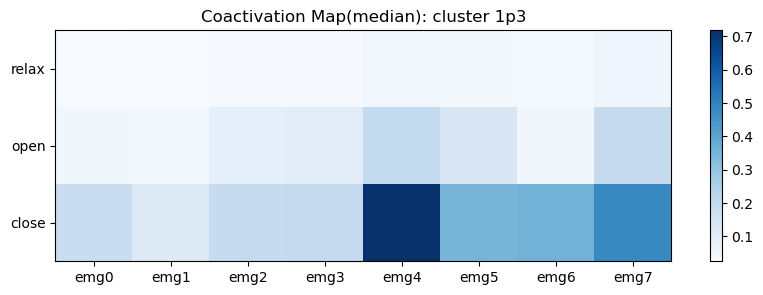

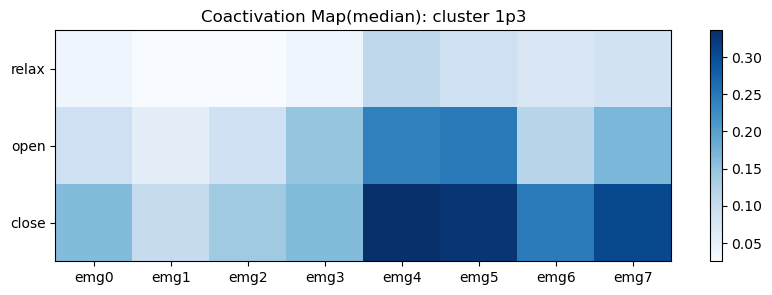

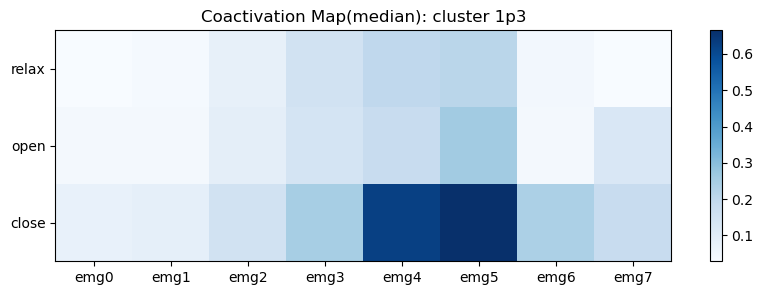

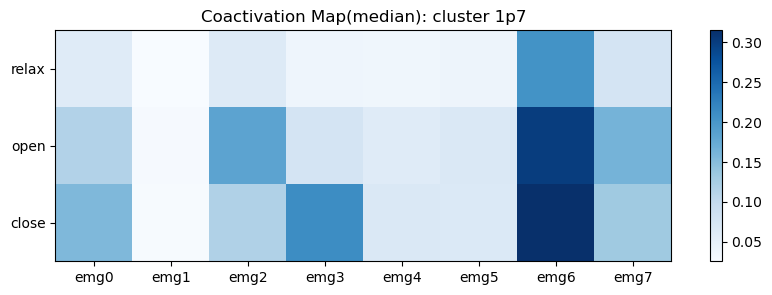

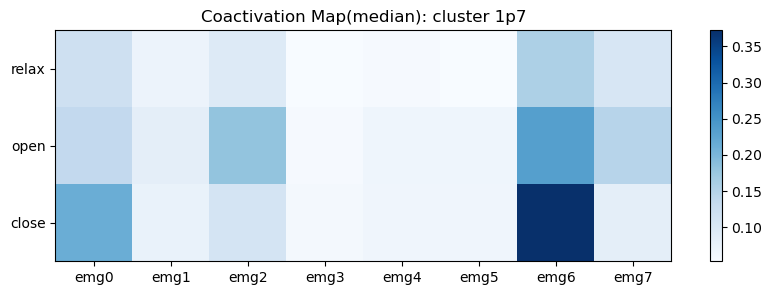

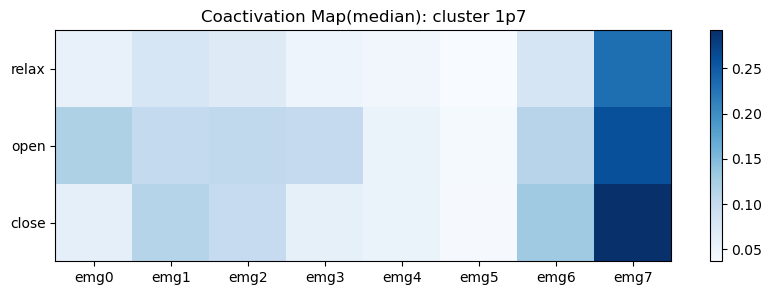

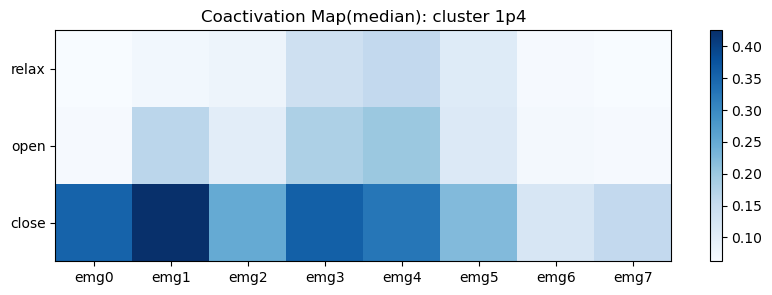

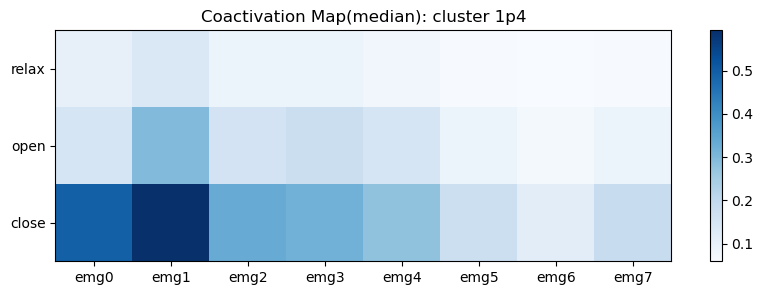

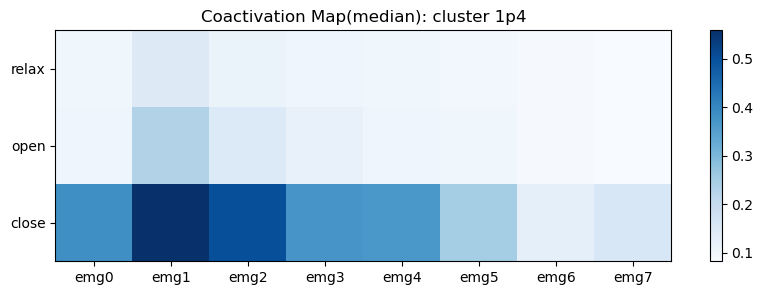

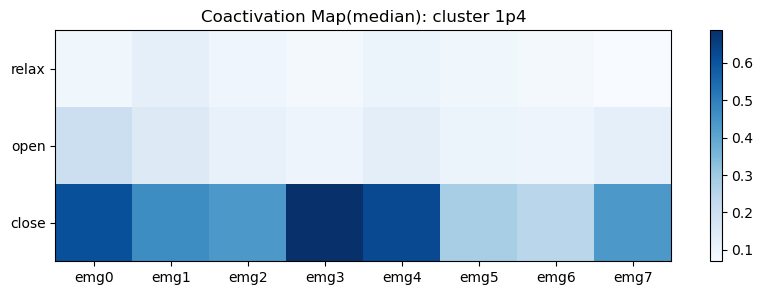

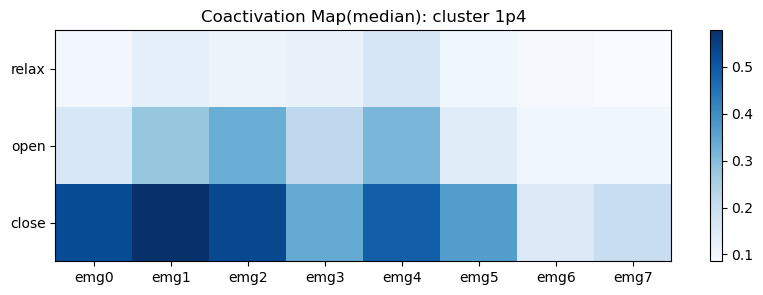

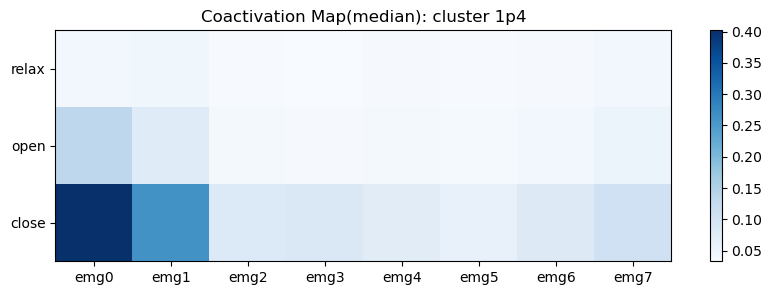

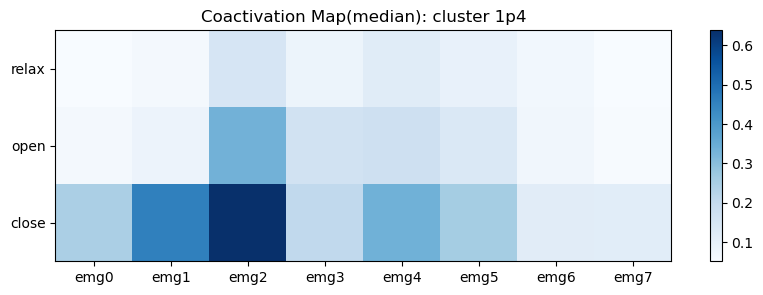

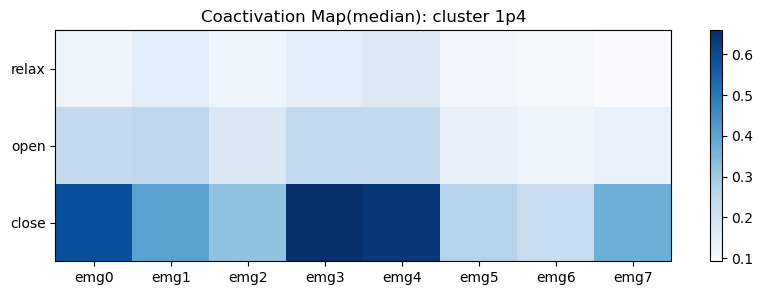

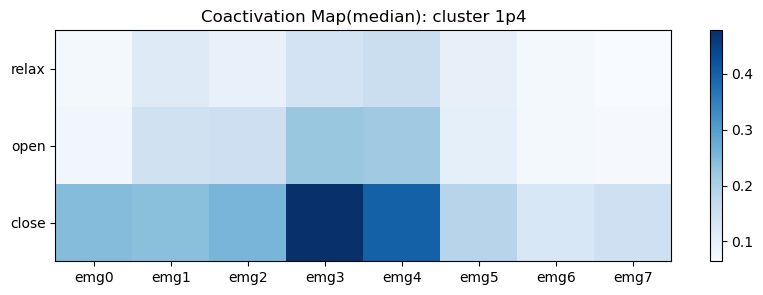

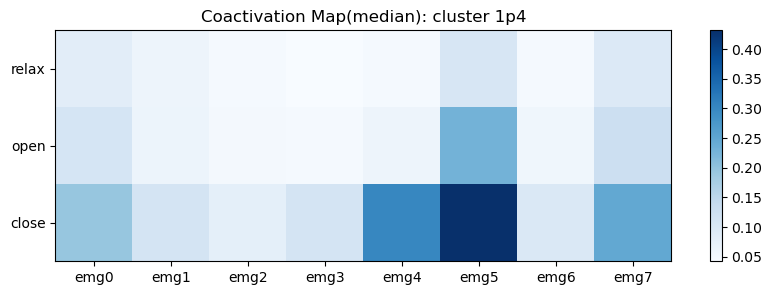

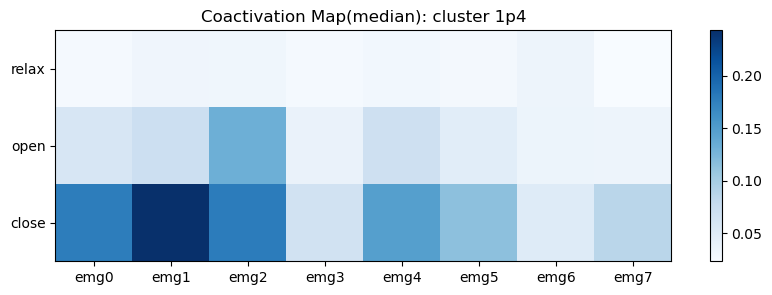

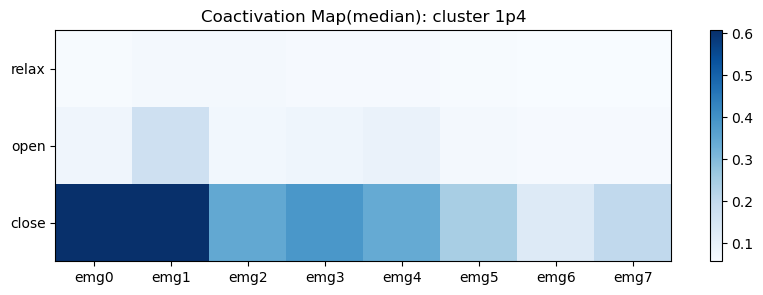

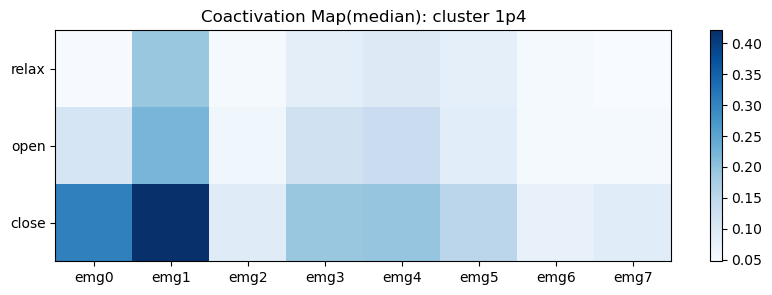

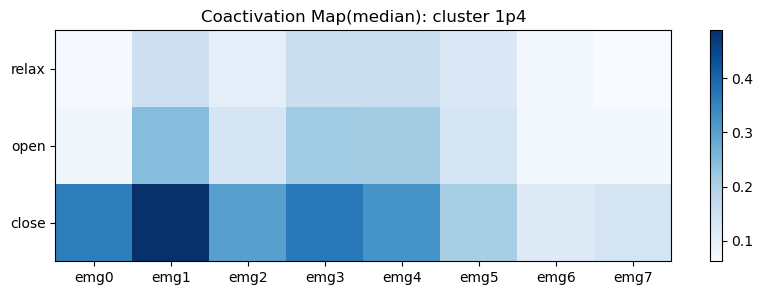

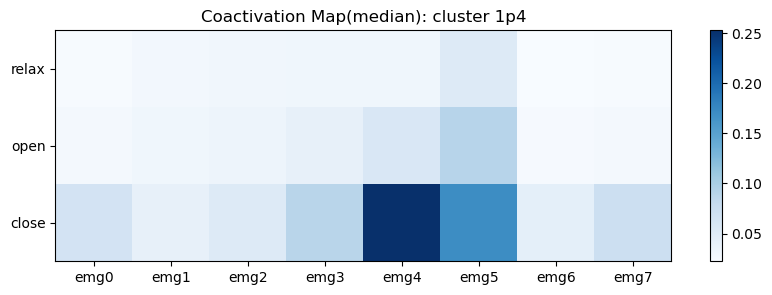

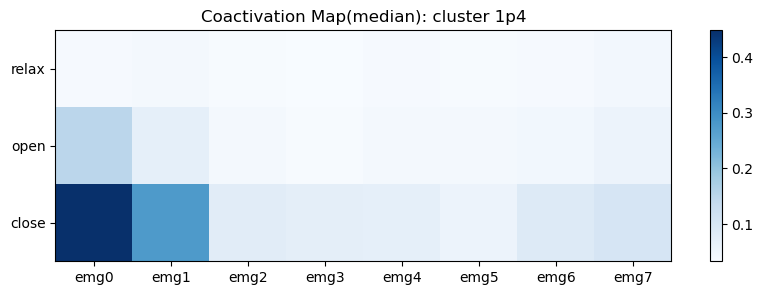

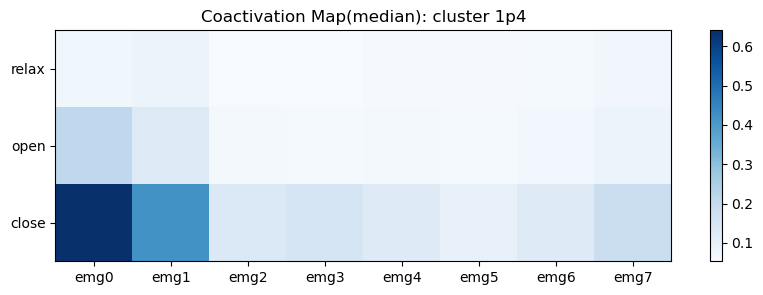

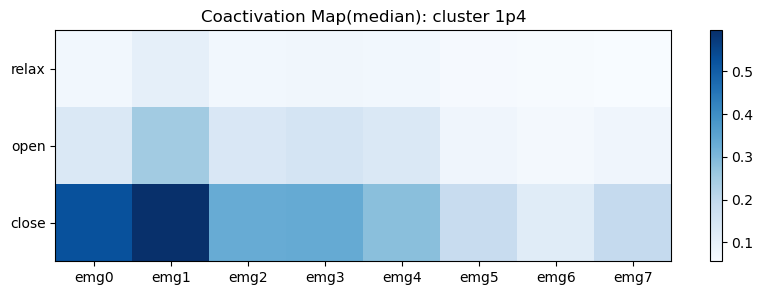

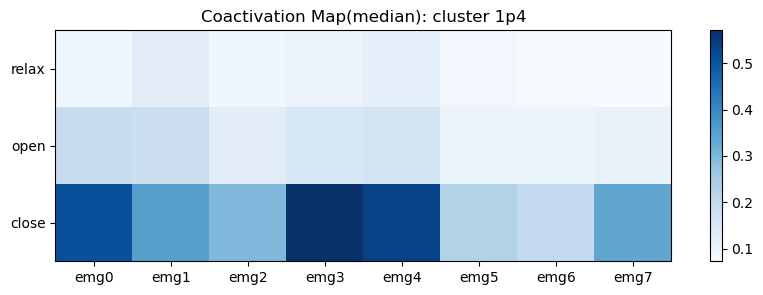

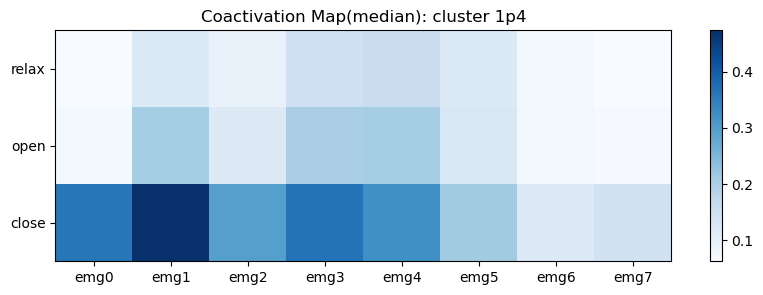

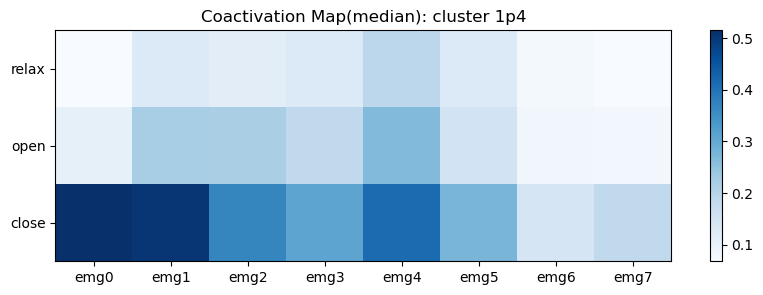

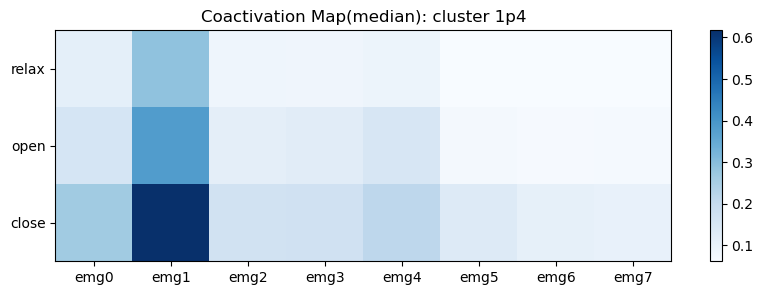

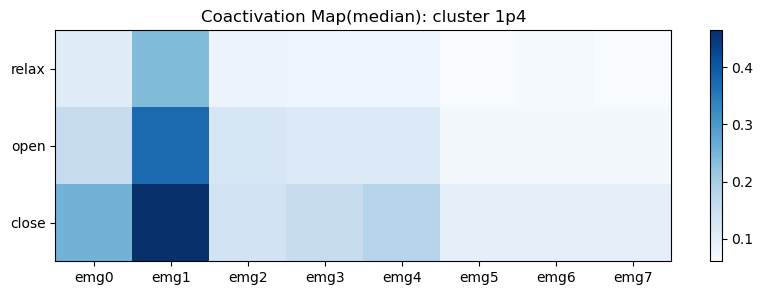

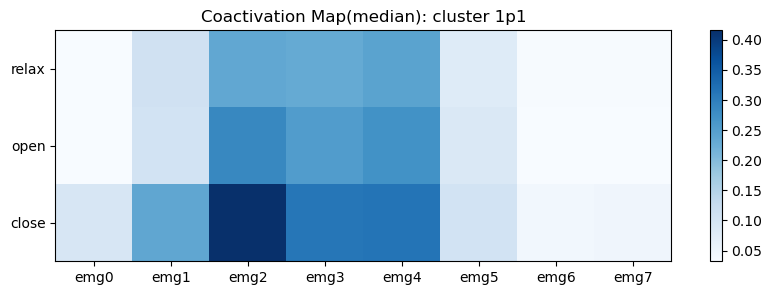

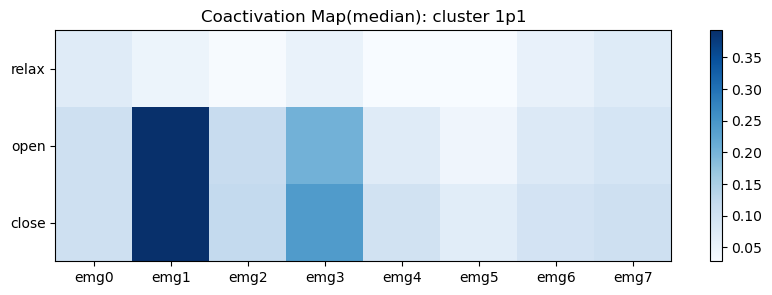

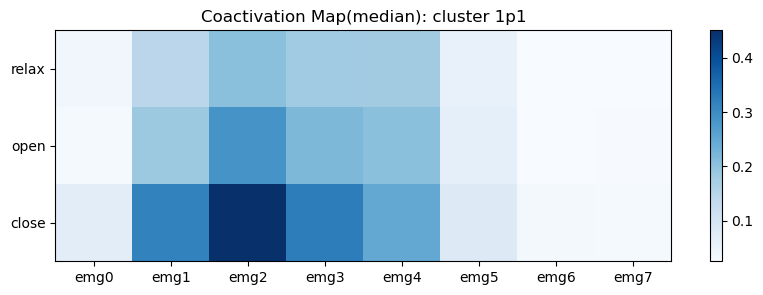

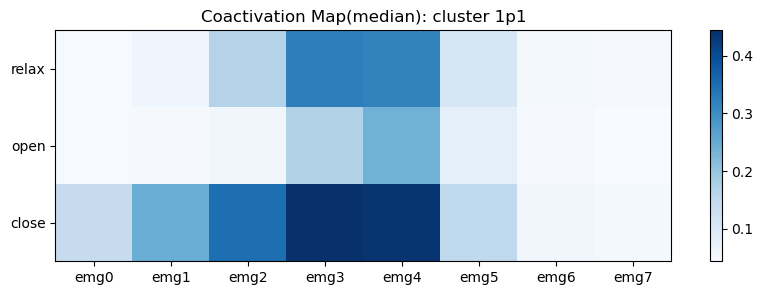

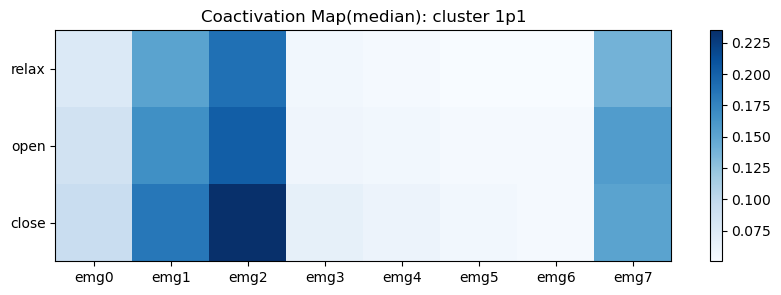

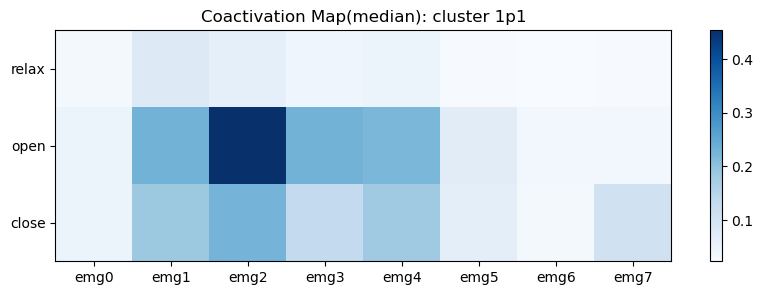

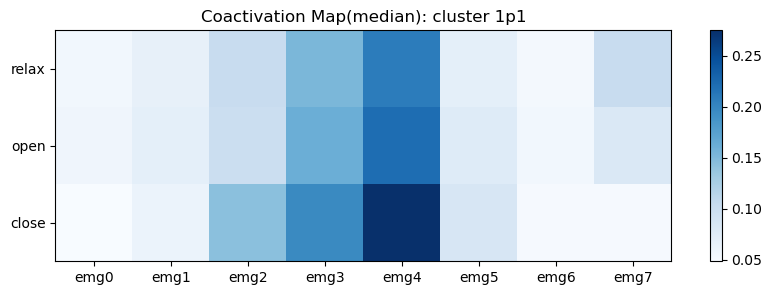

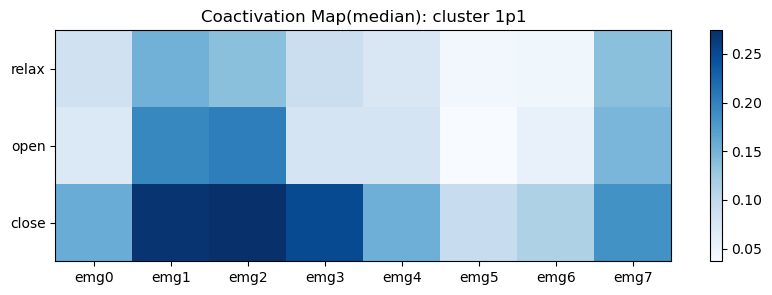

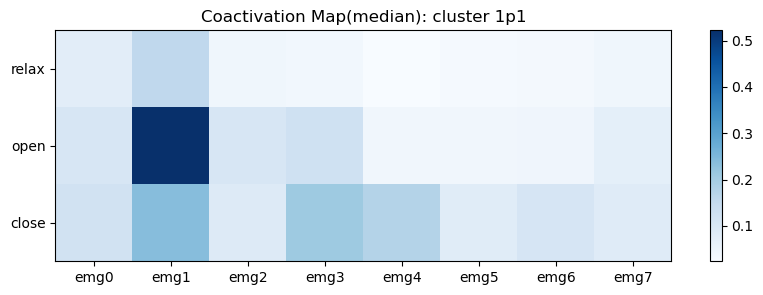

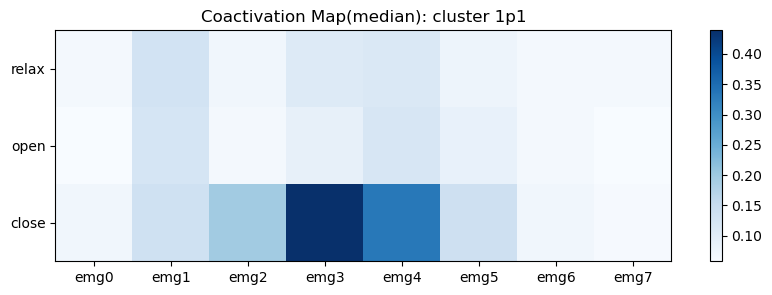

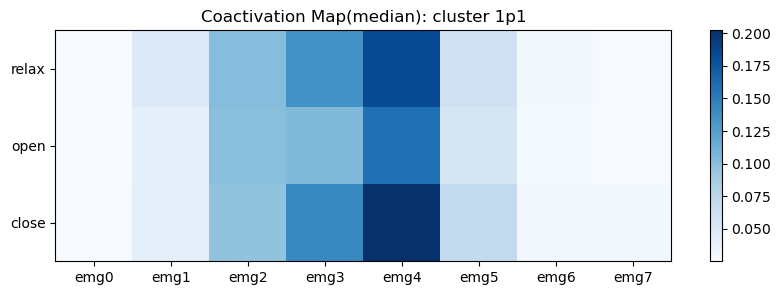

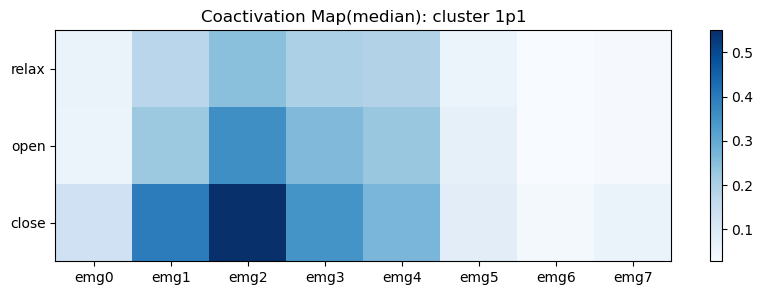

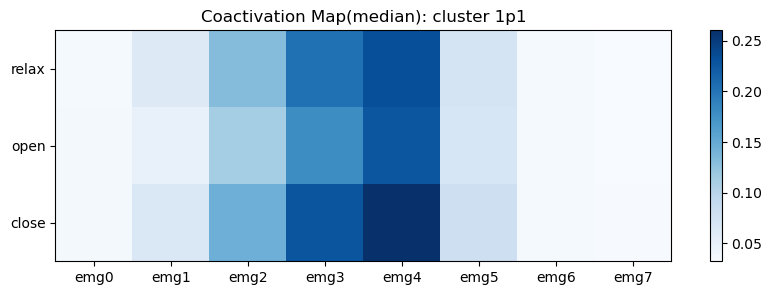

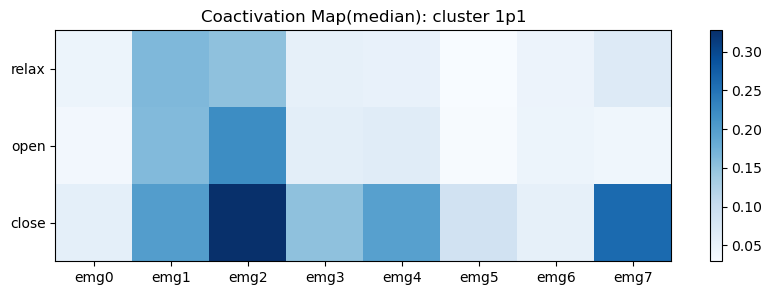

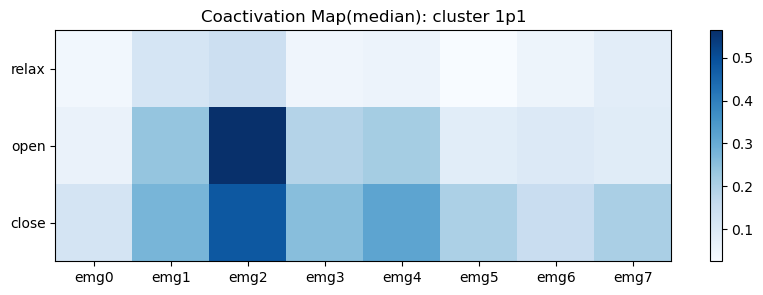

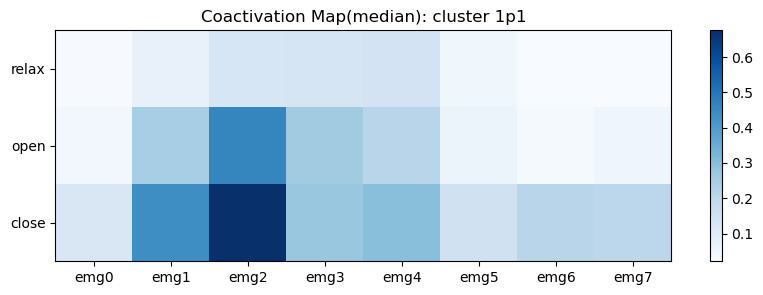

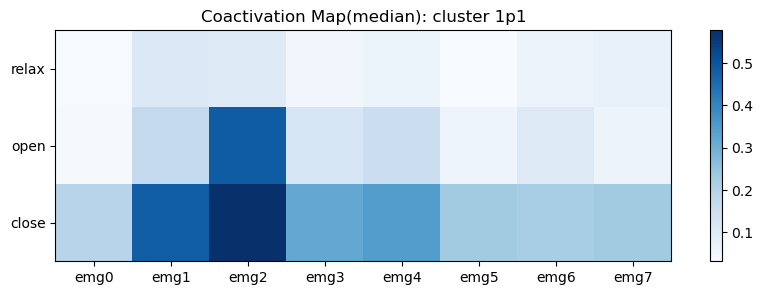

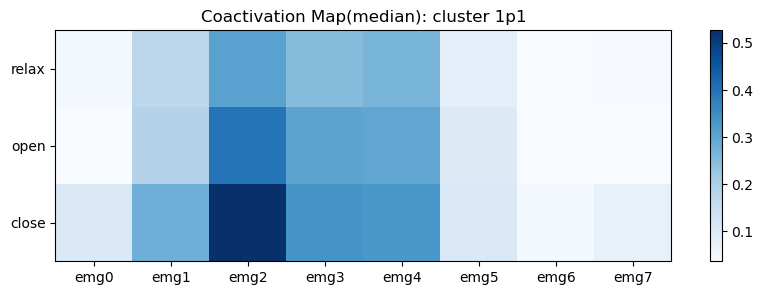

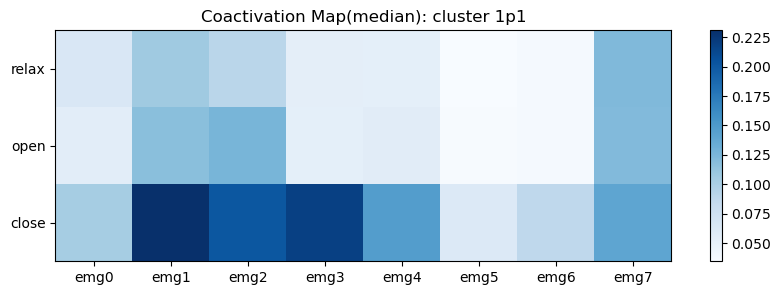

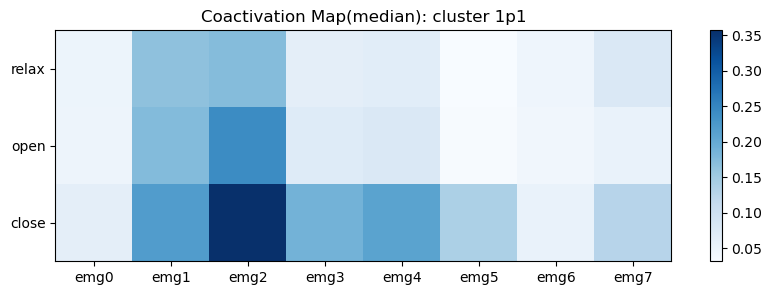

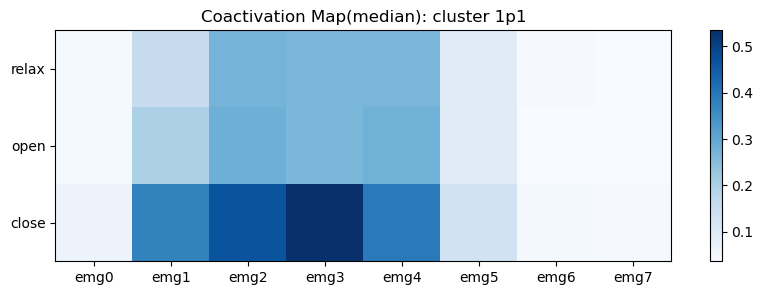

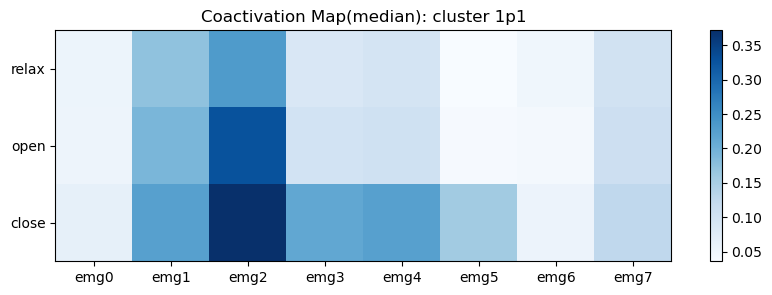

In [76]:
for cluster in np.unique(df_stroke.cluster):
    for index, row in df_stroke[df_stroke.cluster==cluster].iterrows():
        plot_coactivation_map(array_to_cm(np.array(row.values)[:24].astype(float)), title='cluster ' + str(cluster) + row.subject_id)